In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fertilitycsv/Book1.csv
/kaggle/input/fertility1csv/fertility_rate.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [3]:
data = pd.read_csv('/kaggle/input/fertility1csv/fertility_rate.csv')
data.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,_World,4.98,5.00,5.03,5.05,5.06,5.04,4.99,4.97,4.92,...,2.50,2.49,2.47,2.46,2.46,2.44,2.43,2.41,2.40,2.39
1,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,...,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
2,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,...,1.67,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58
3,Algeria,7.52,7.57,7.61,7.65,7.67,7.68,7.68,7.67,7.67,...,2.91,2.95,2.99,3.02,3.04,3.05,3.05,3.02,2.99,2.94
4,Angola,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,...,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37


In [4]:
data.columns

Index(['Country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [5]:
data.isnull().sum()

Country    0
1960       0
1961       0
1962       0
1963       0
          ..
2016       0
2017       0
2018       0
2019       0
2020       0
Length: 62, dtype: int64

In [6]:
data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,5.533529,5.526578,5.514385,5.499251,5.472888,5.426043,5.375561,5.334545,5.281925,5.229358,...,2.908235,2.883155,2.844813,2.820107,2.788770,2.758342,2.717112,2.684225,2.649626,2.610749
std,1.735528,1.747268,1.762098,1.771850,1.784293,1.815374,1.846265,1.852808,1.875046,1.893093,...,1.443078,1.410730,1.388468,1.355010,1.326472,1.296972,1.277288,1.255320,1.234040,1.215841
min,1.940000,1.940000,1.790000,1.820000,1.790000,1.740000,1.580000,1.800000,1.830000,1.870000,...,1.200000,1.270000,1.190000,1.210000,1.240000,1.170000,1.050000,0.980000,0.920000,0.840000
25%,4.110000,3.930000,4.045000,4.000000,3.970000,3.825000,3.665000,3.555000,3.405000,3.260000,...,1.790000,1.800000,1.760000,1.750000,1.745000,1.745000,1.725000,1.710000,1.705000,1.630000
50%,6.250000,6.270000,6.220000,6.170000,6.130000,6.100000,6.080000,6.010000,5.940000,5.850000,...,2.440000,2.420000,2.390000,2.370000,2.340000,2.320000,2.280000,2.260000,2.240000,2.210000
75%,6.825000,6.830000,6.835000,6.835000,6.845000,6.805000,6.805000,6.775000,6.750000,6.730000,...,3.905000,3.845000,3.790000,3.745000,3.700000,3.655000,3.610000,3.565000,3.525000,3.480000
max,8.190000,8.190000,8.200000,8.200000,8.200000,8.200000,8.200000,8.220000,8.280000,8.330000,...,7.430000,7.380000,7.310000,7.250000,7.170000,7.090000,7.000000,6.910000,6.820000,6.740000


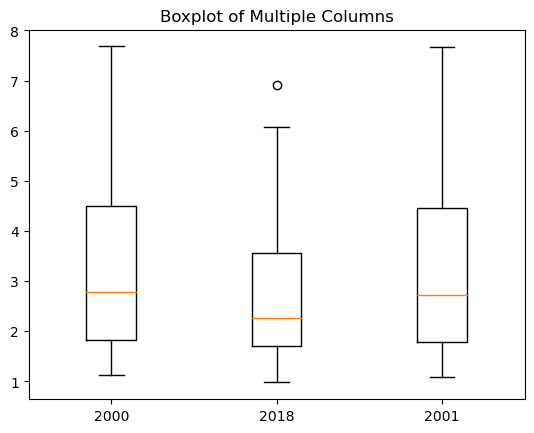

In [7]:
plt.boxplot([data['2000'], data['2018'], data['2001']])
plt.title('Boxplot of Multiple Columns')
plt.xticks([1, 2, 3], ['2000', '2018', '2001'])
plt.show()

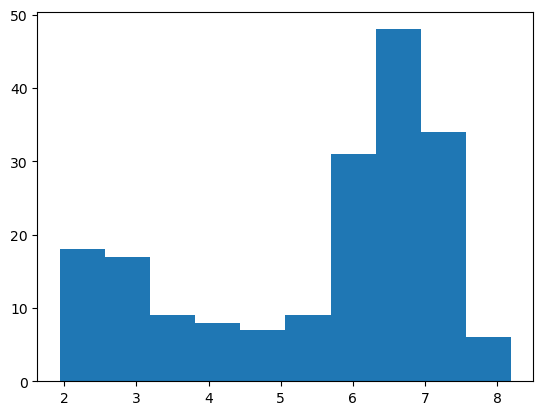

In [8]:
plt.hist(data['1960'])
plt.show()

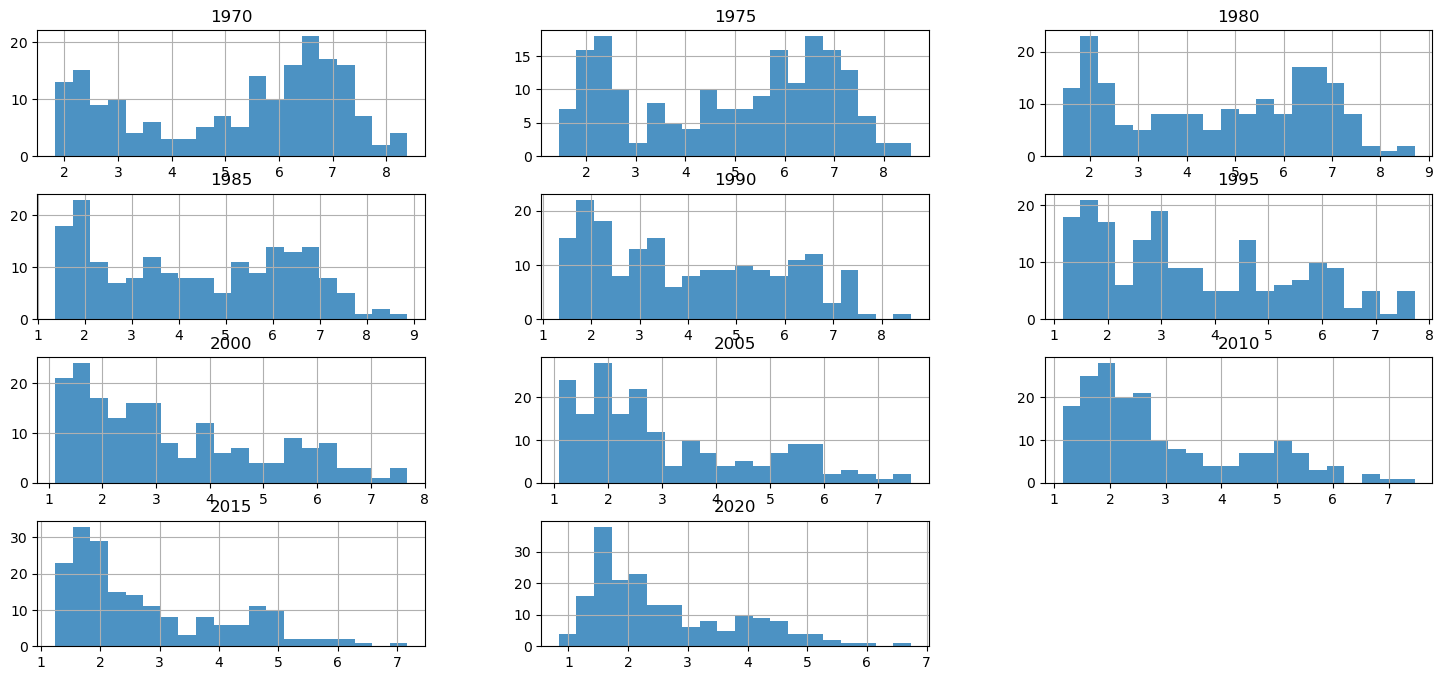

<Figure size 2000x800 with 0 Axes>

In [9]:
class MultiColumnHistogram:
    
    def __init__(self, data, columns):
        self.data = data
        self.columns = columns
        
    def plot(self):
        self.data[self.columns].hist(bins=20,alpha = 0.8,figsize=(18, 8))
        plt.figure(figsize = (20,8))
        plt.show()

hist = MultiColumnHistogram(data, ['1970','1975','1980','1985','1990','1995','2000','2005','2010','2015','2020'])

# Call the plot method to display the histogram
hist.plot()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


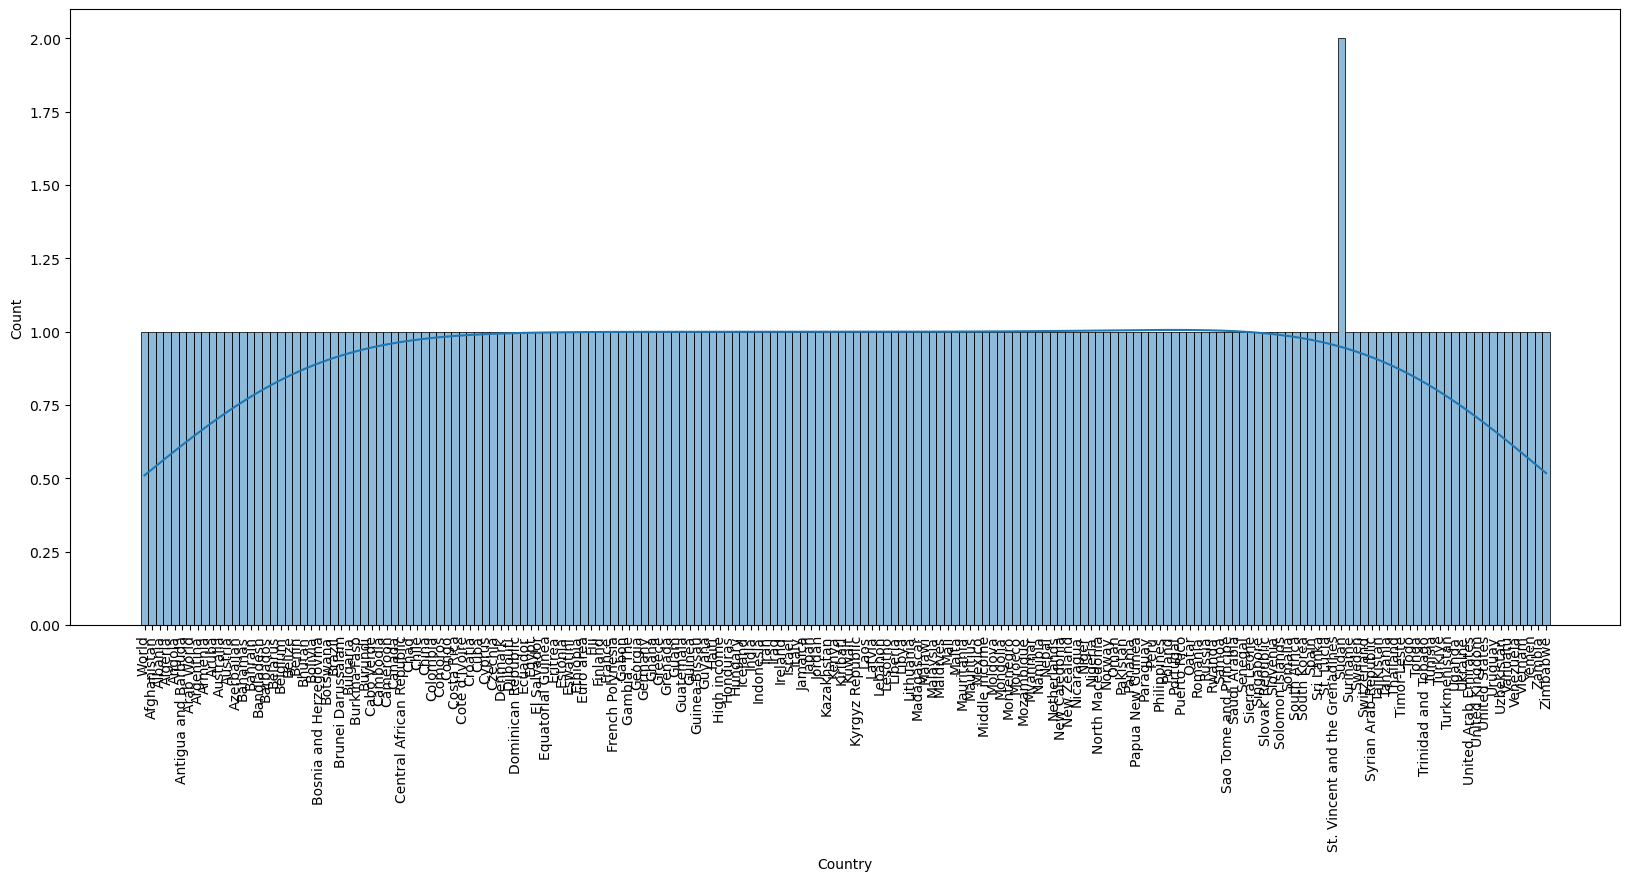

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


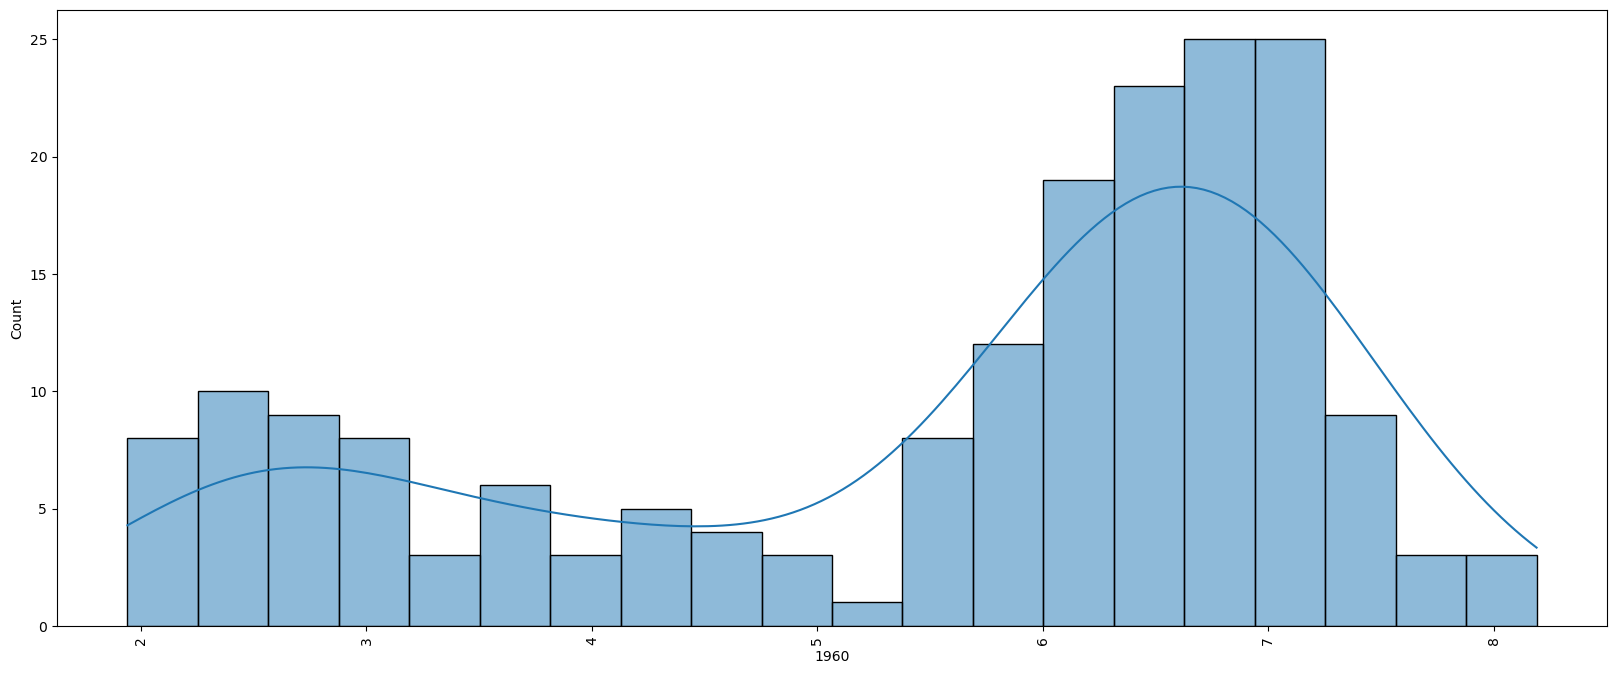

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


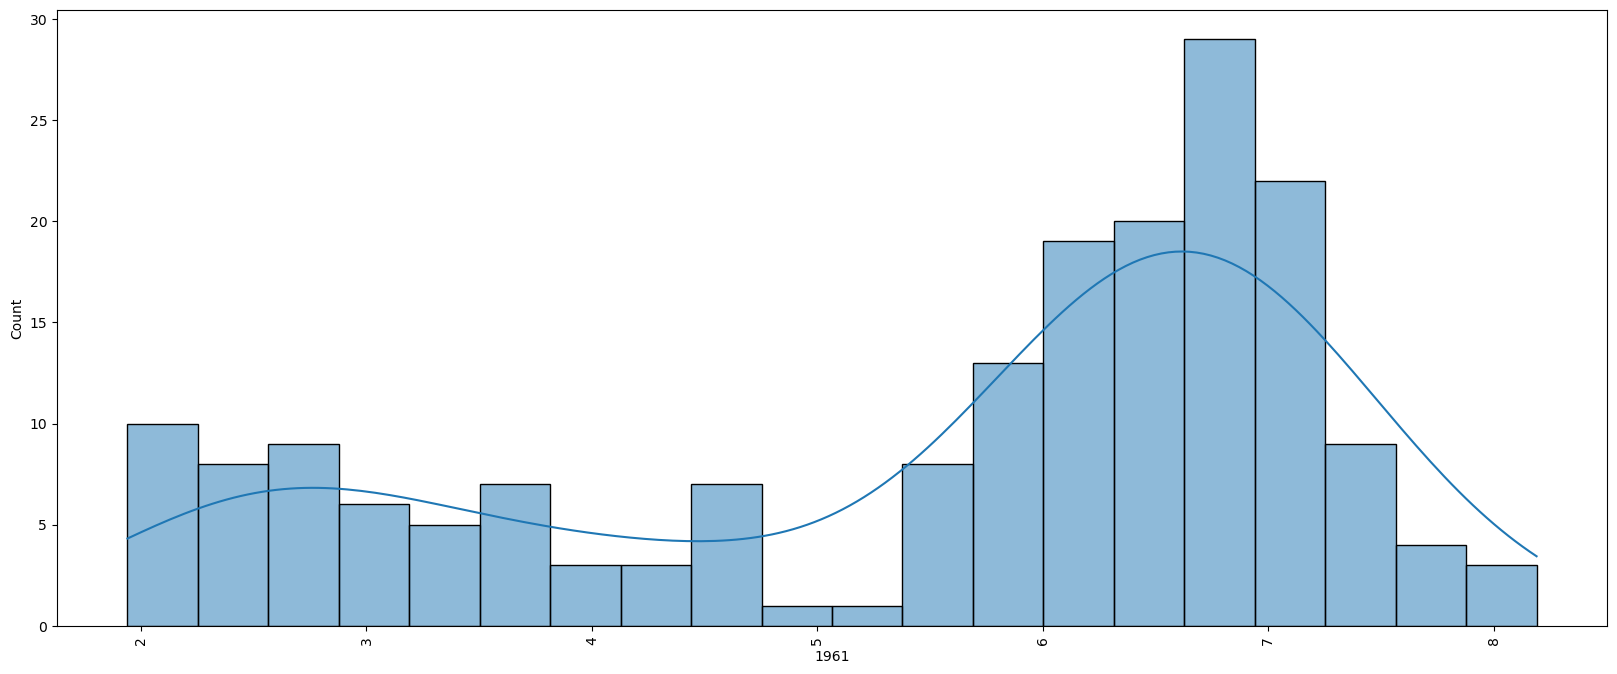

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


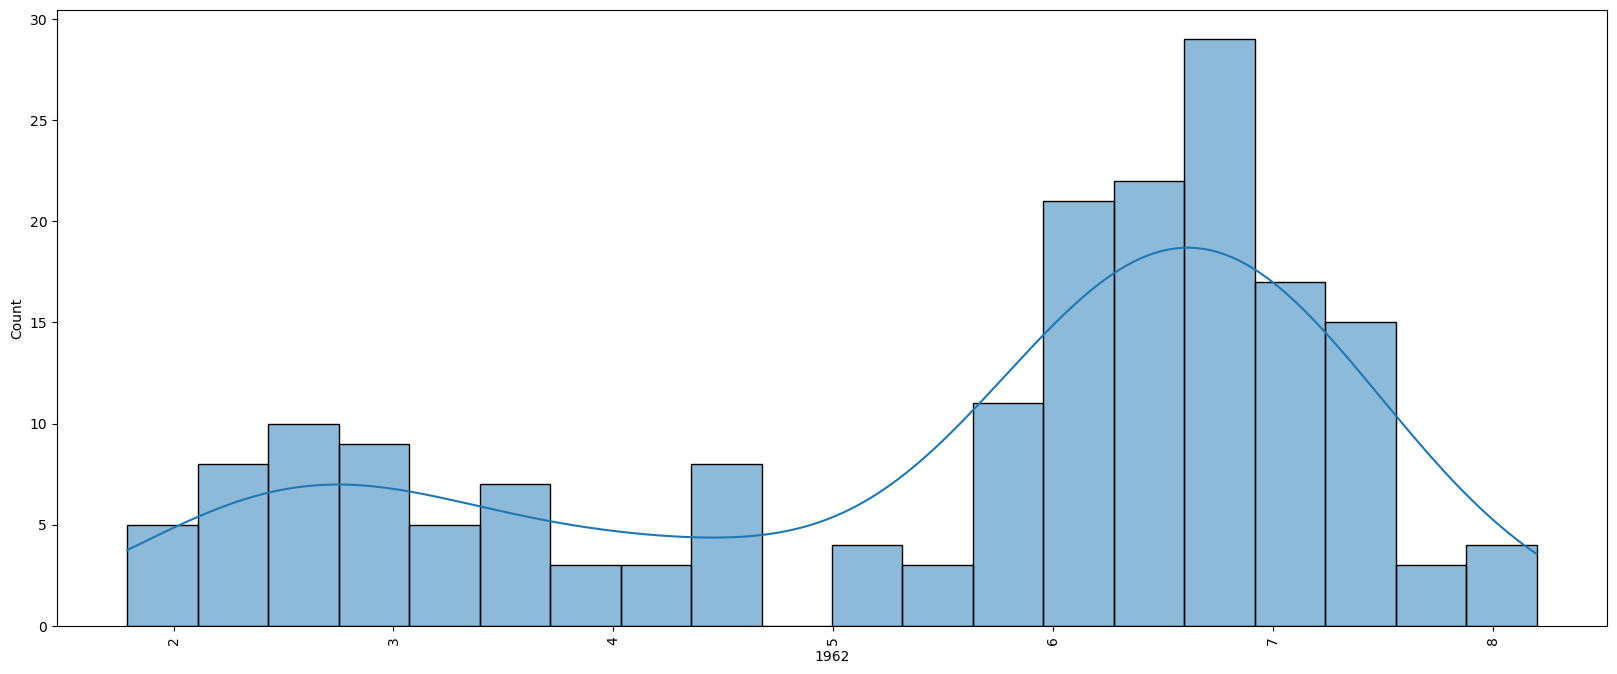

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


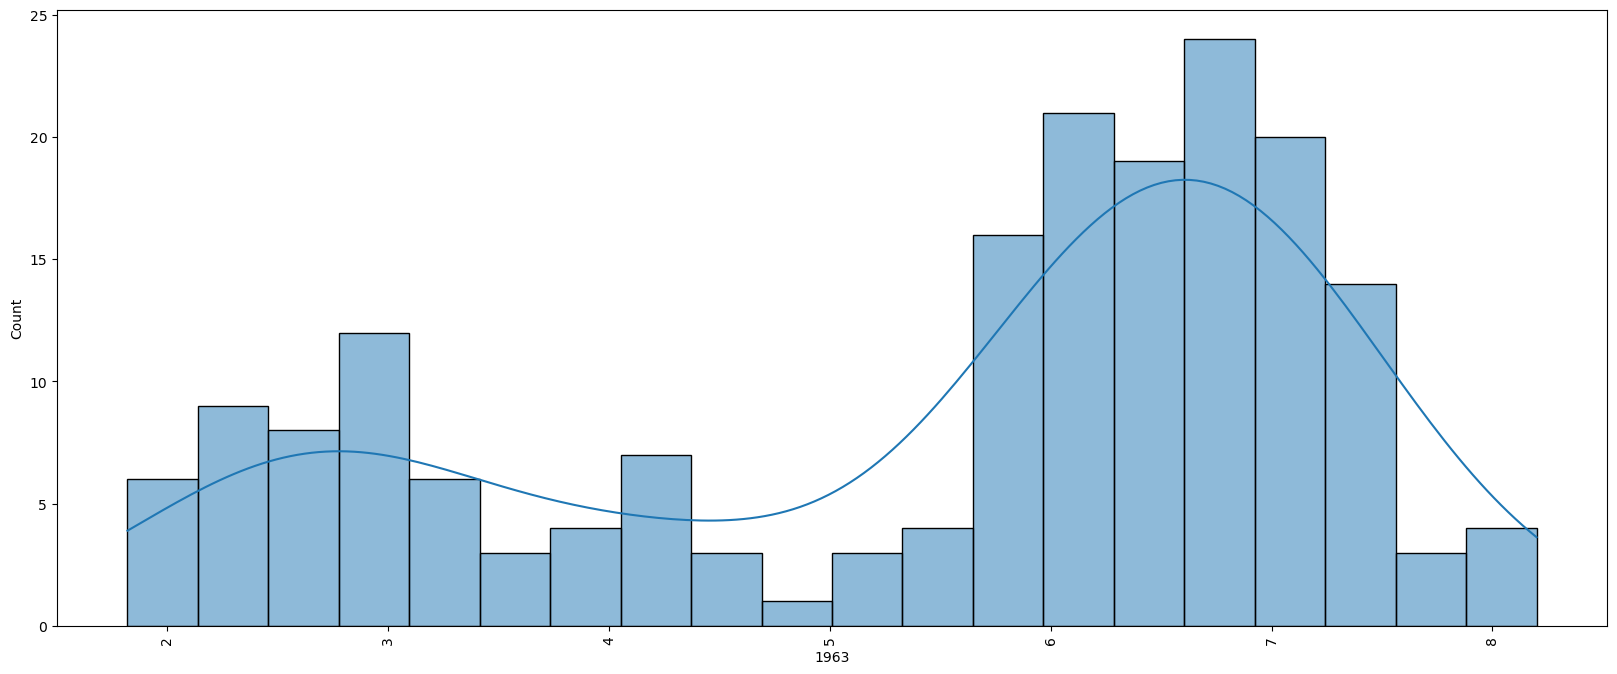

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


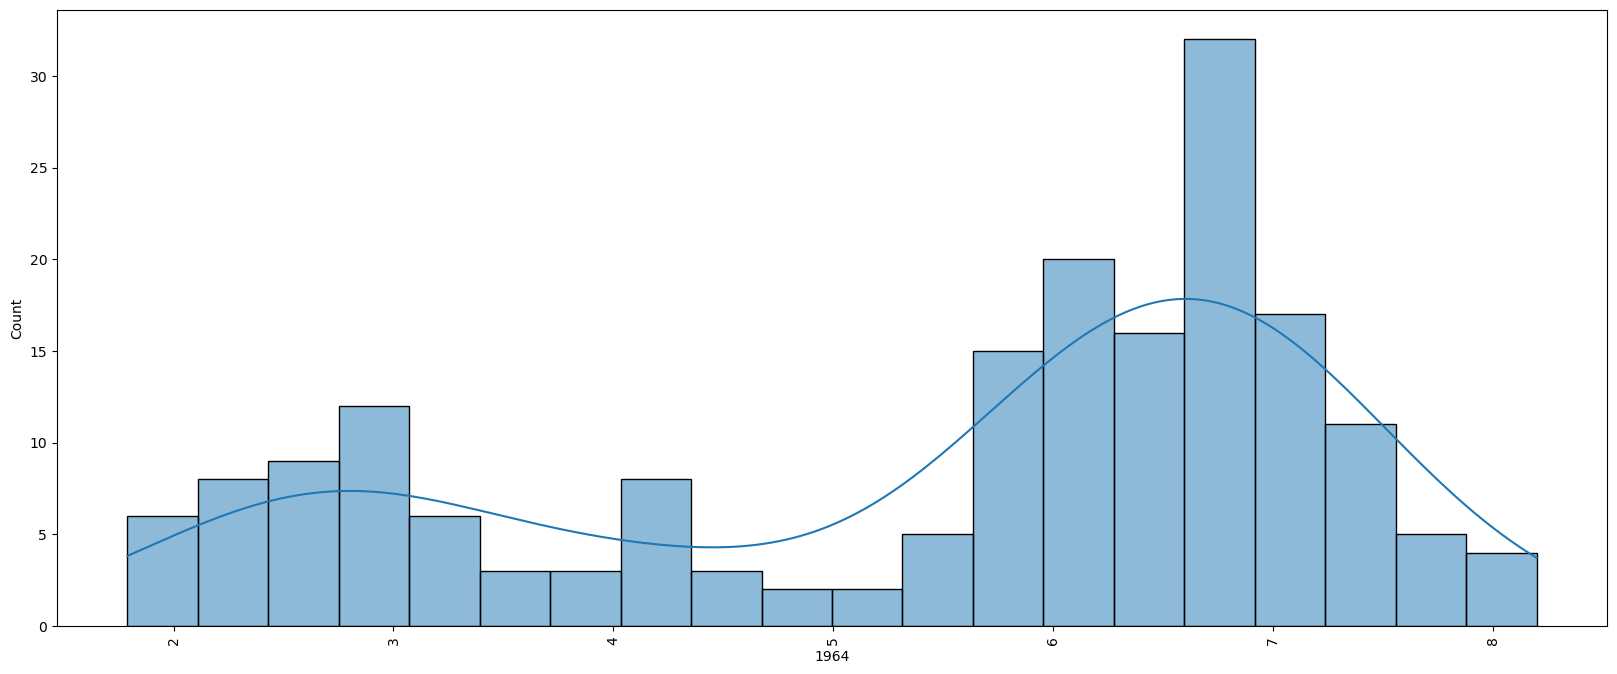

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


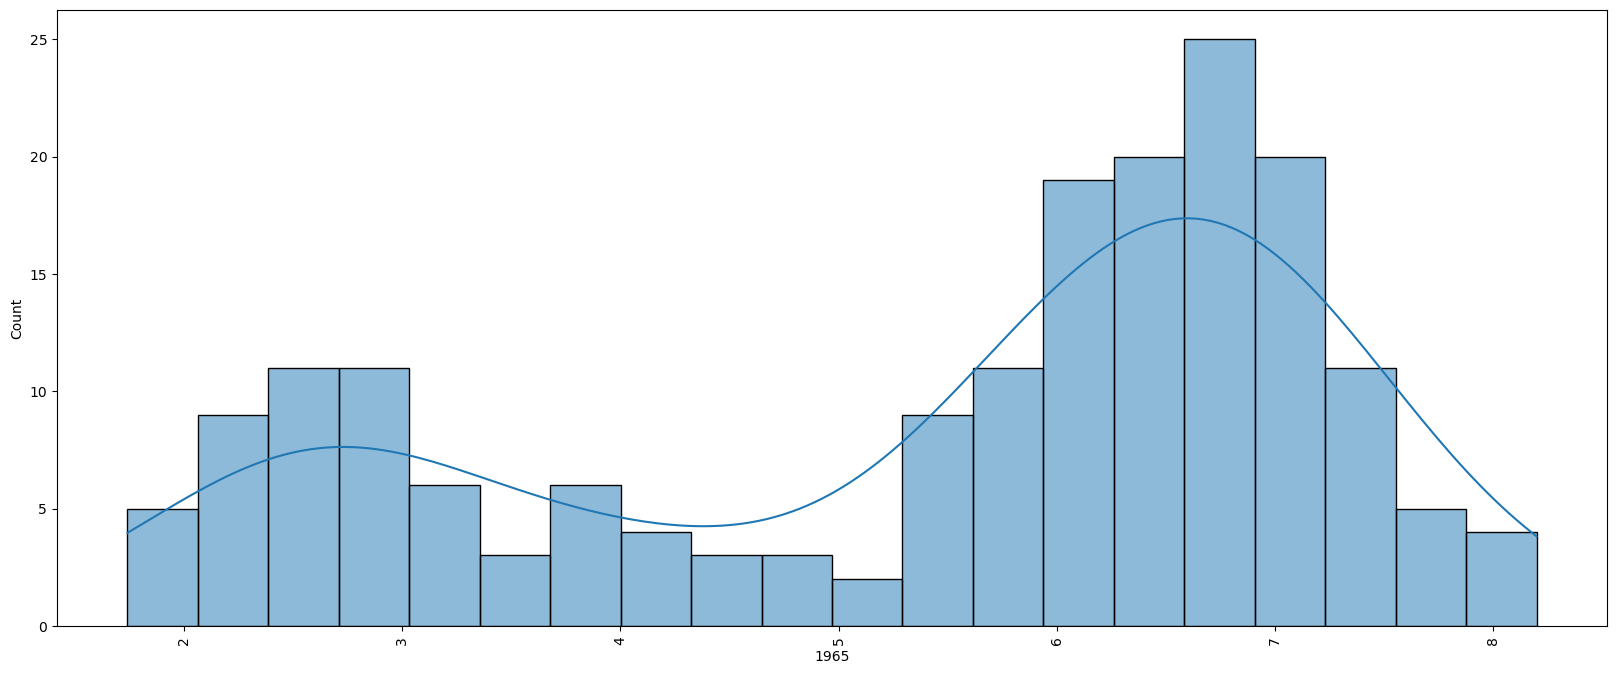

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


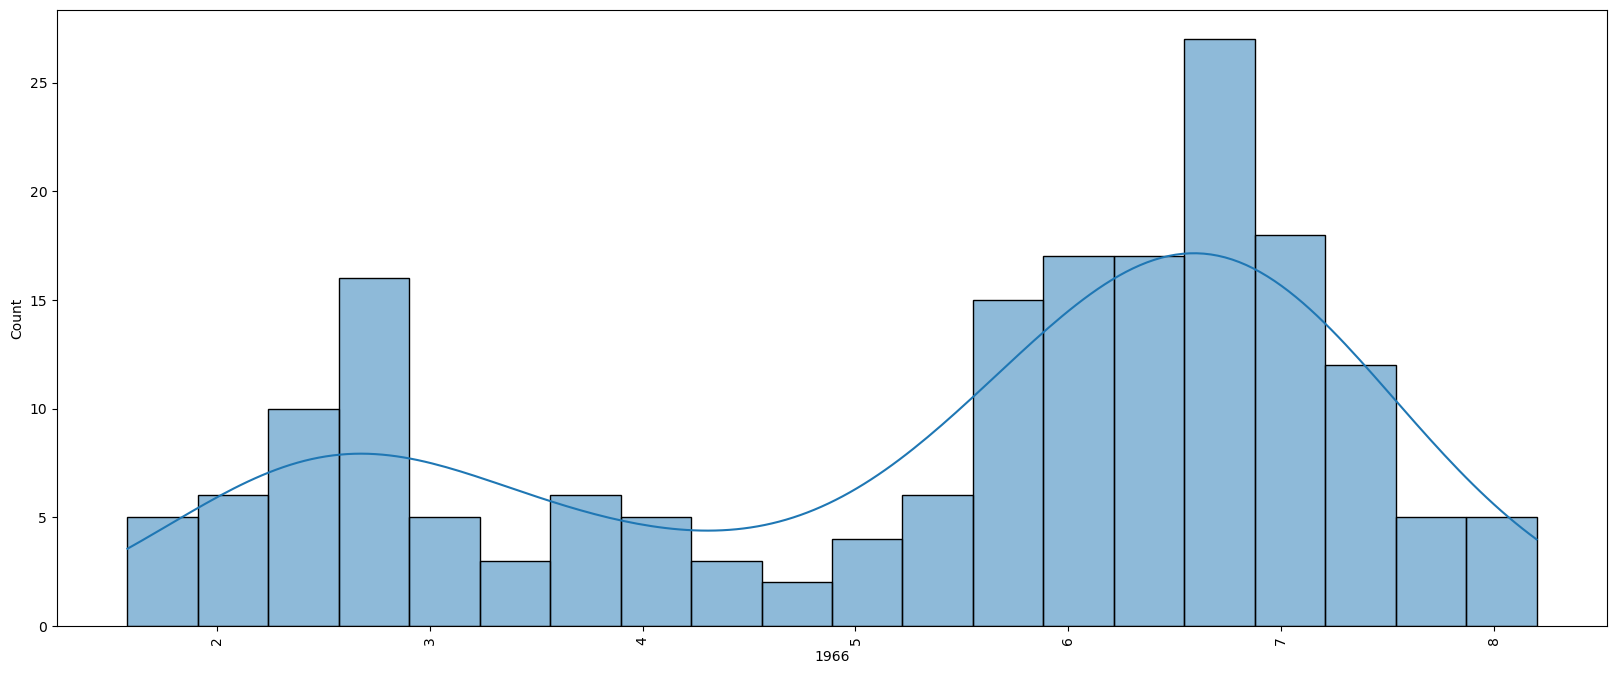

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


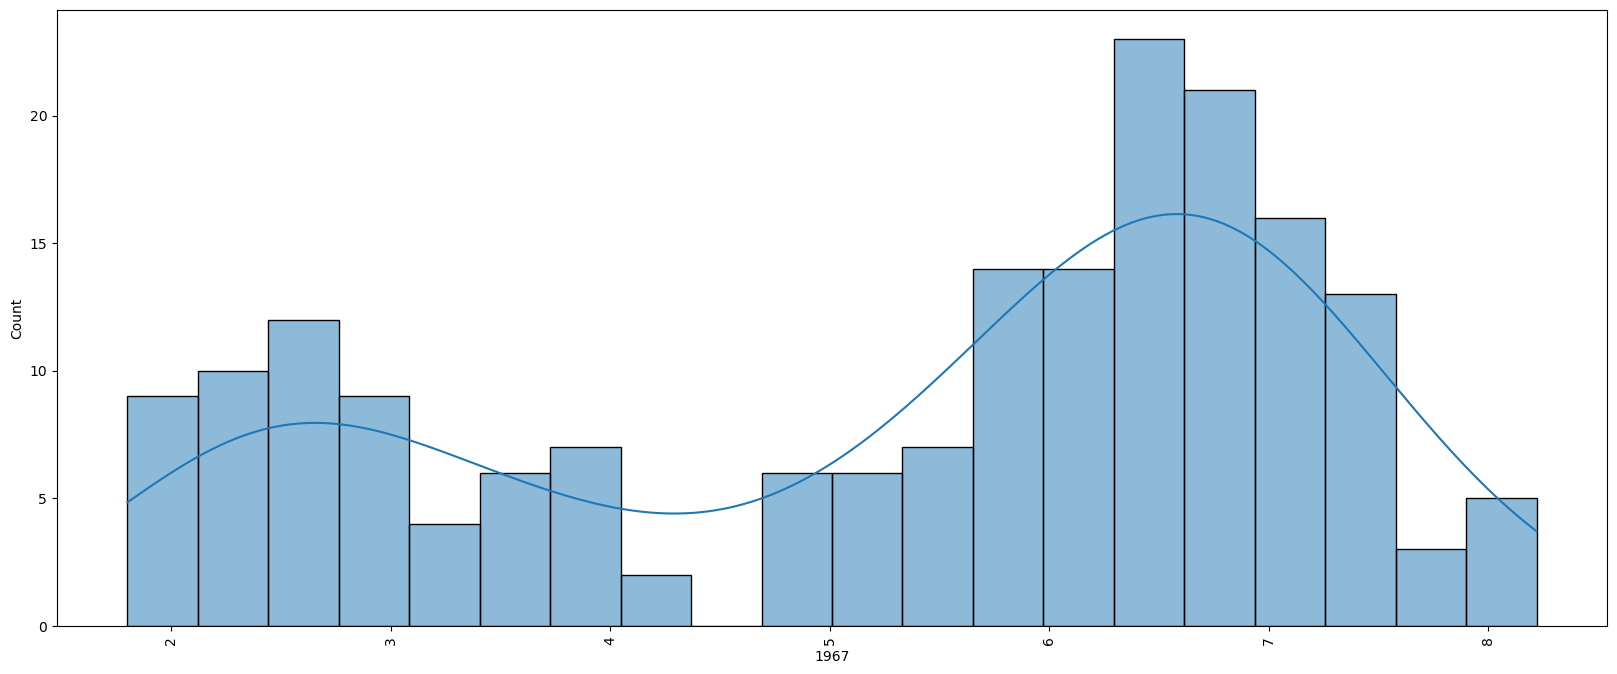

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


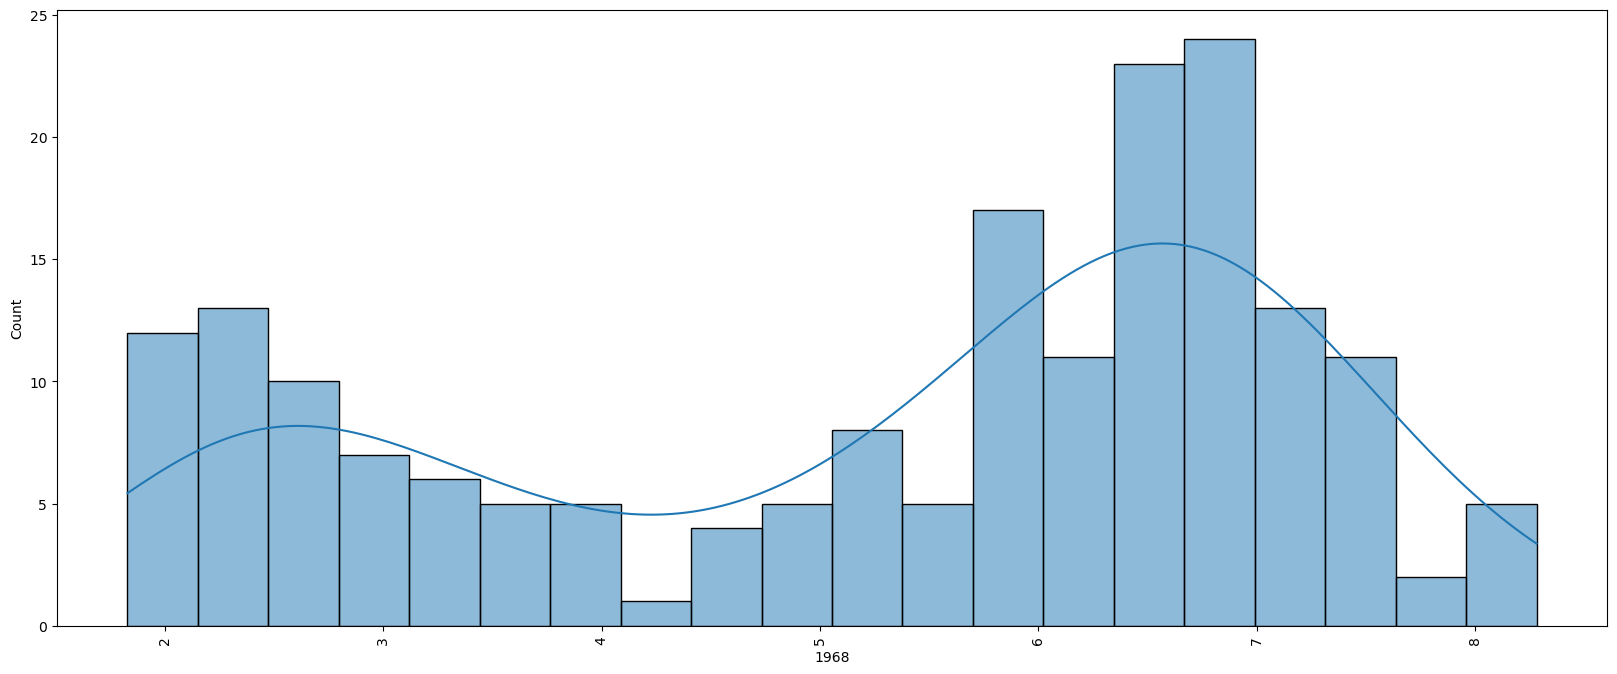

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


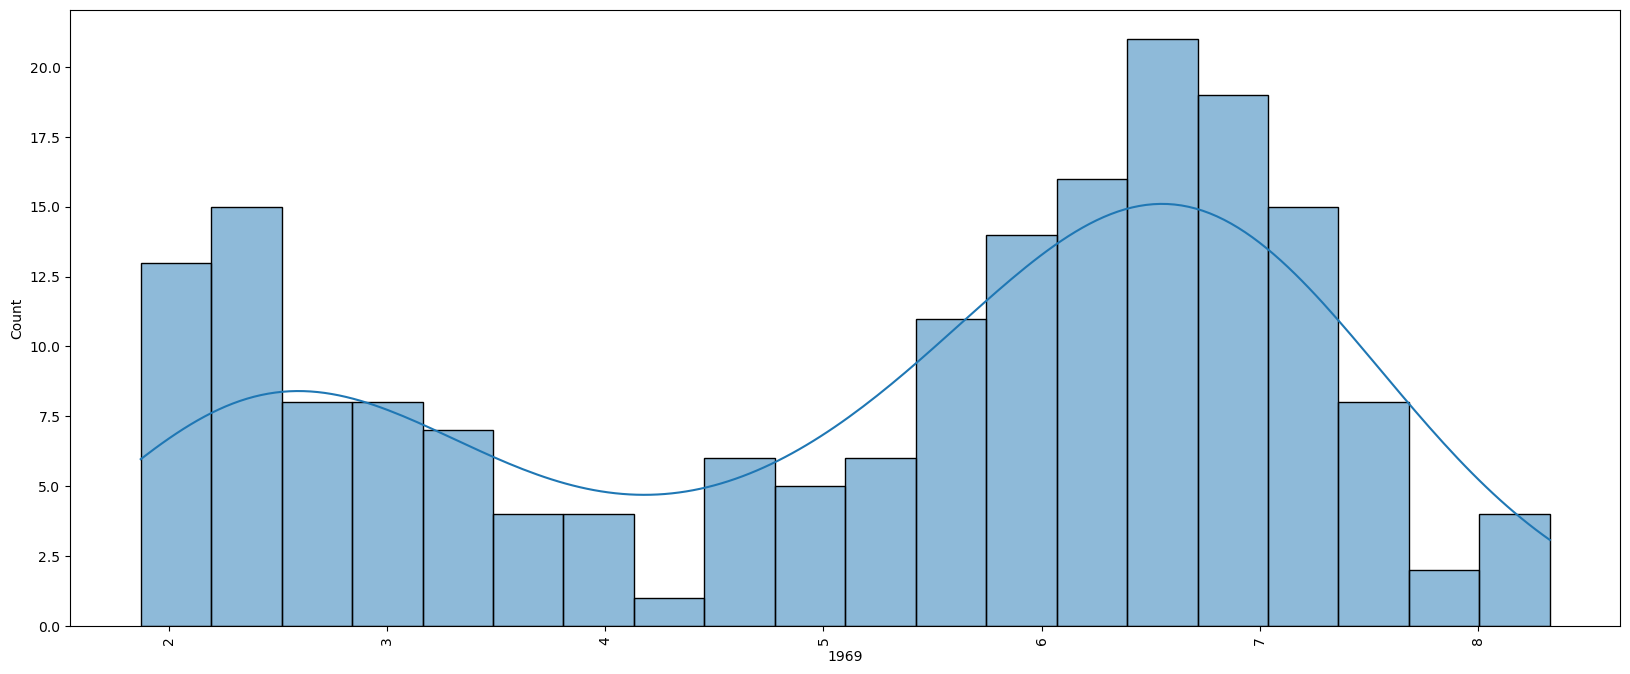

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


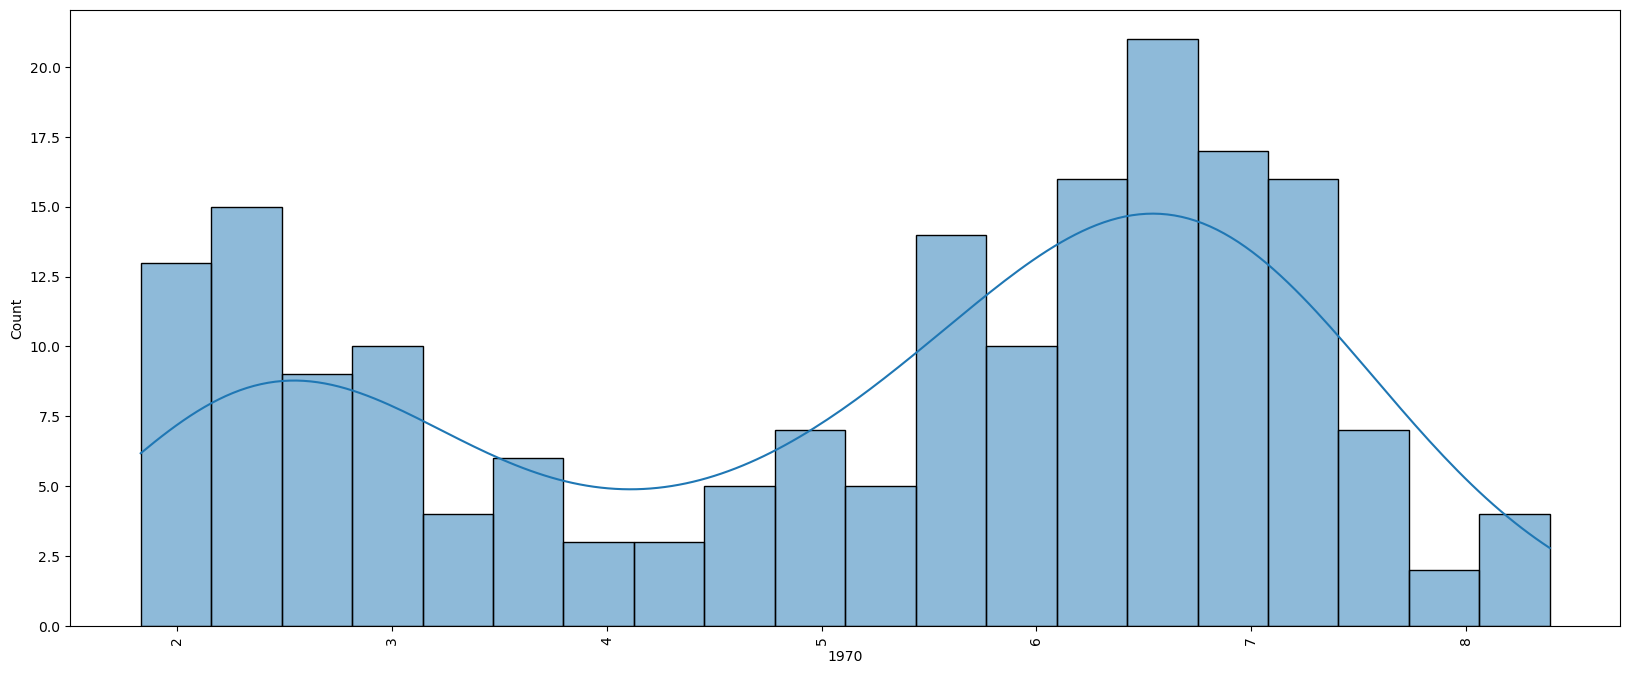

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


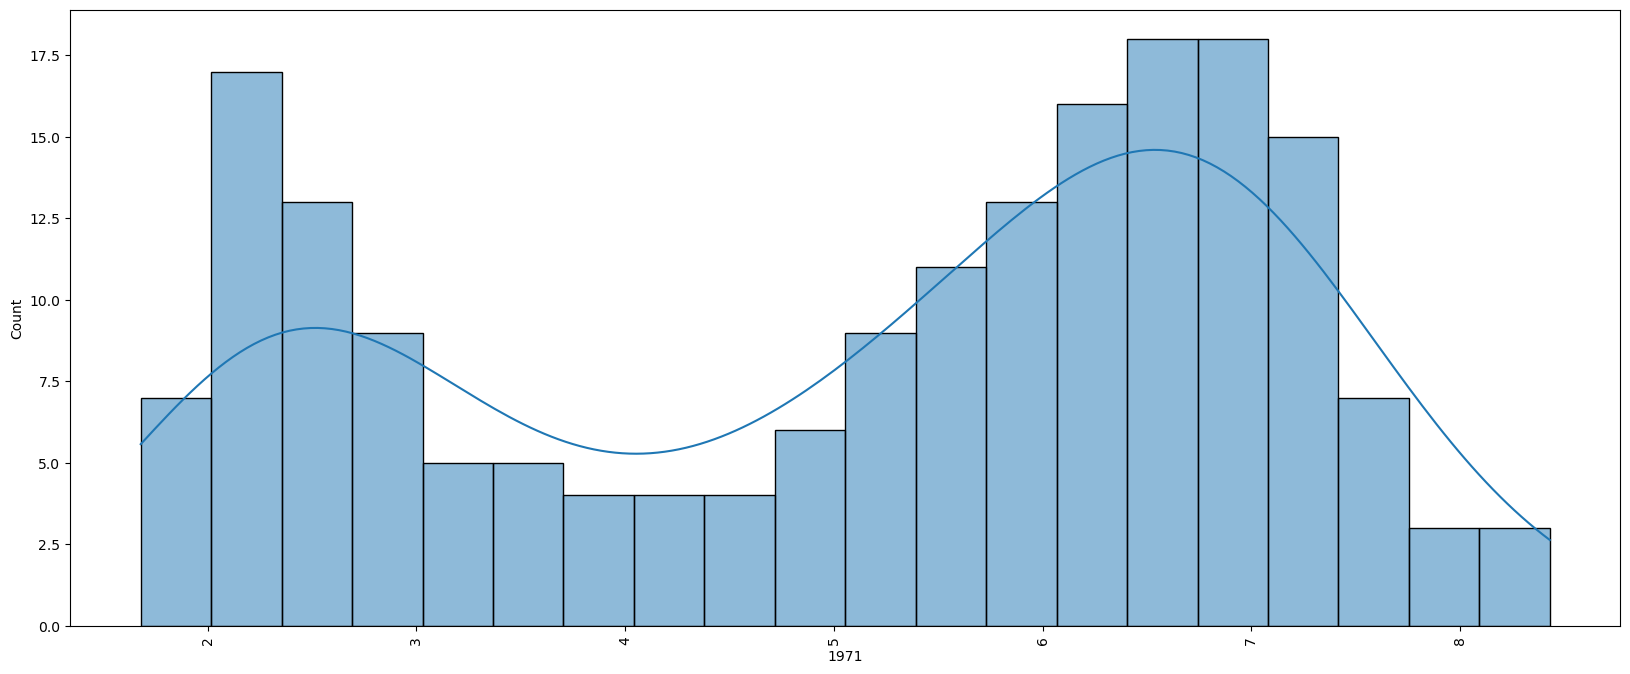

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


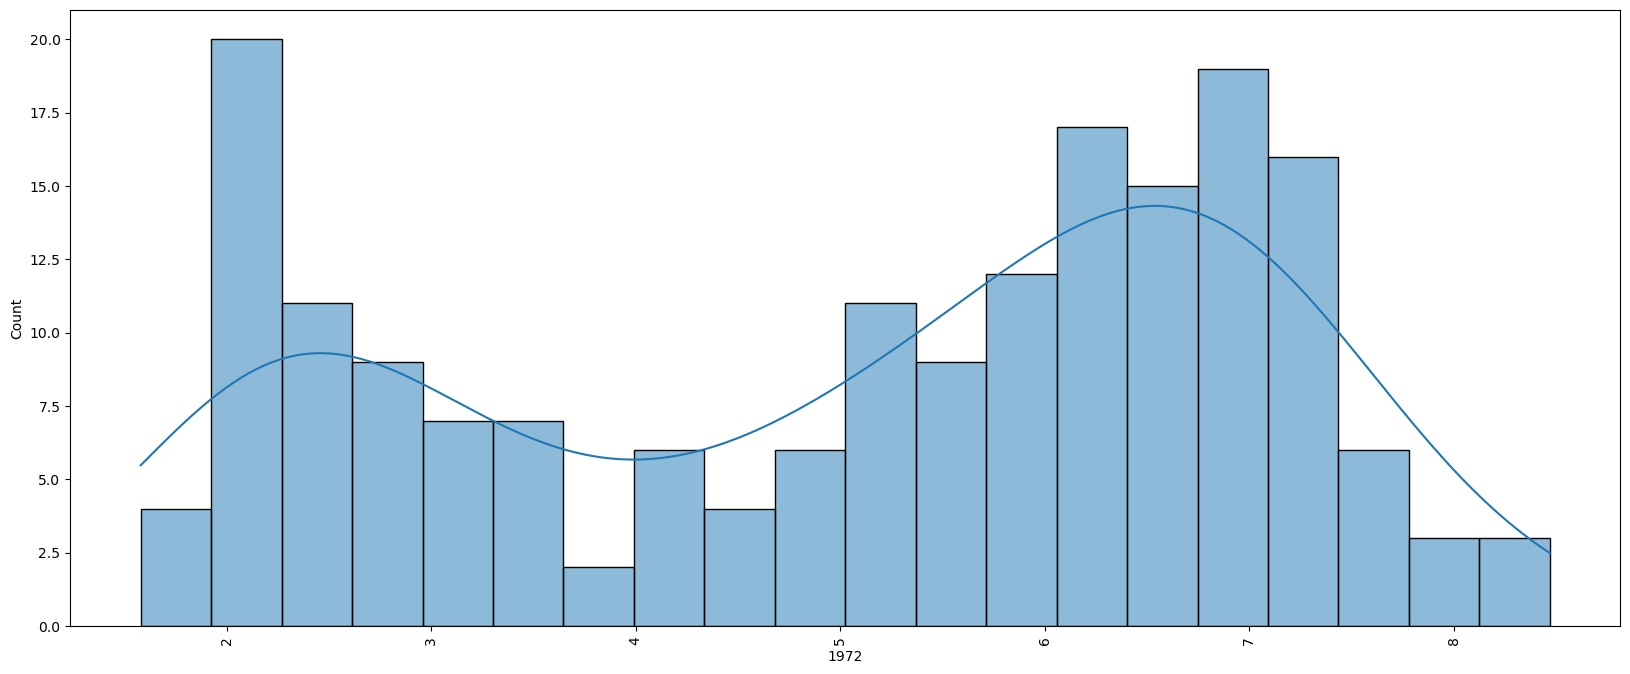

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


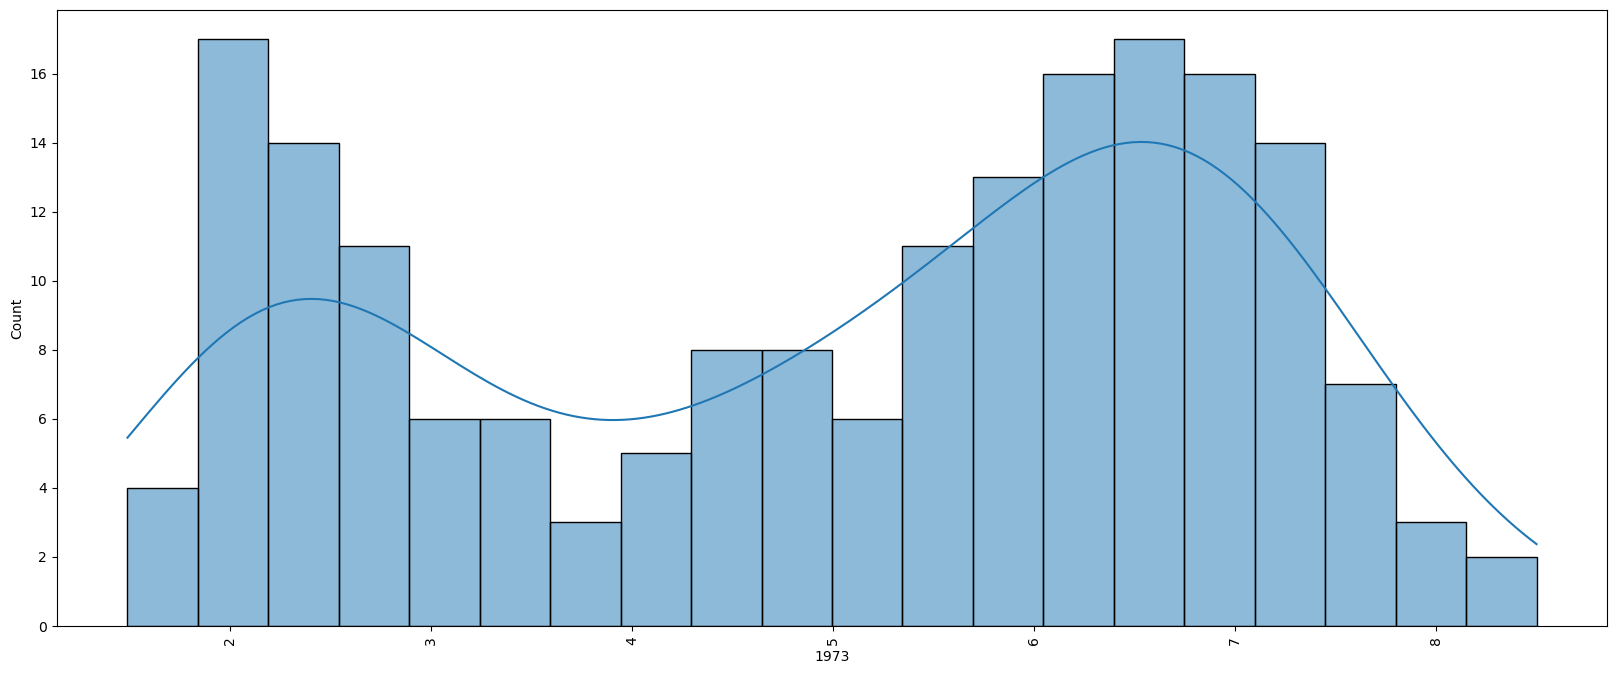

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


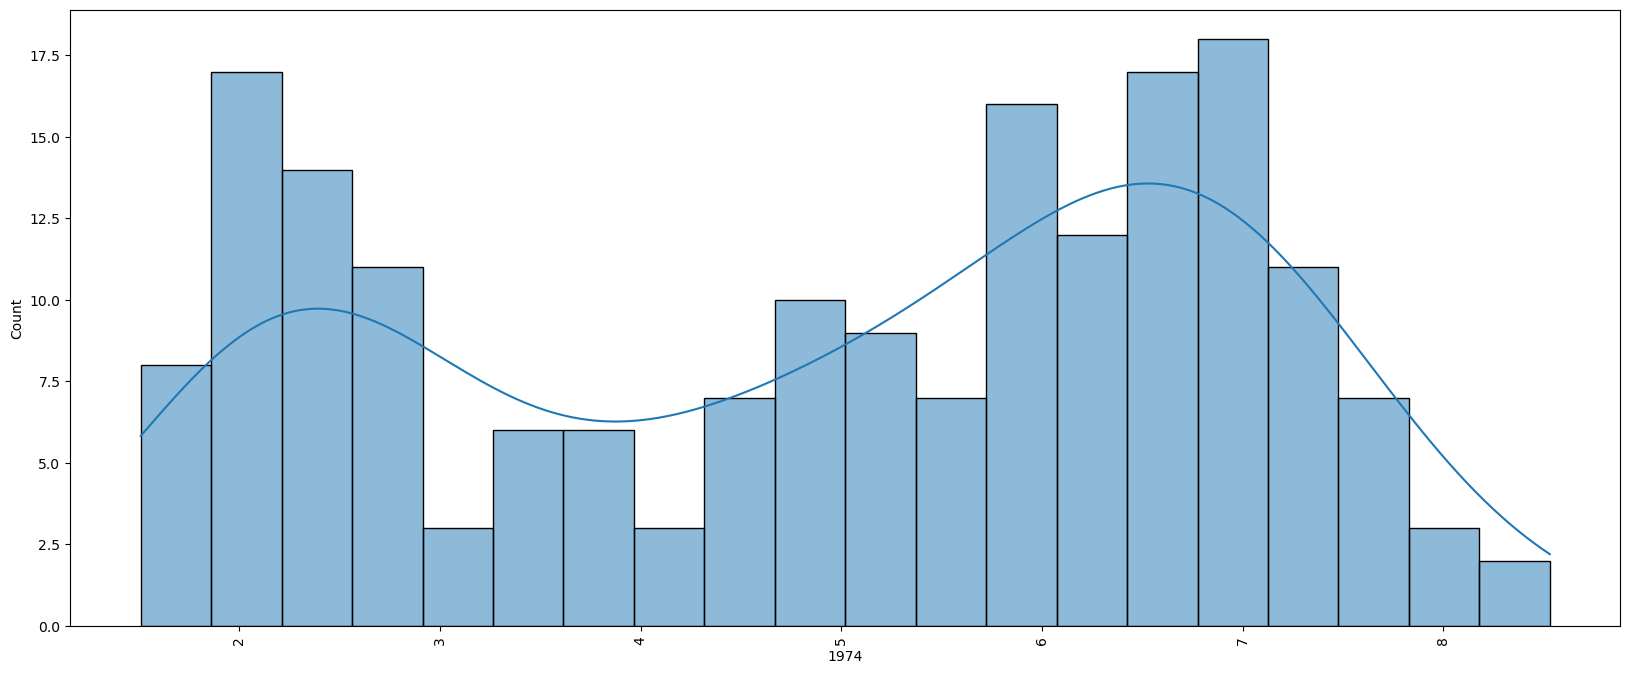

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


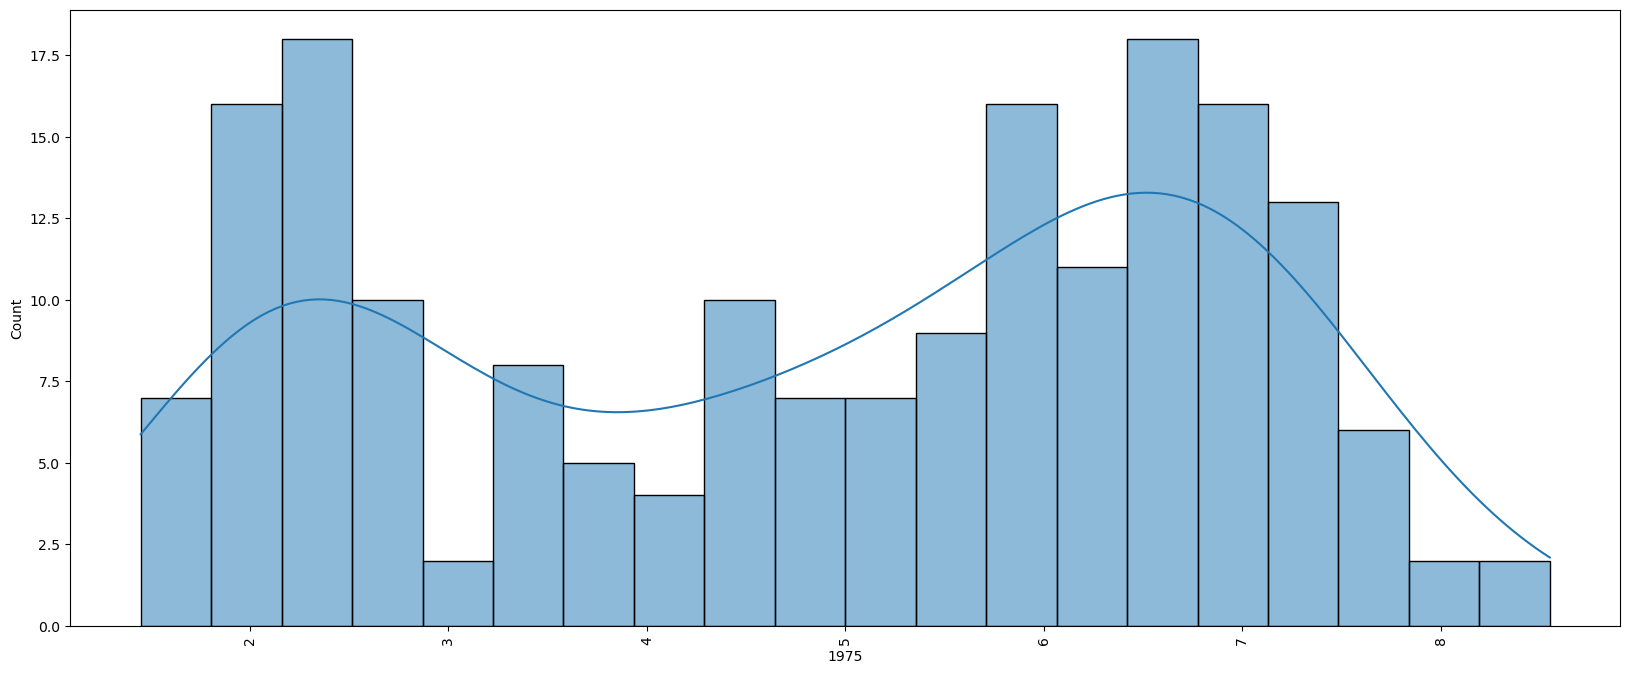

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


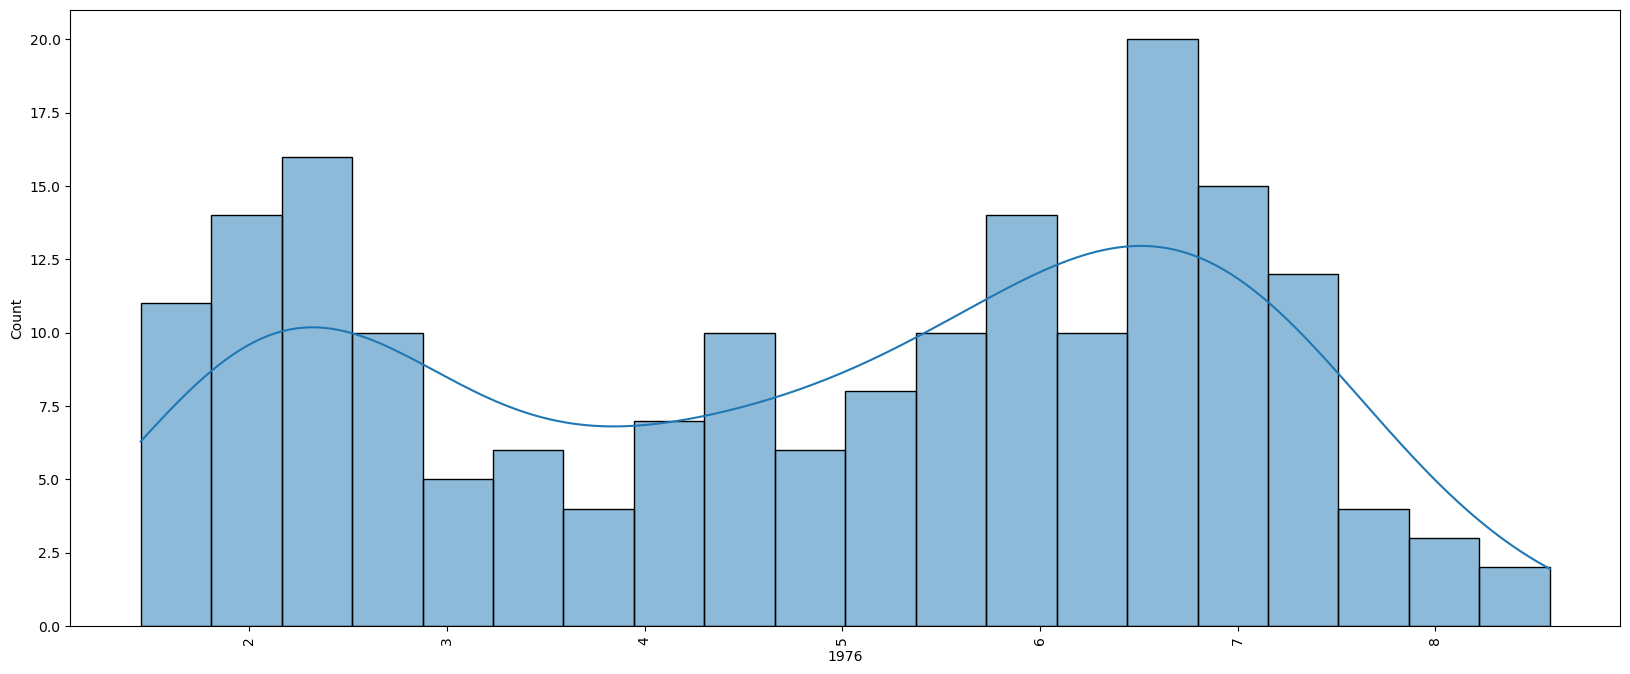

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


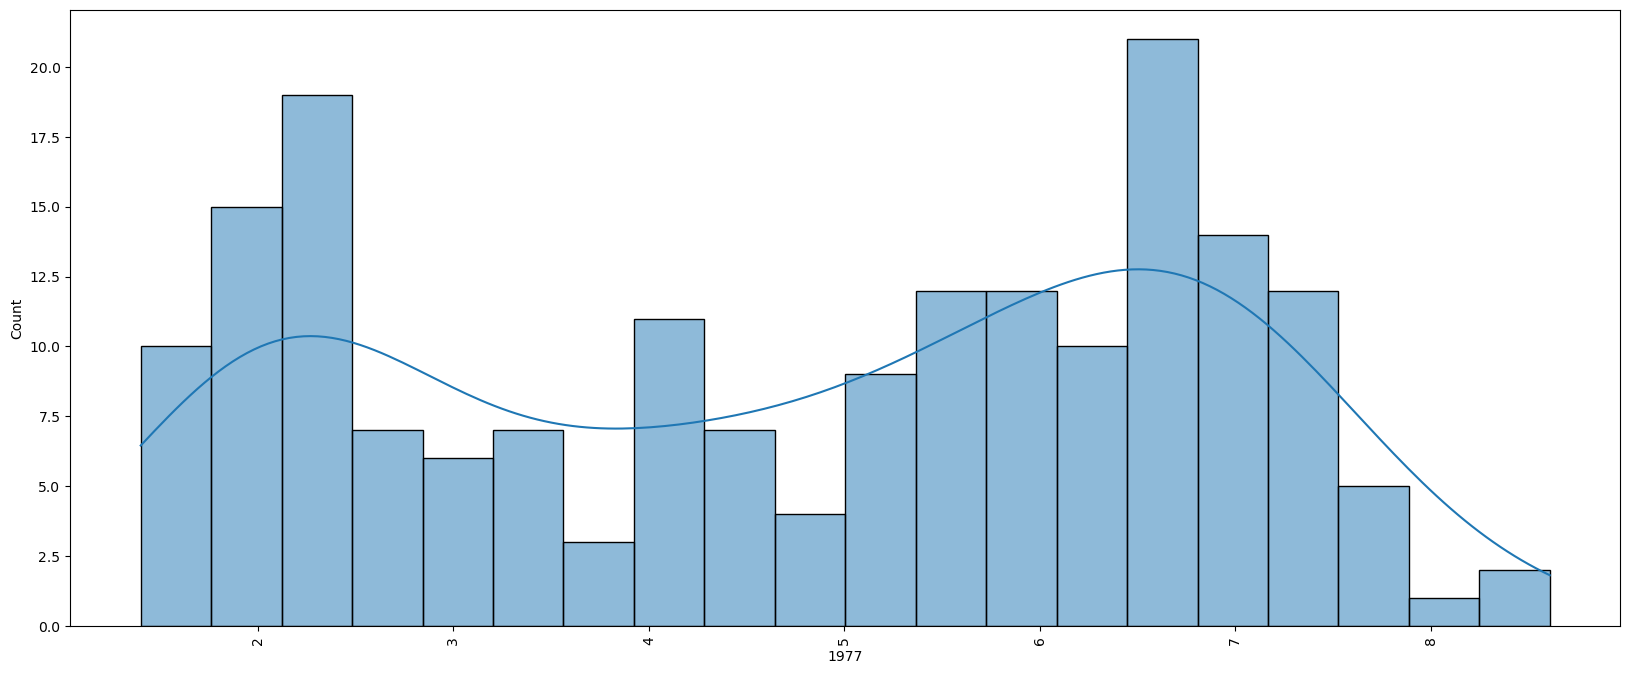

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


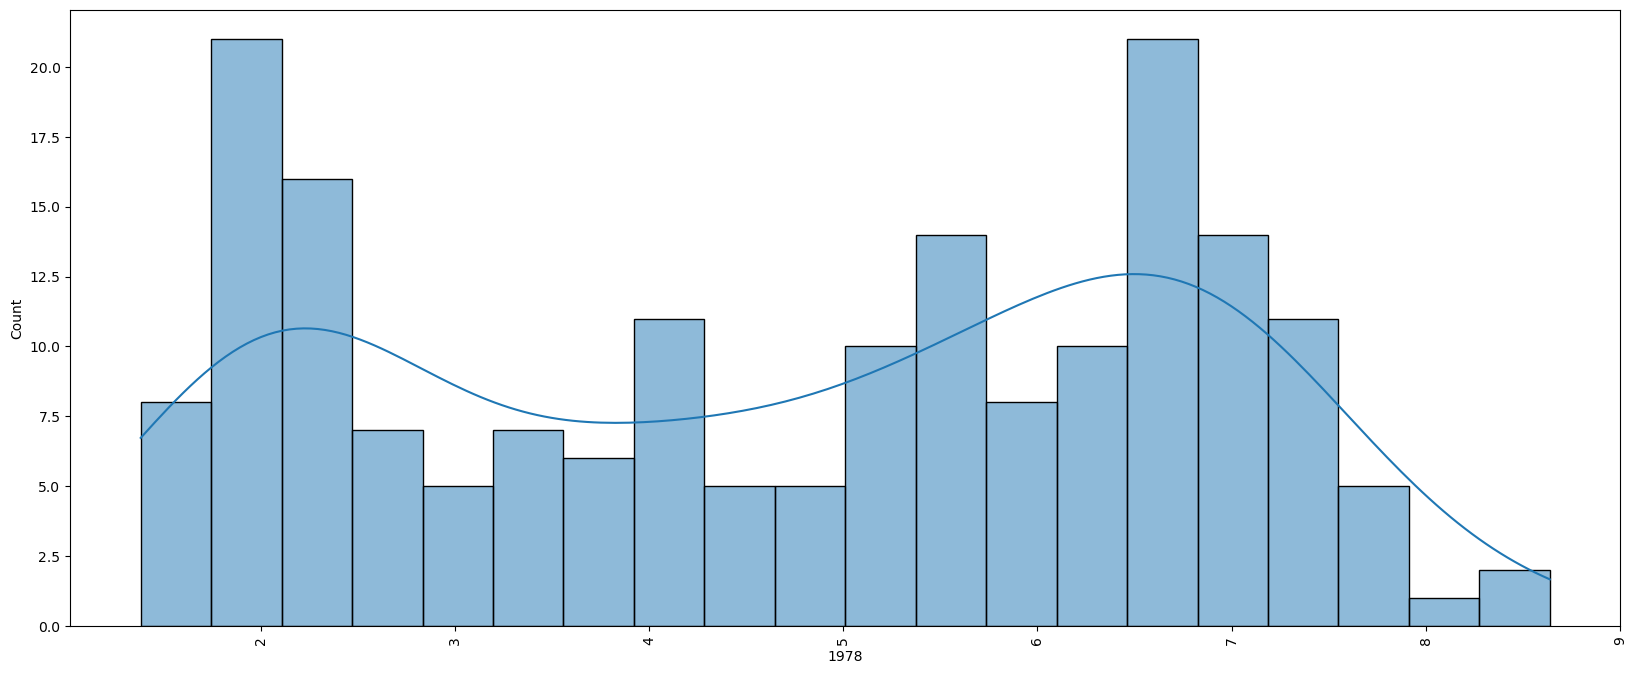

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


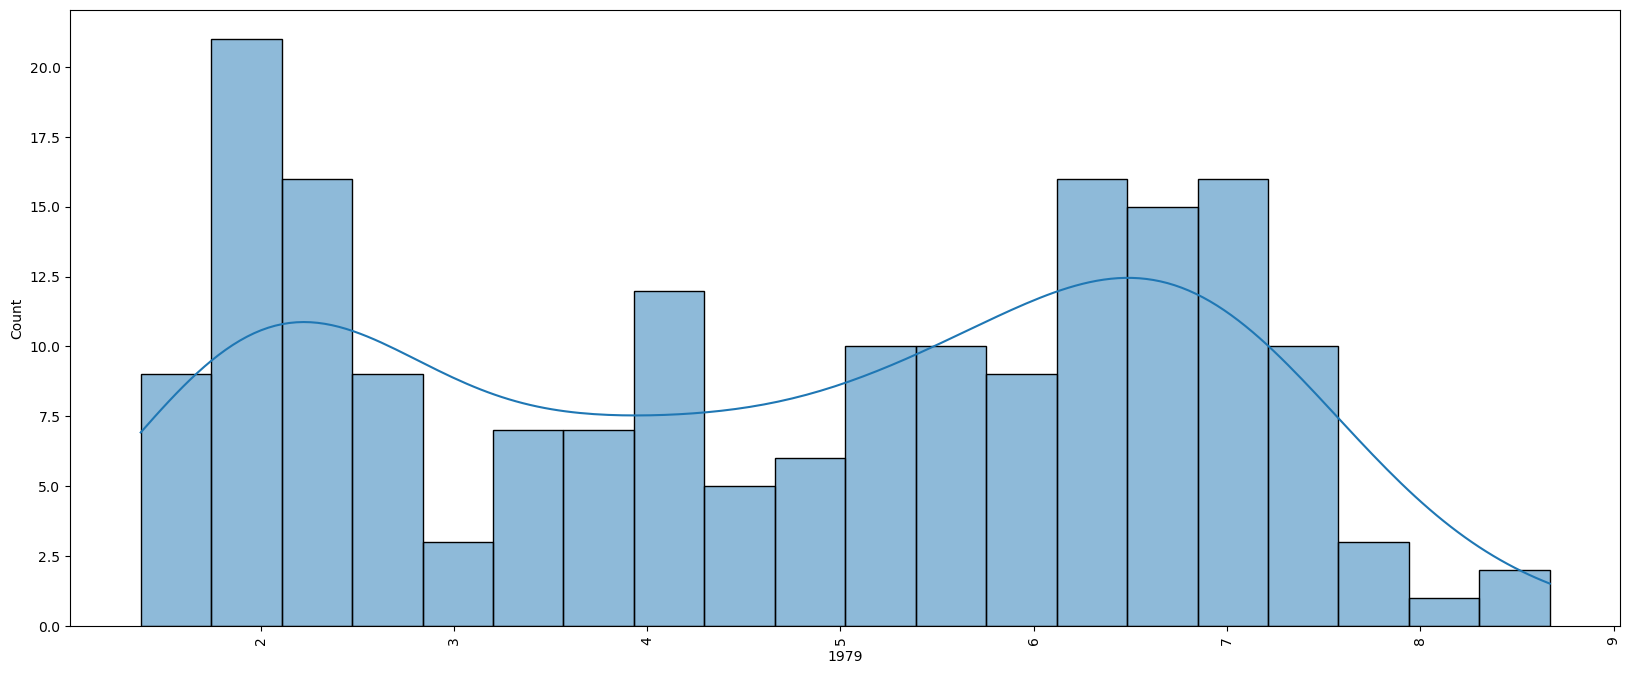

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


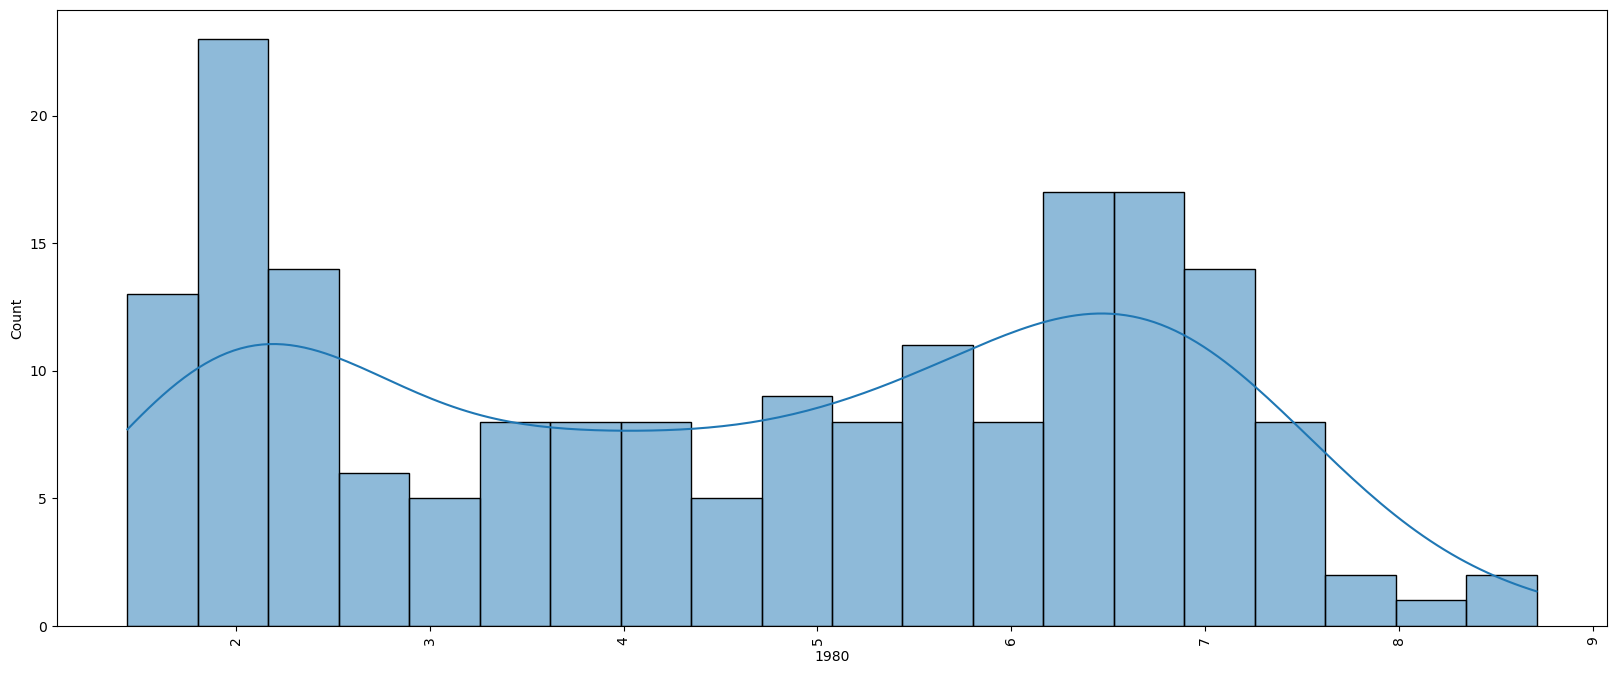

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


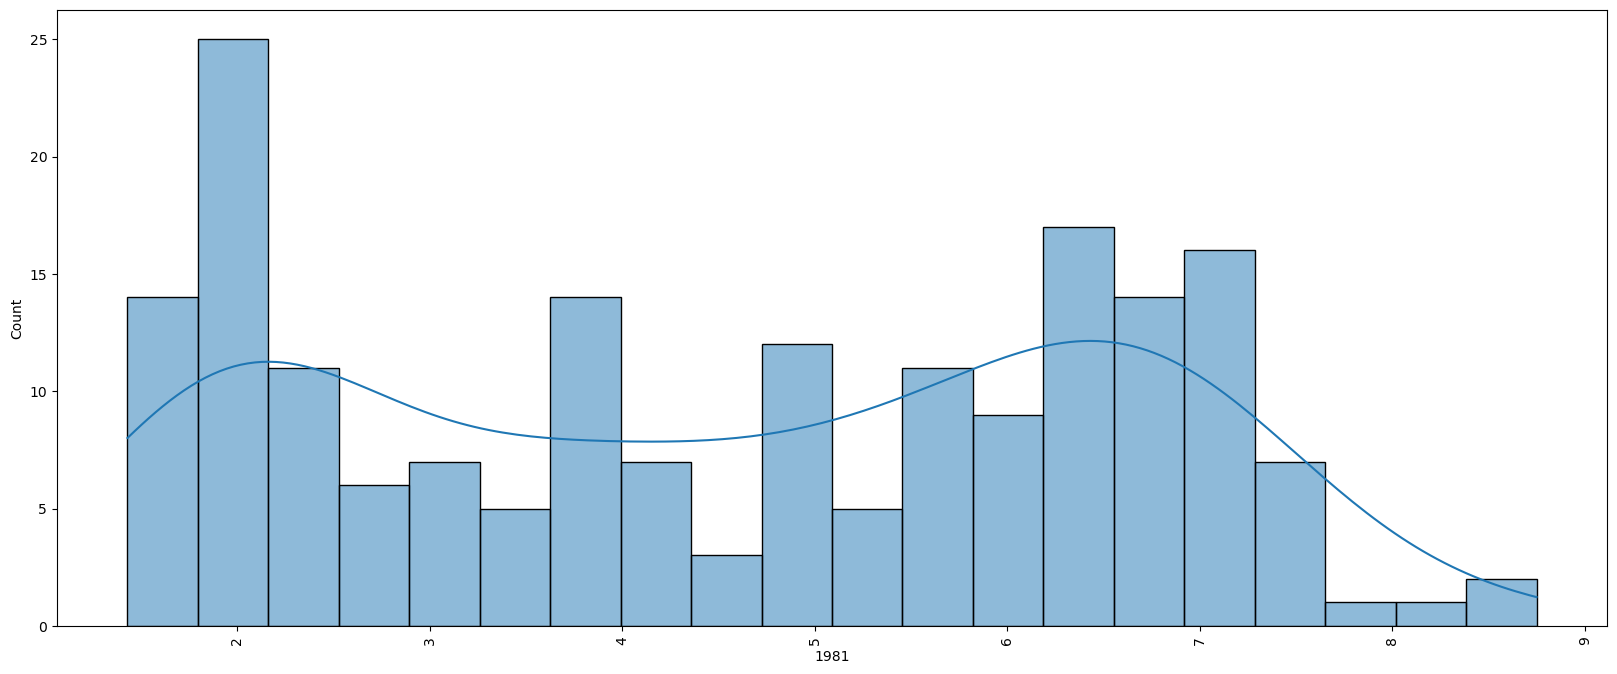

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


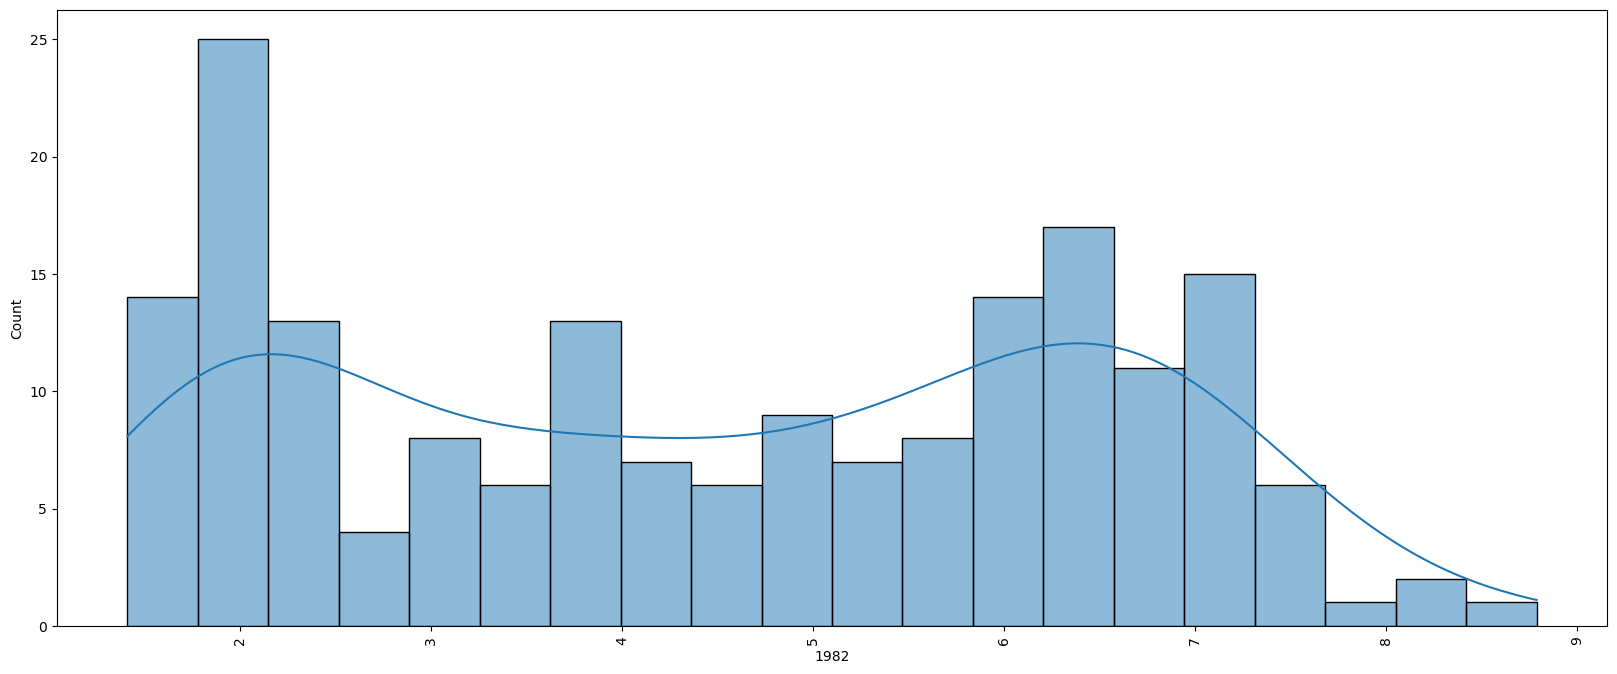

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


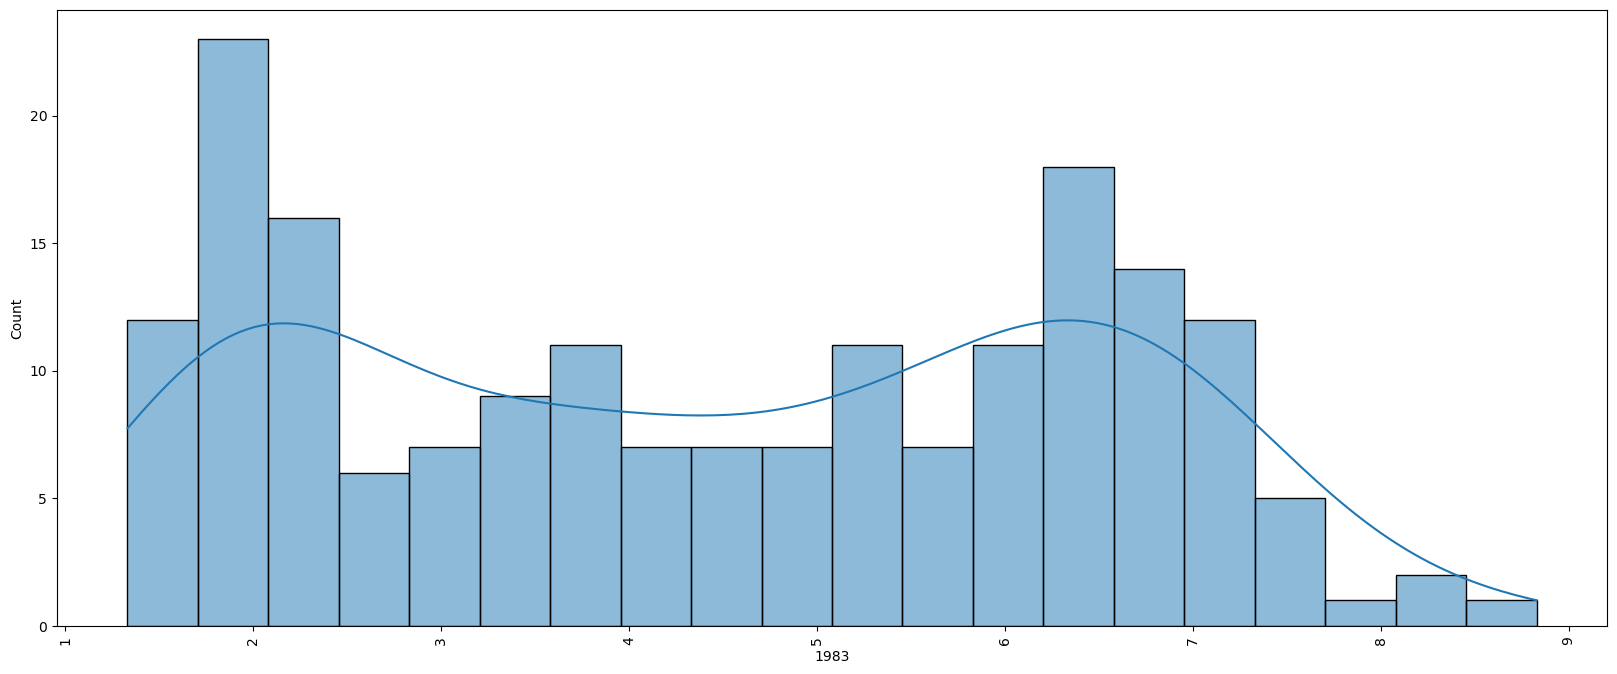

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


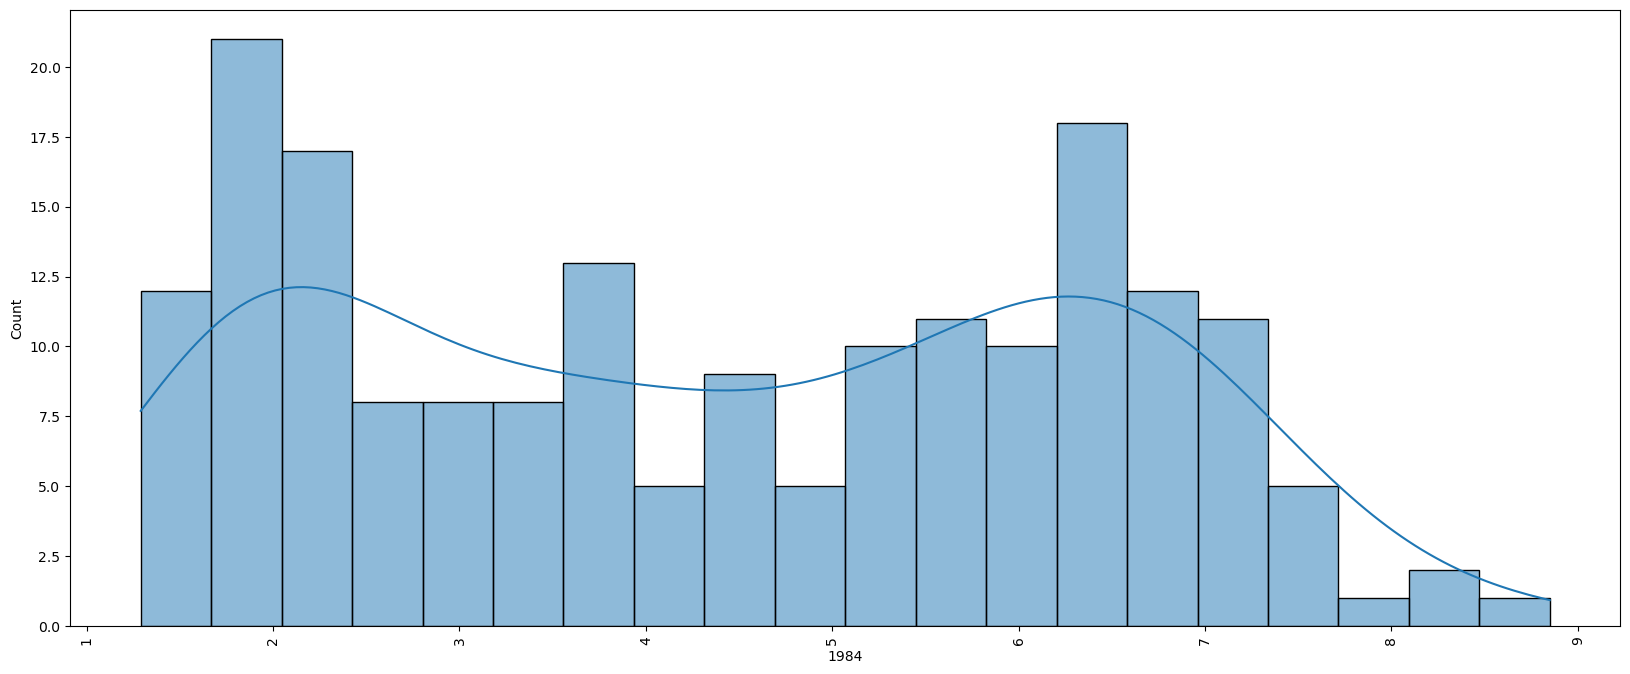

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


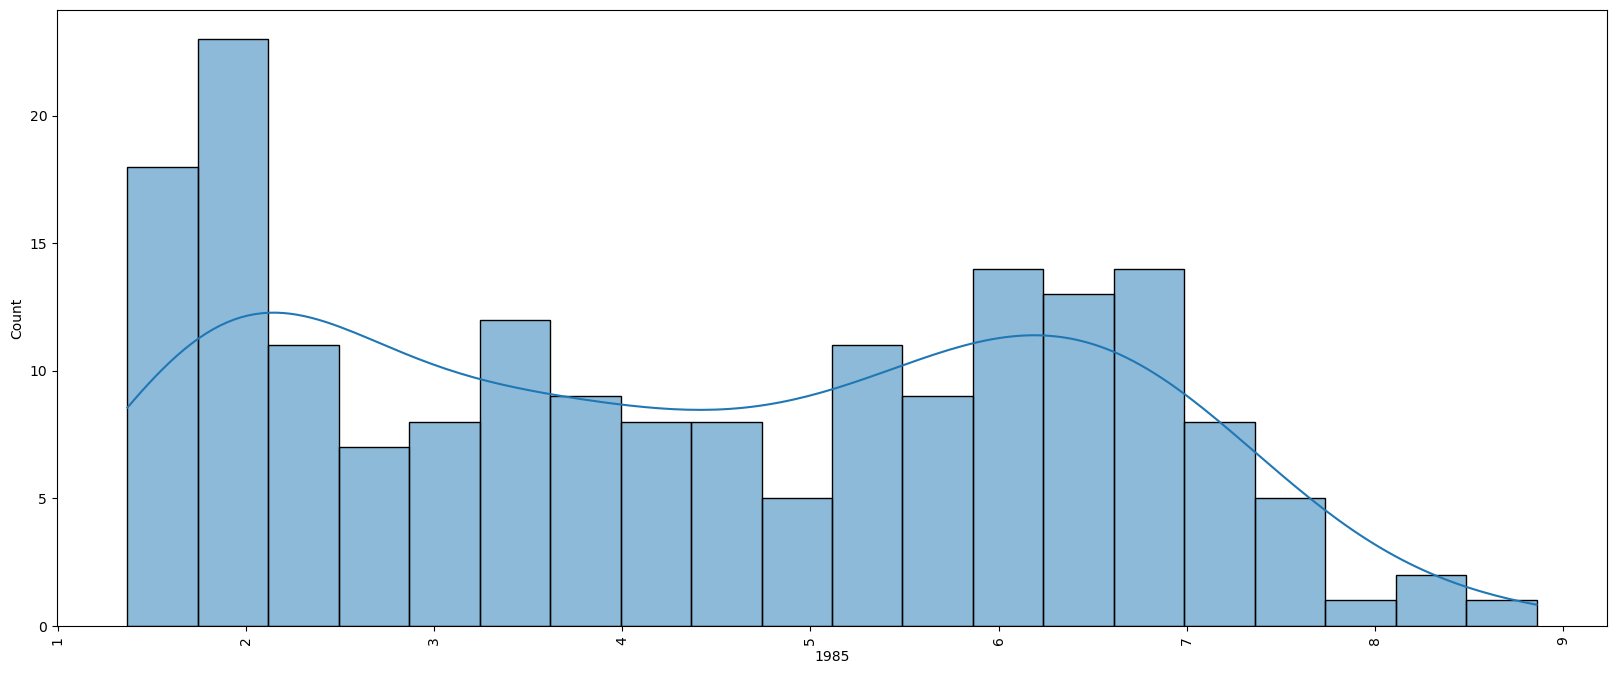

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


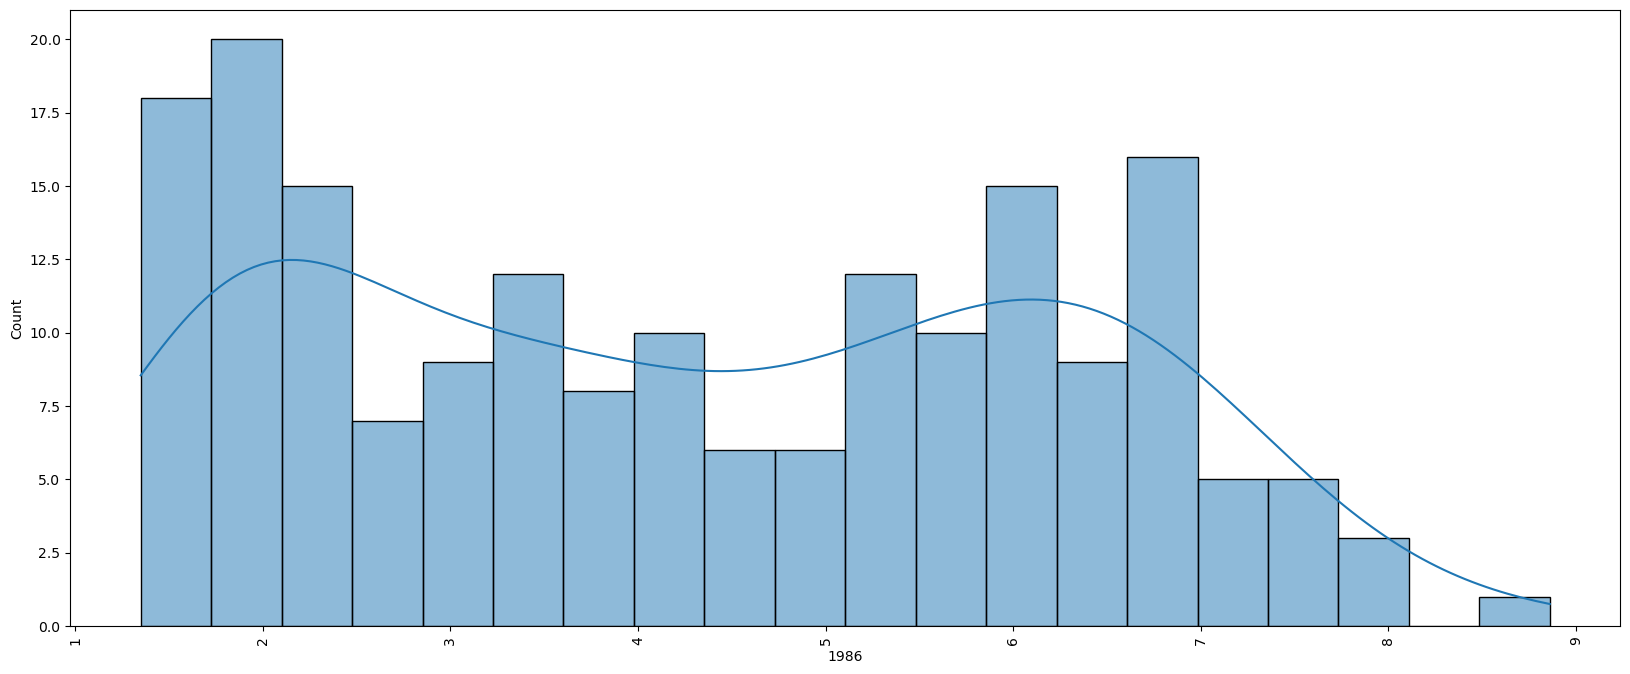

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


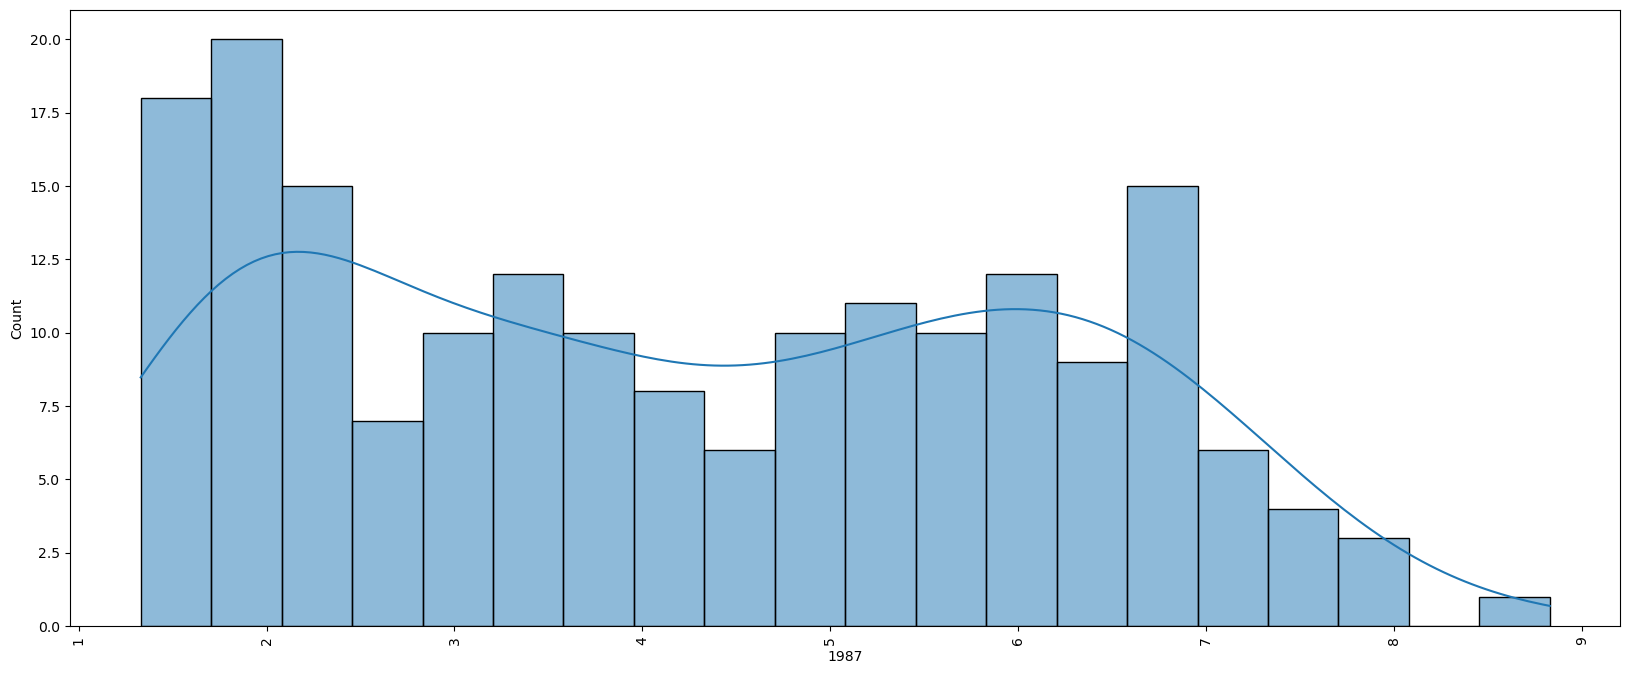

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


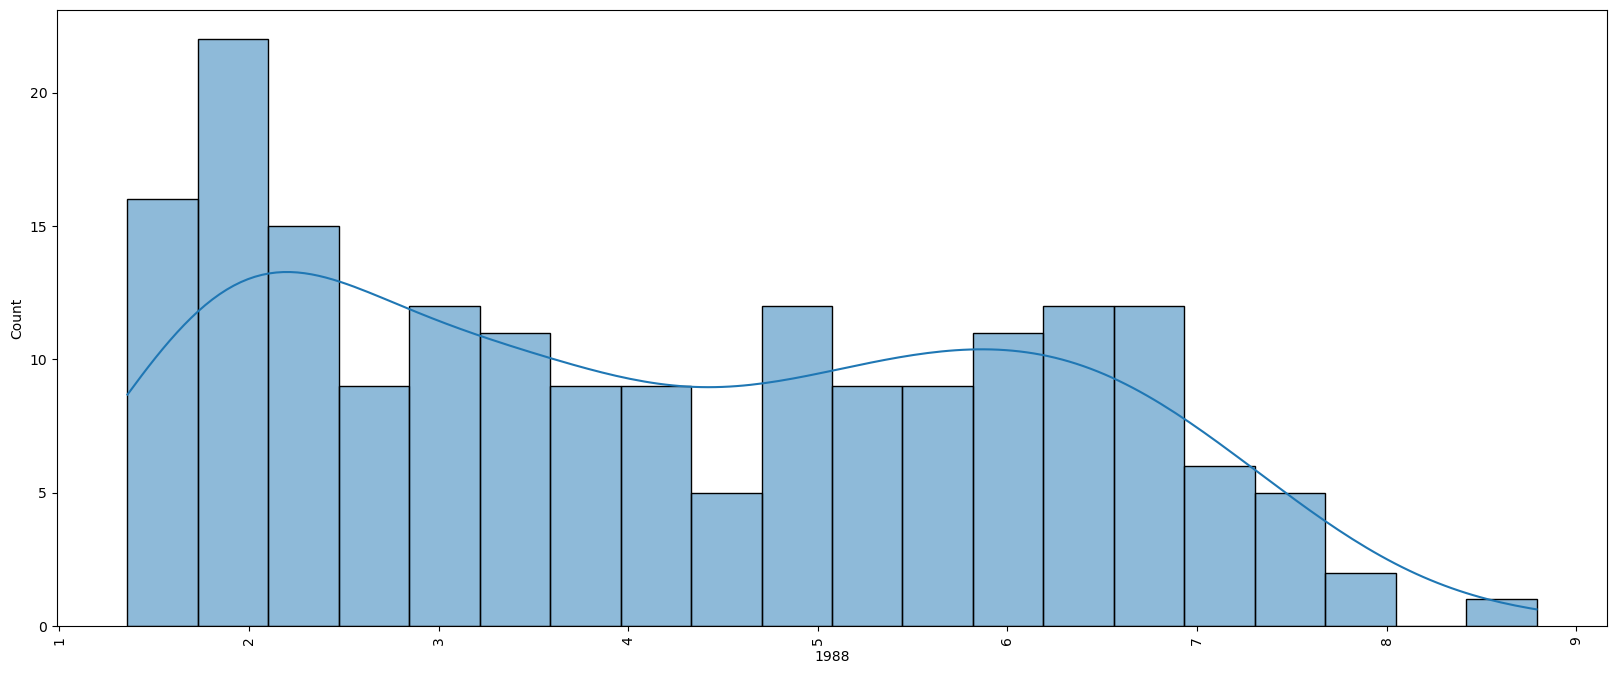

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


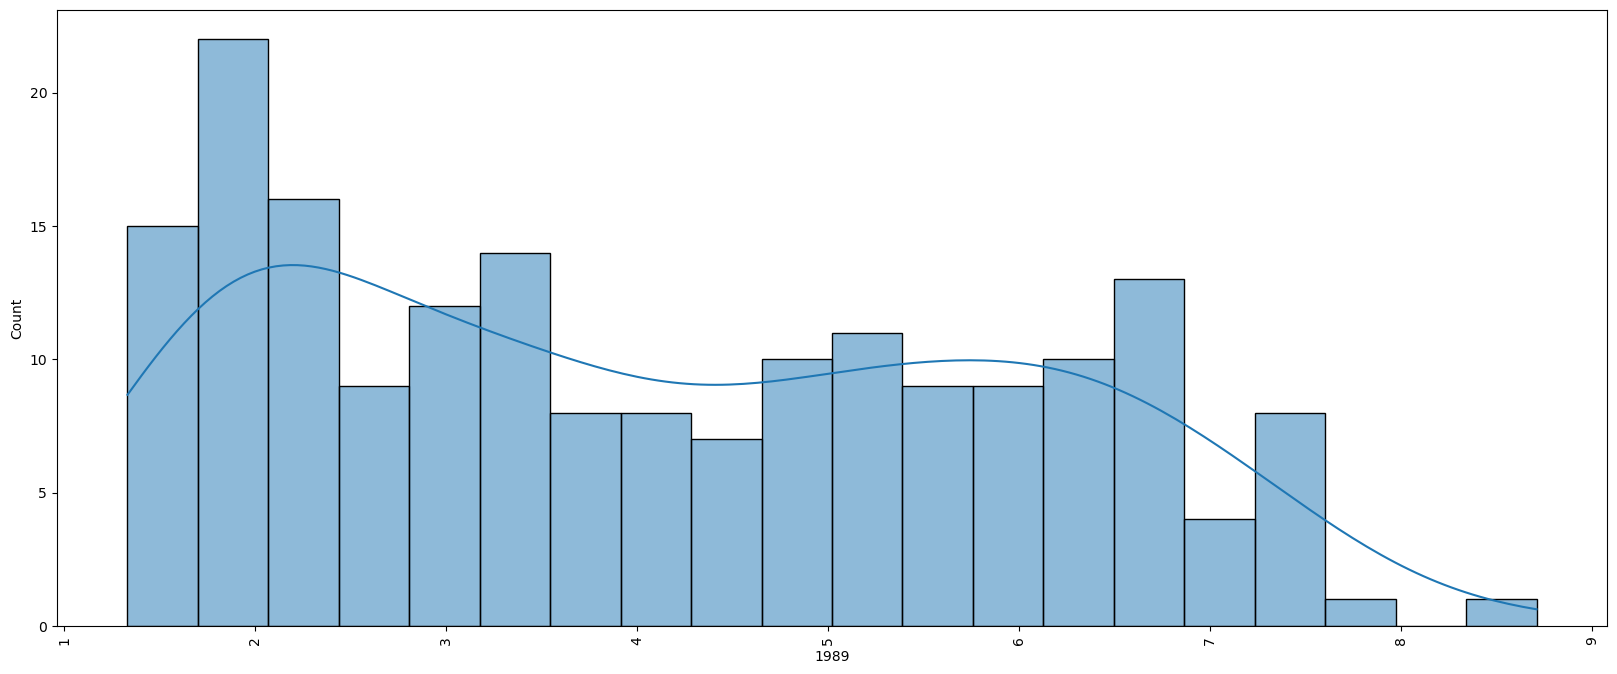

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


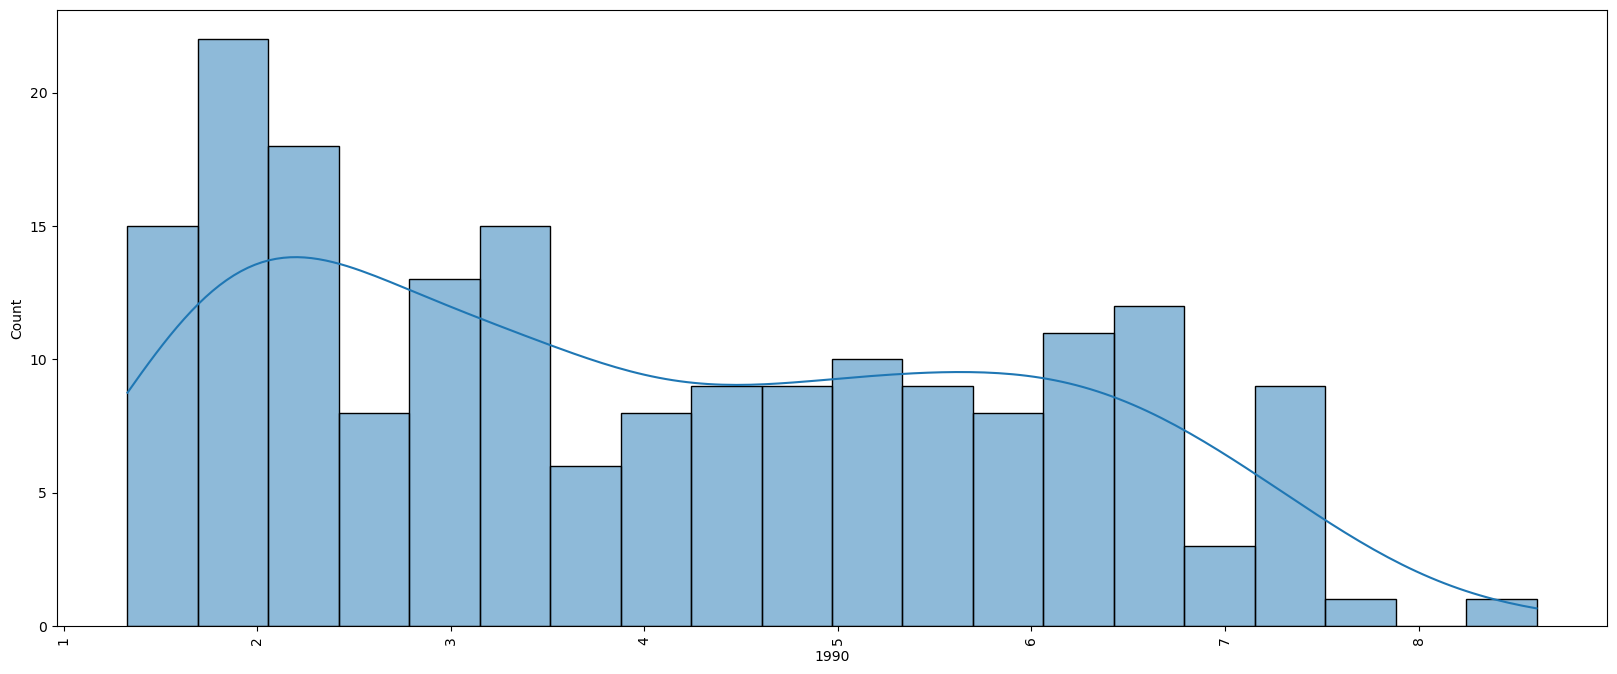

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


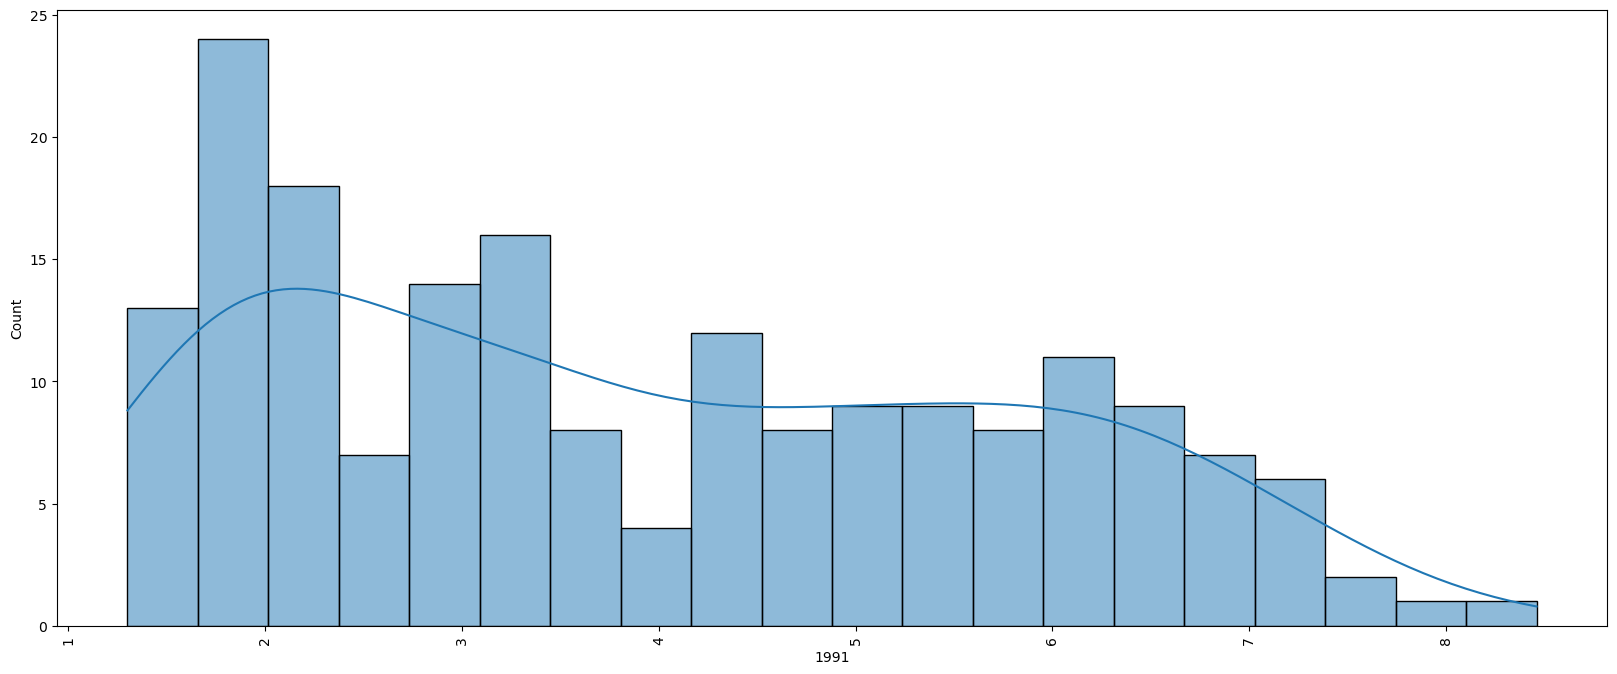

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


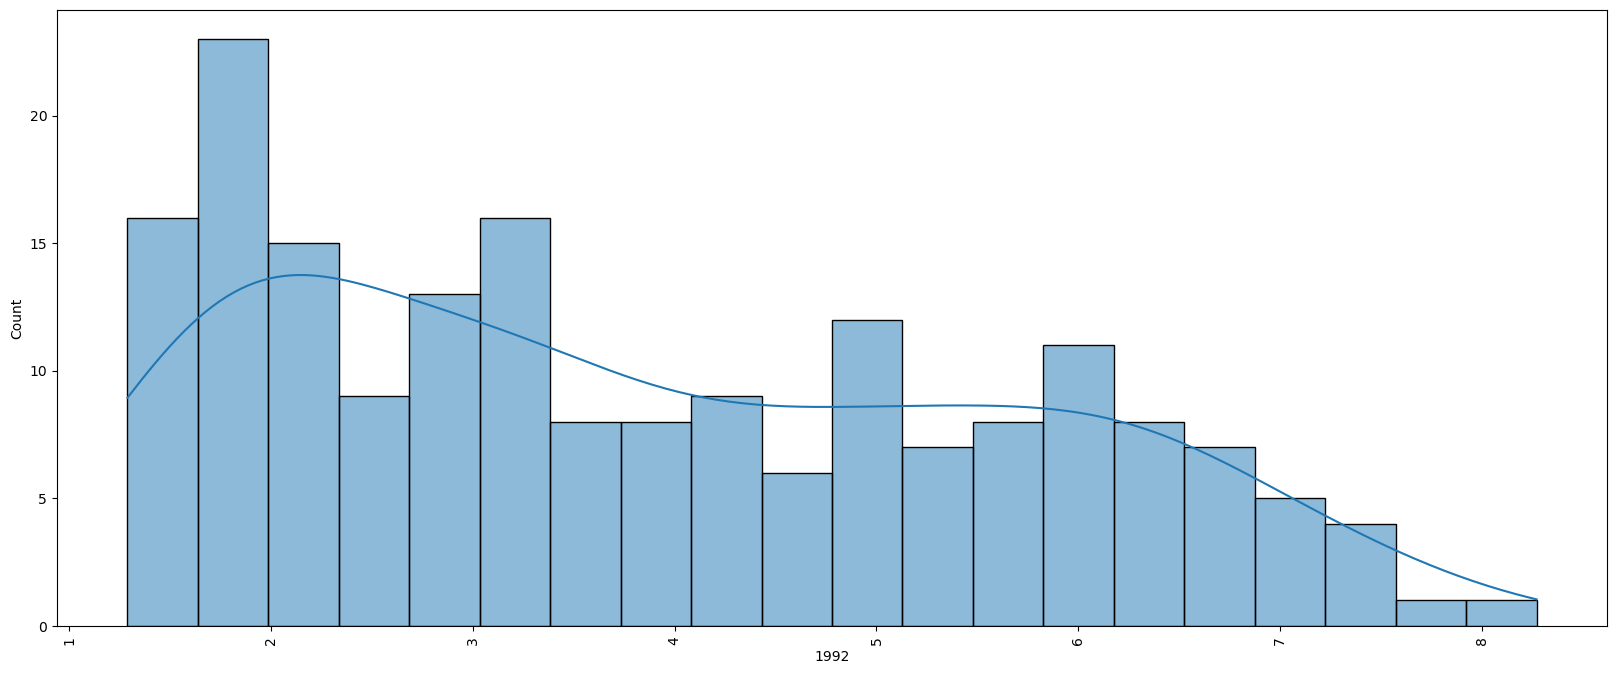

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


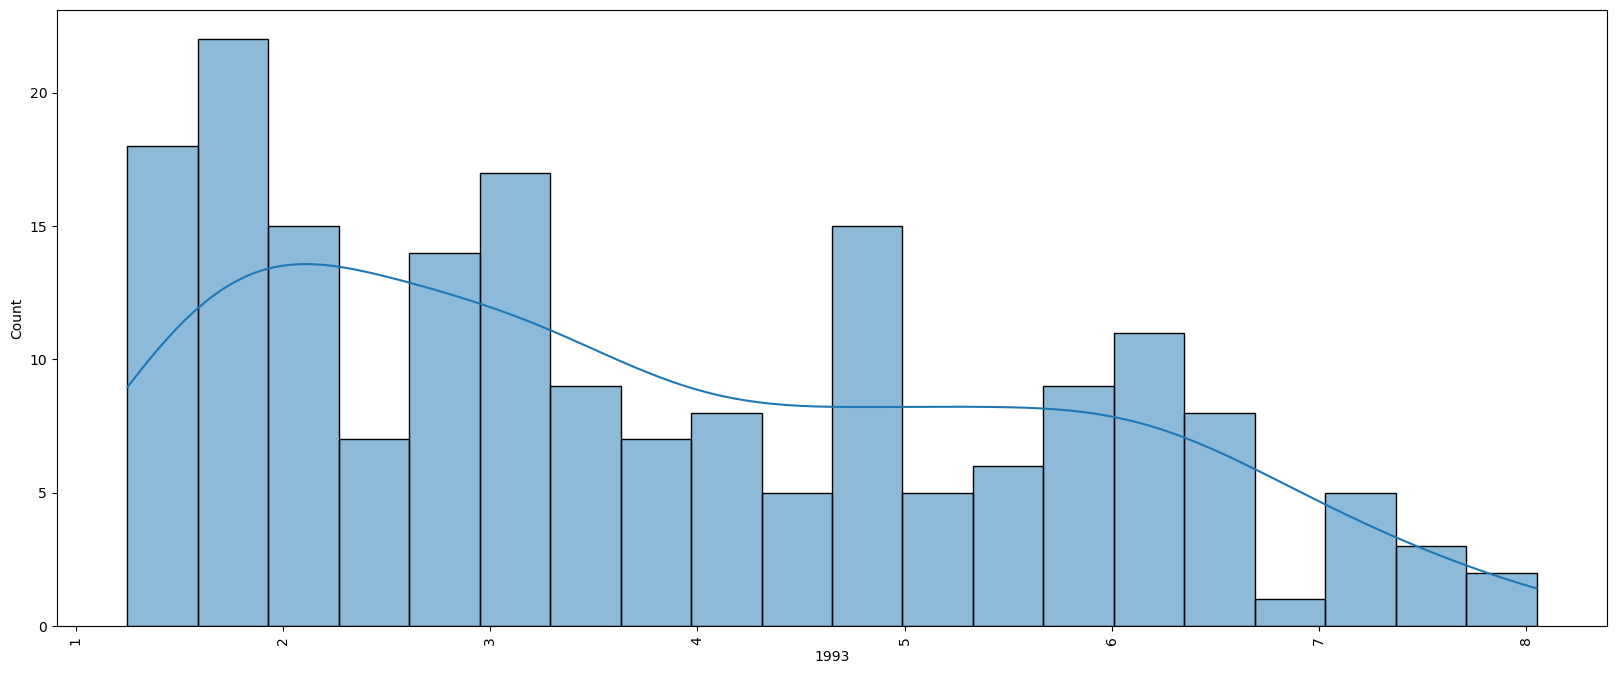

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


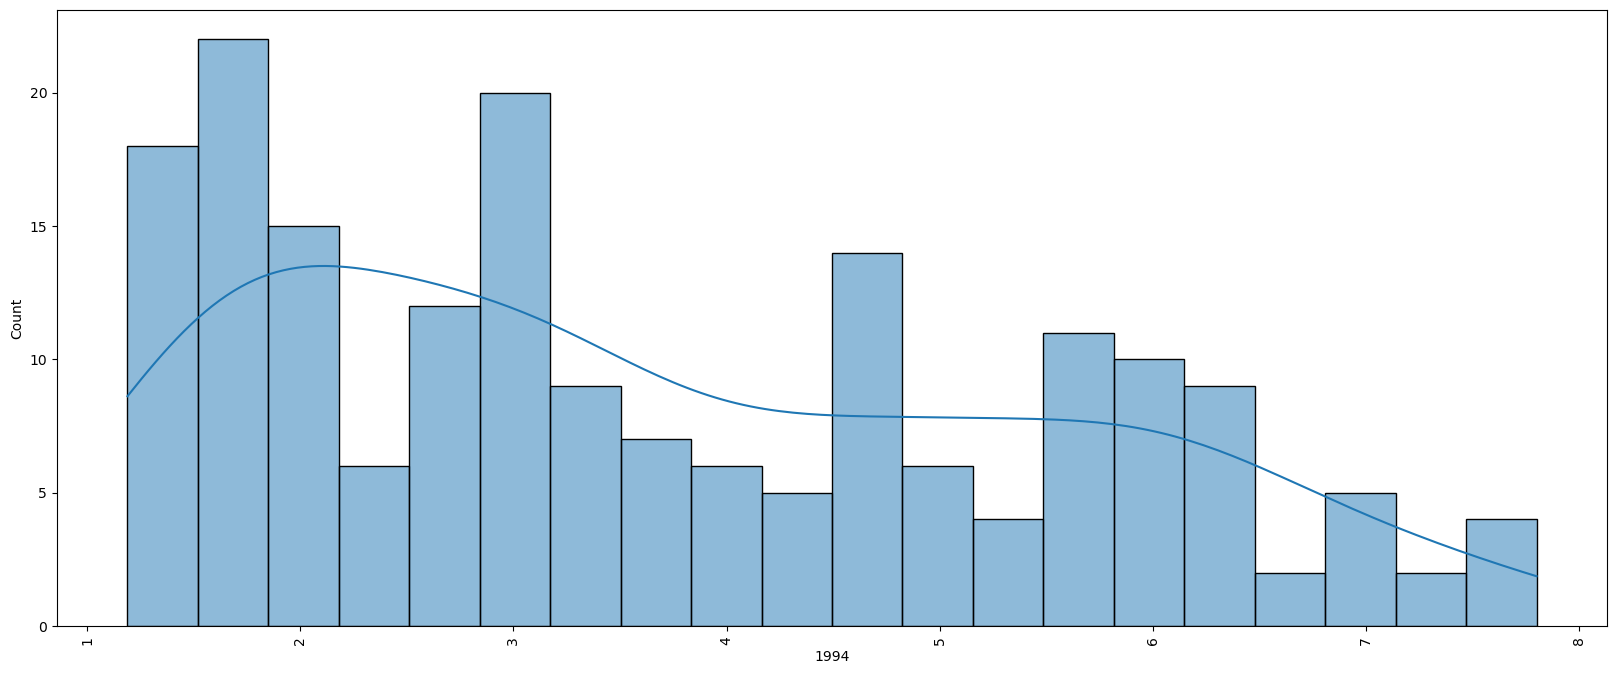

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


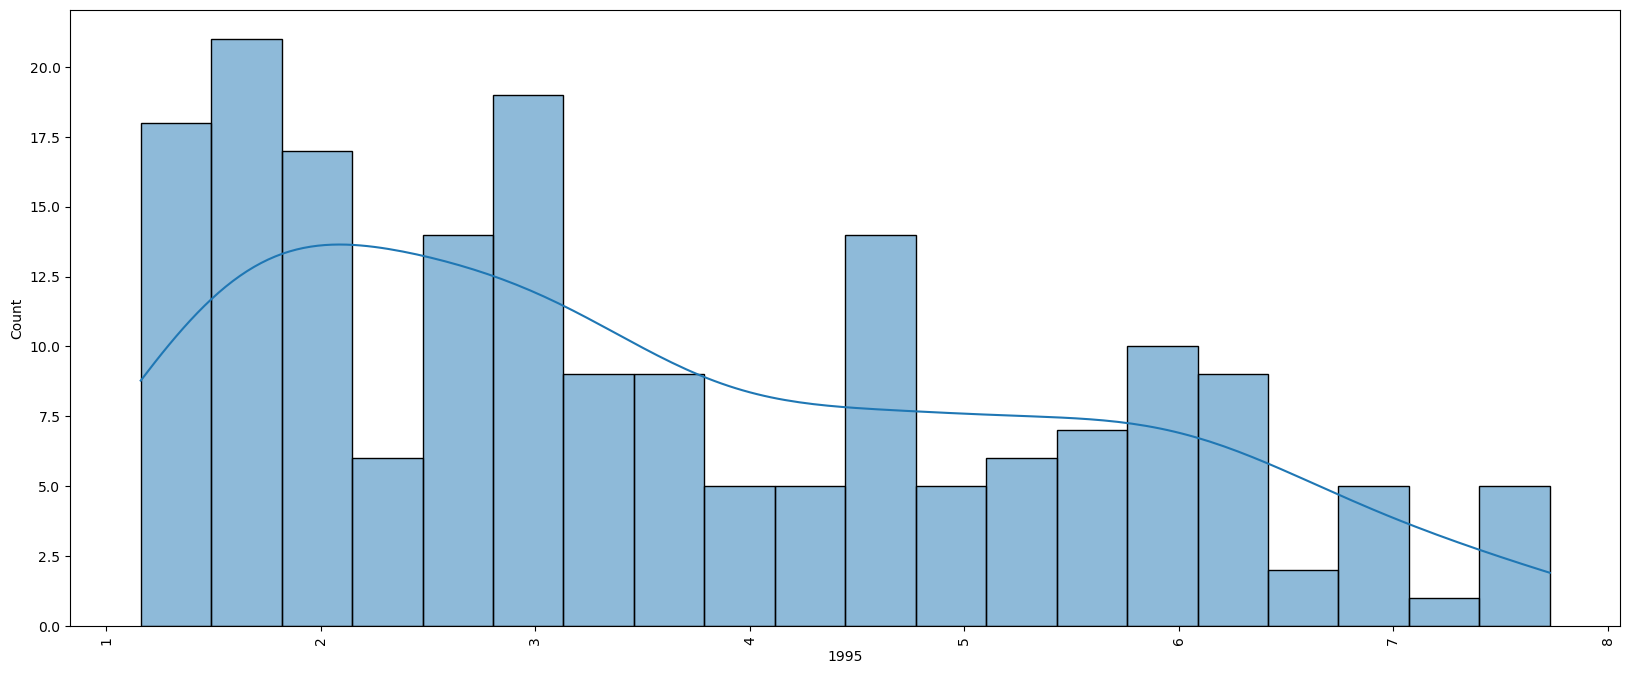

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


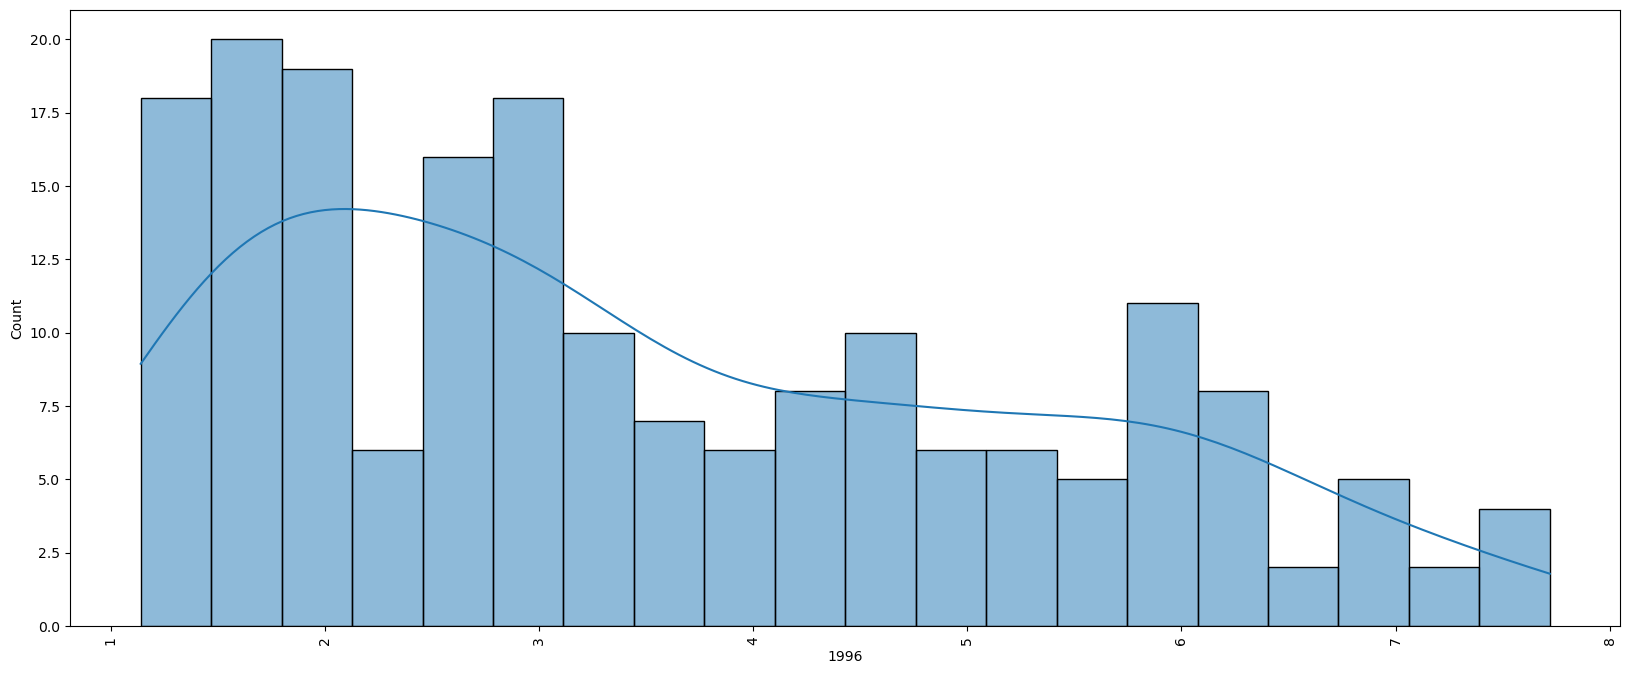

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


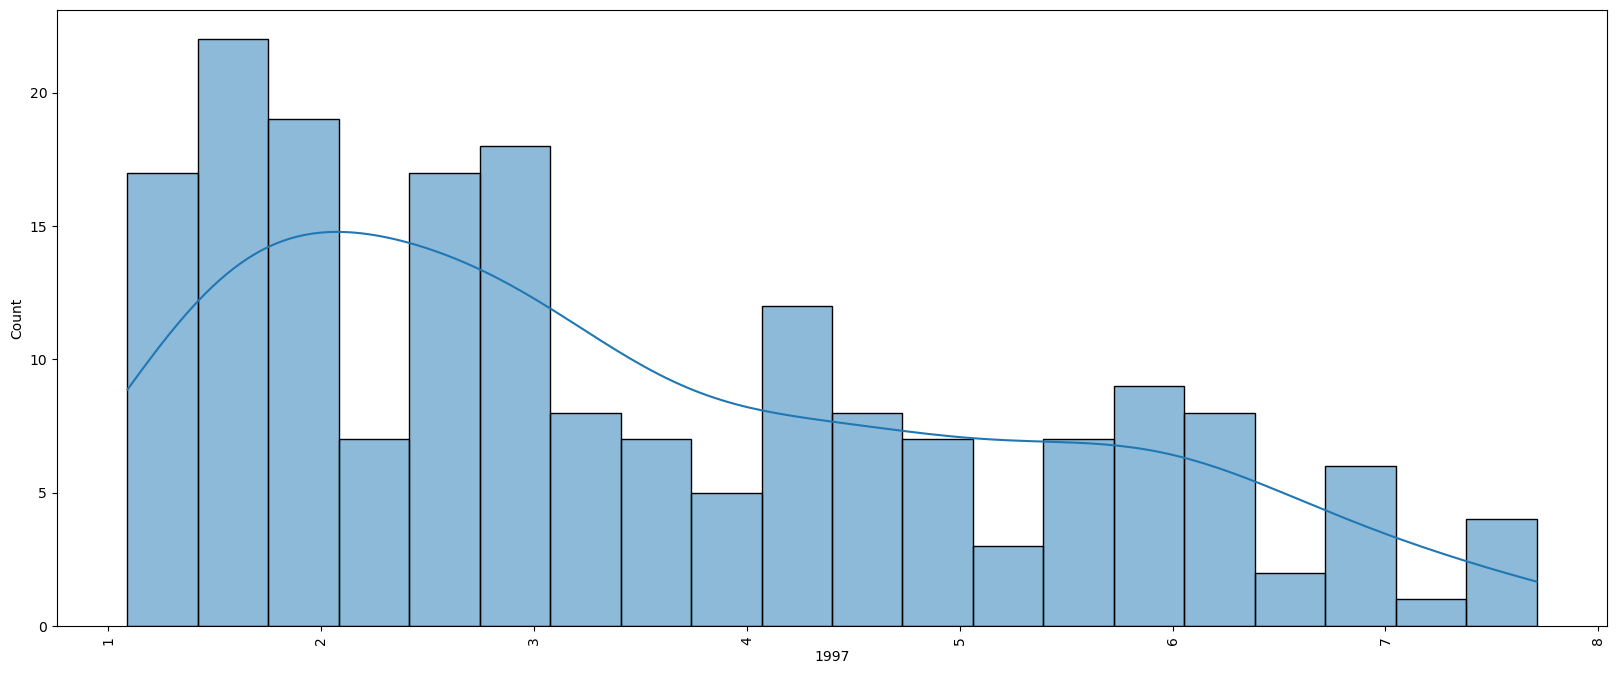

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


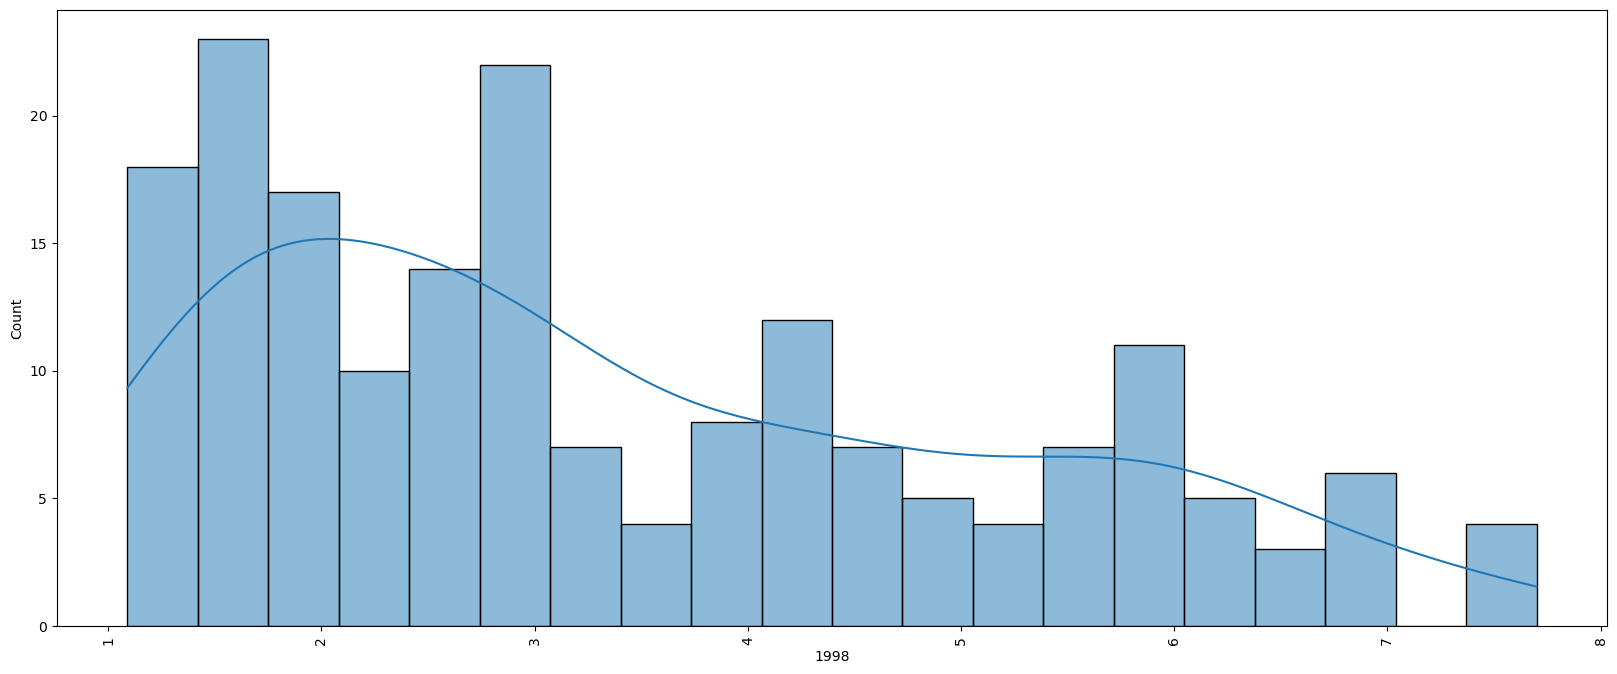

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


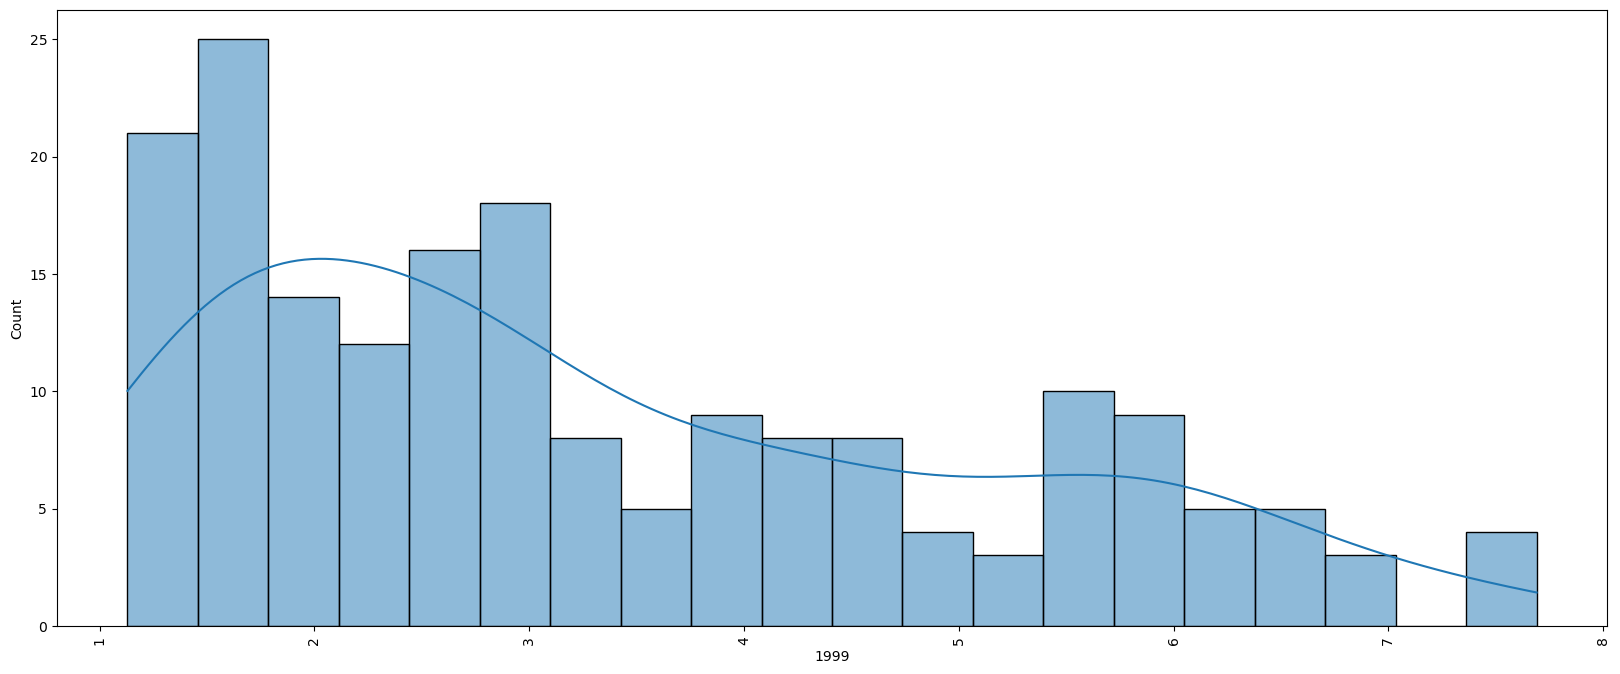

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


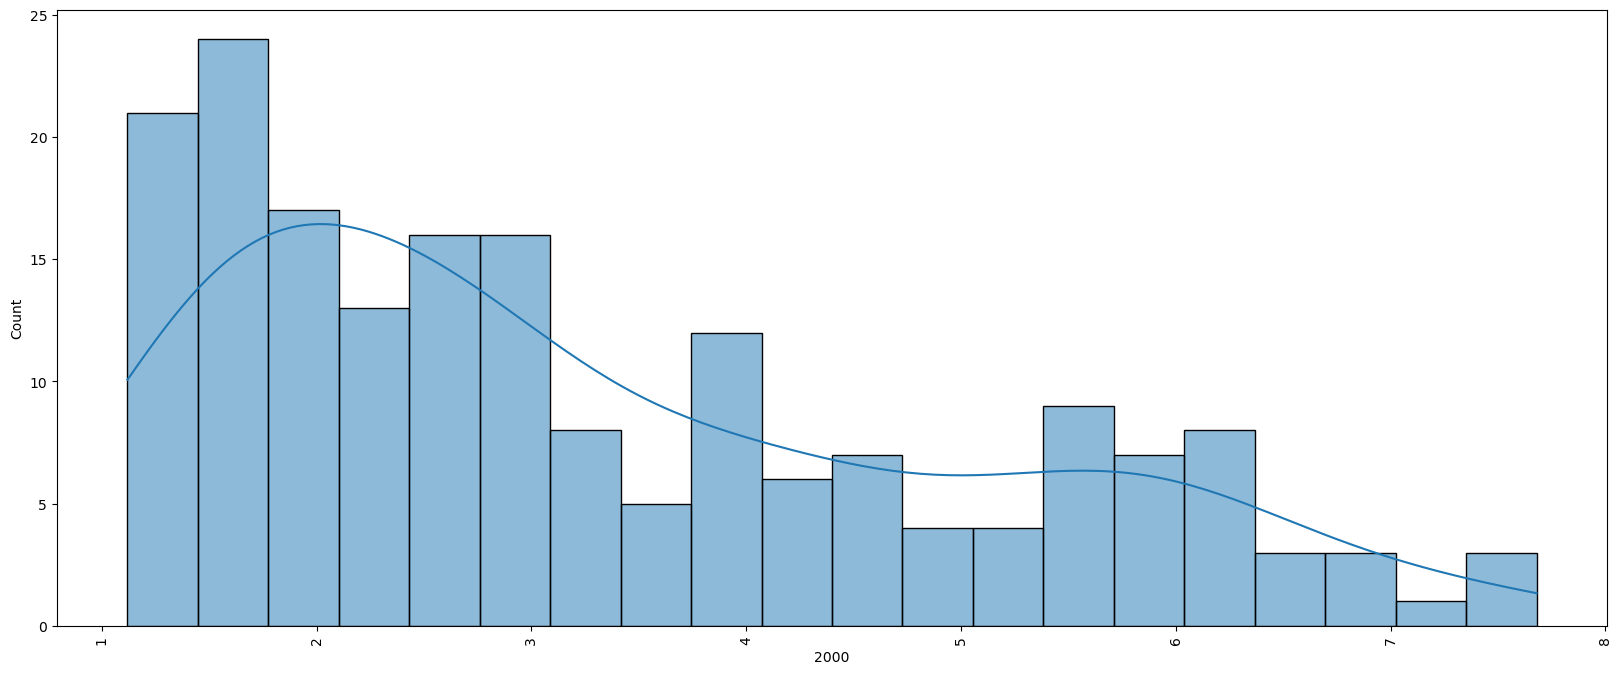

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


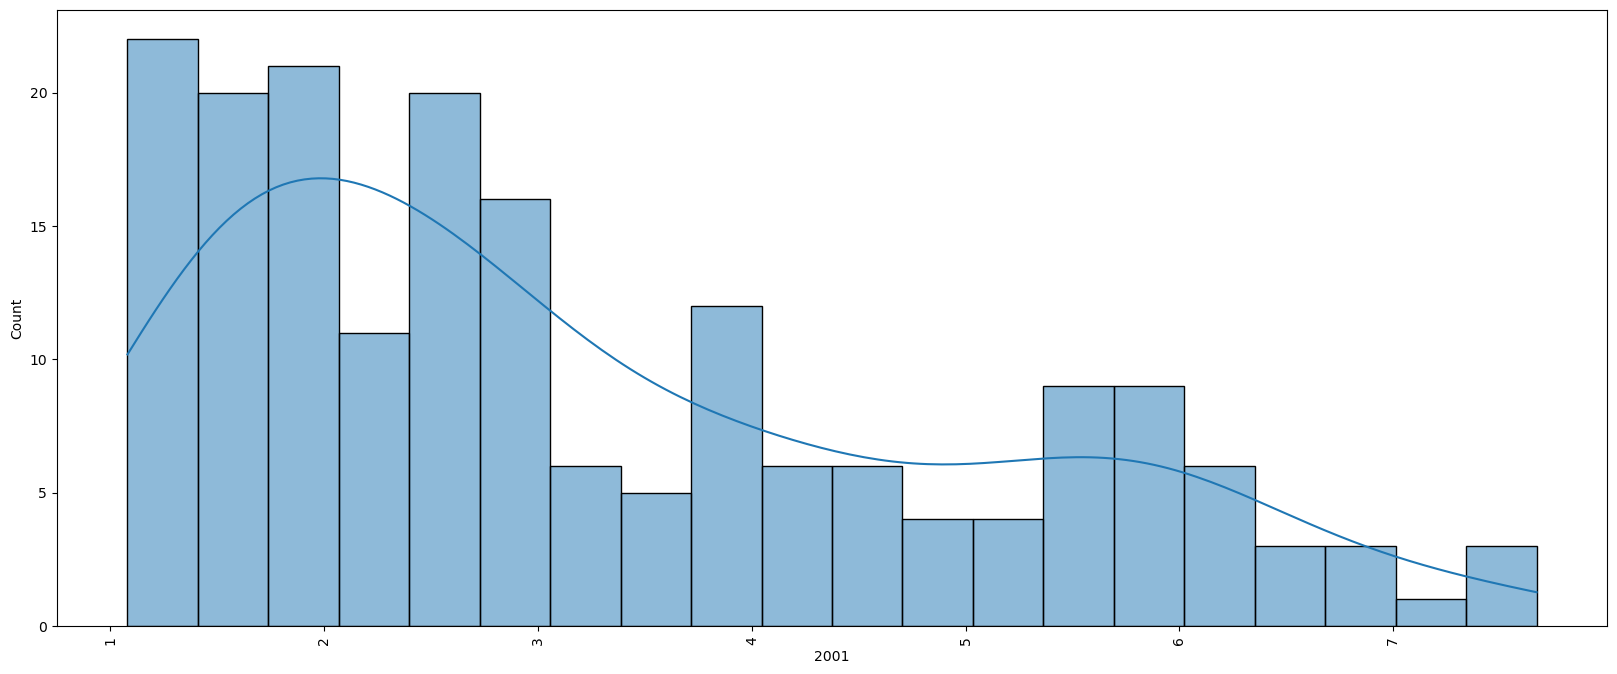

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


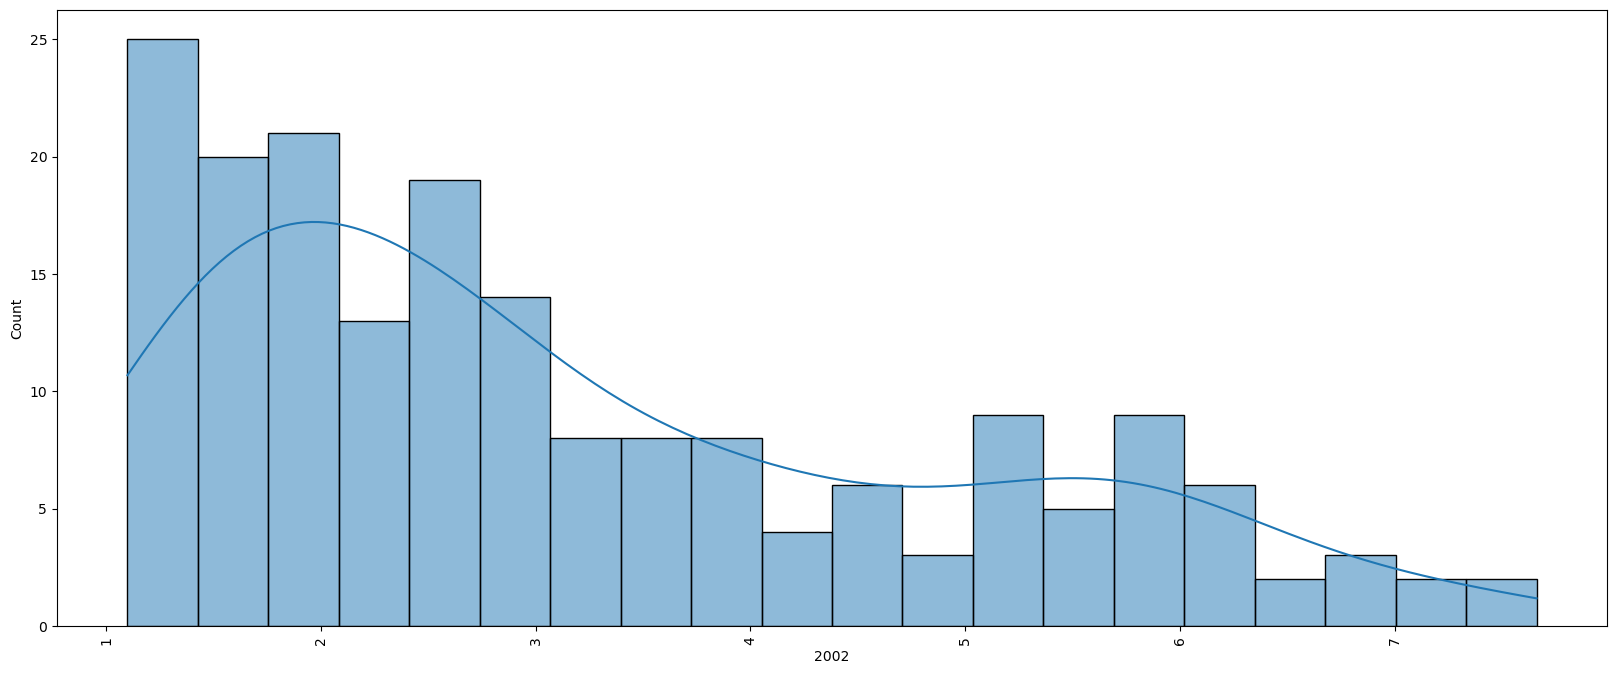

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


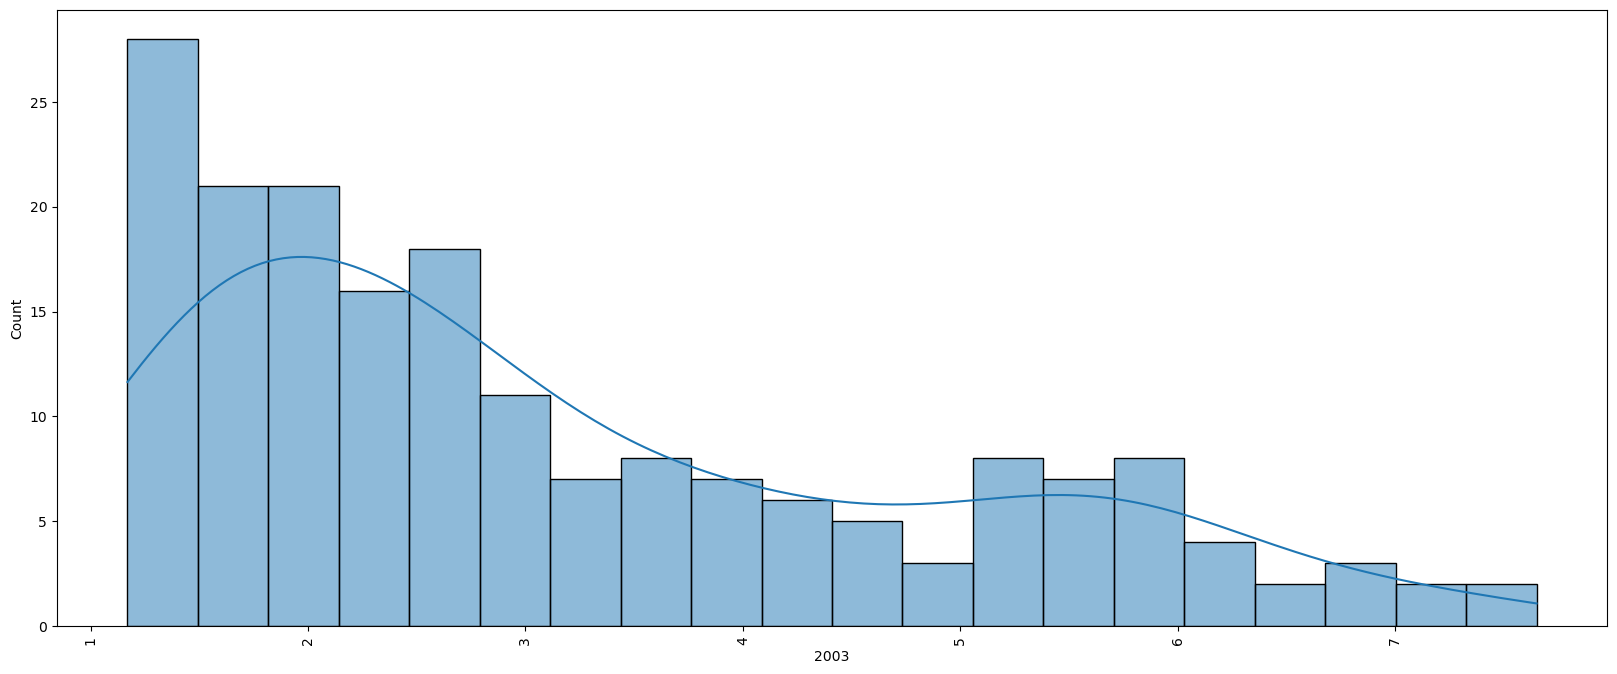

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


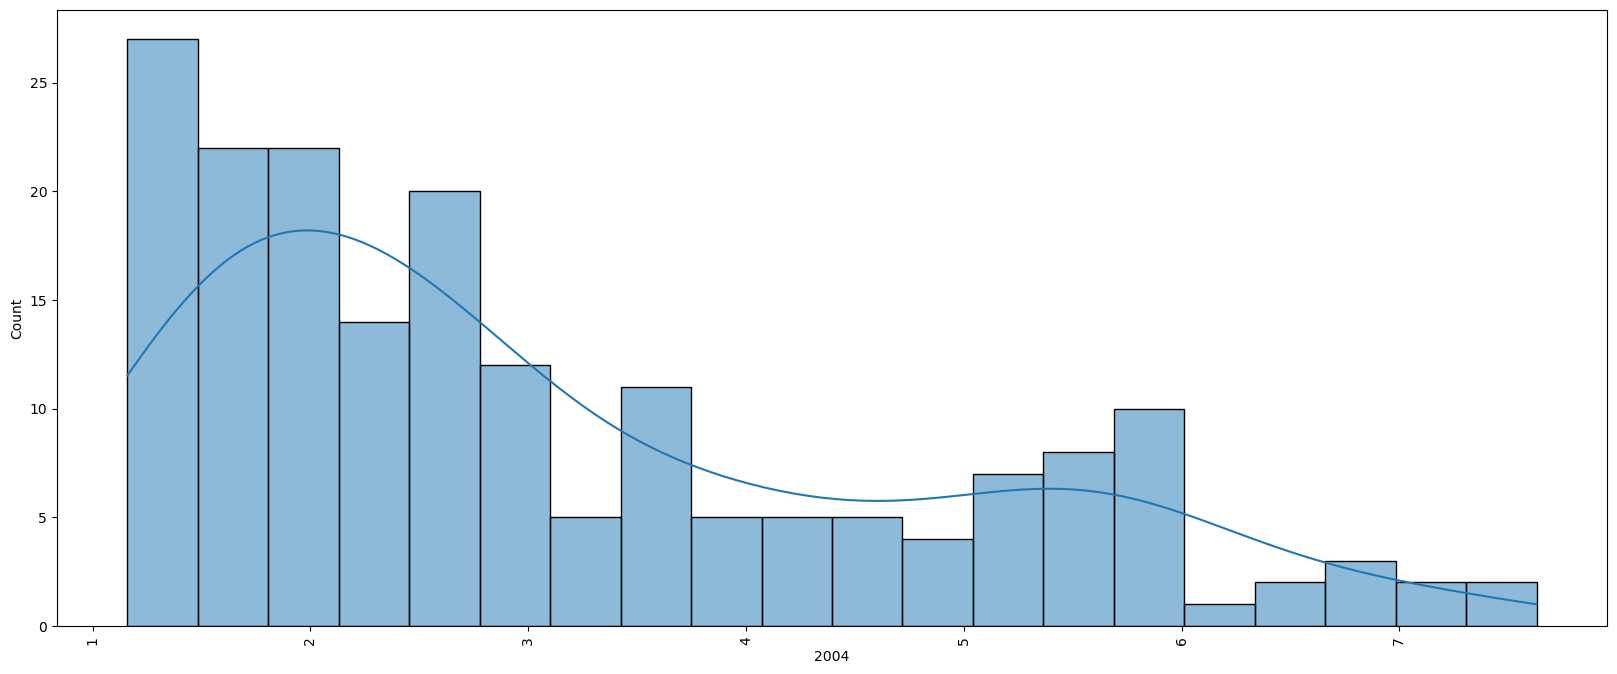

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


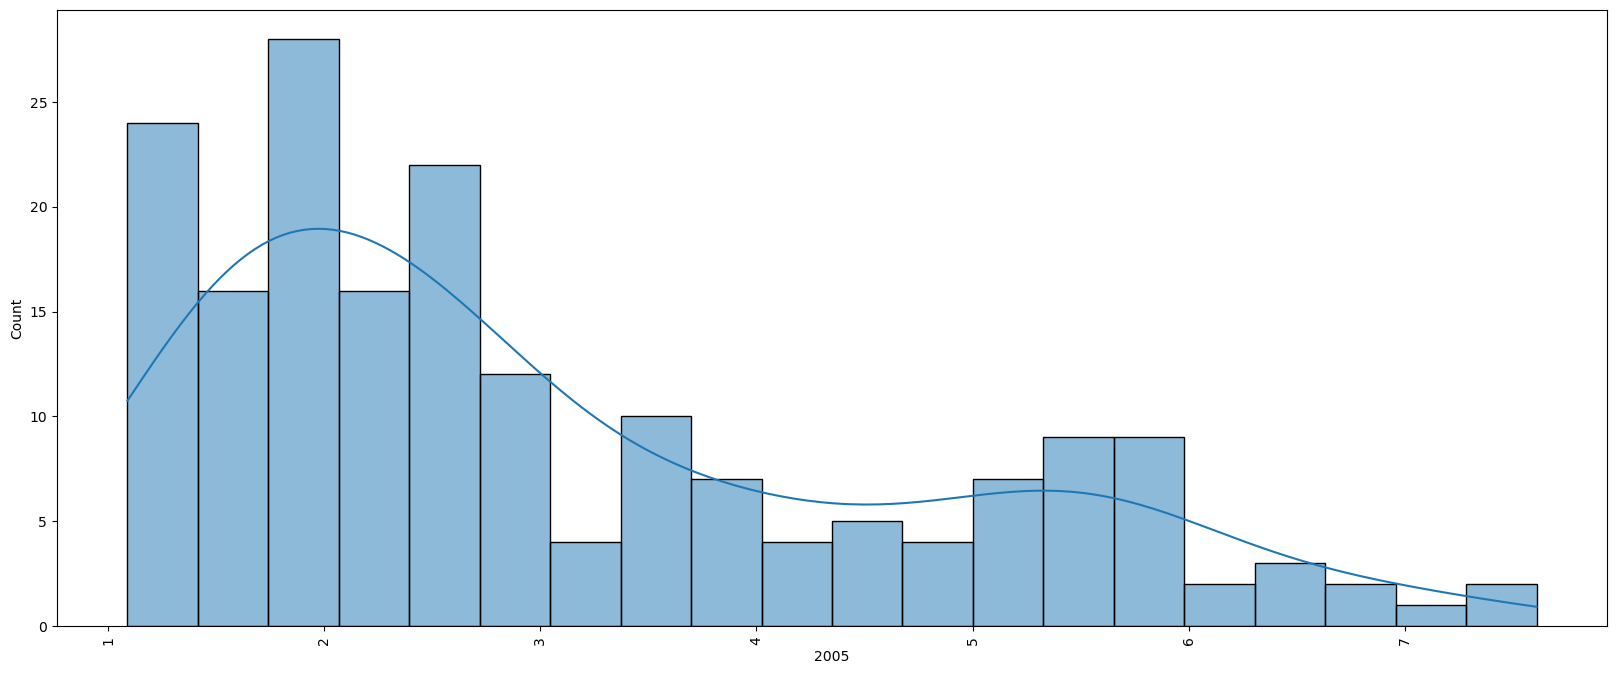

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


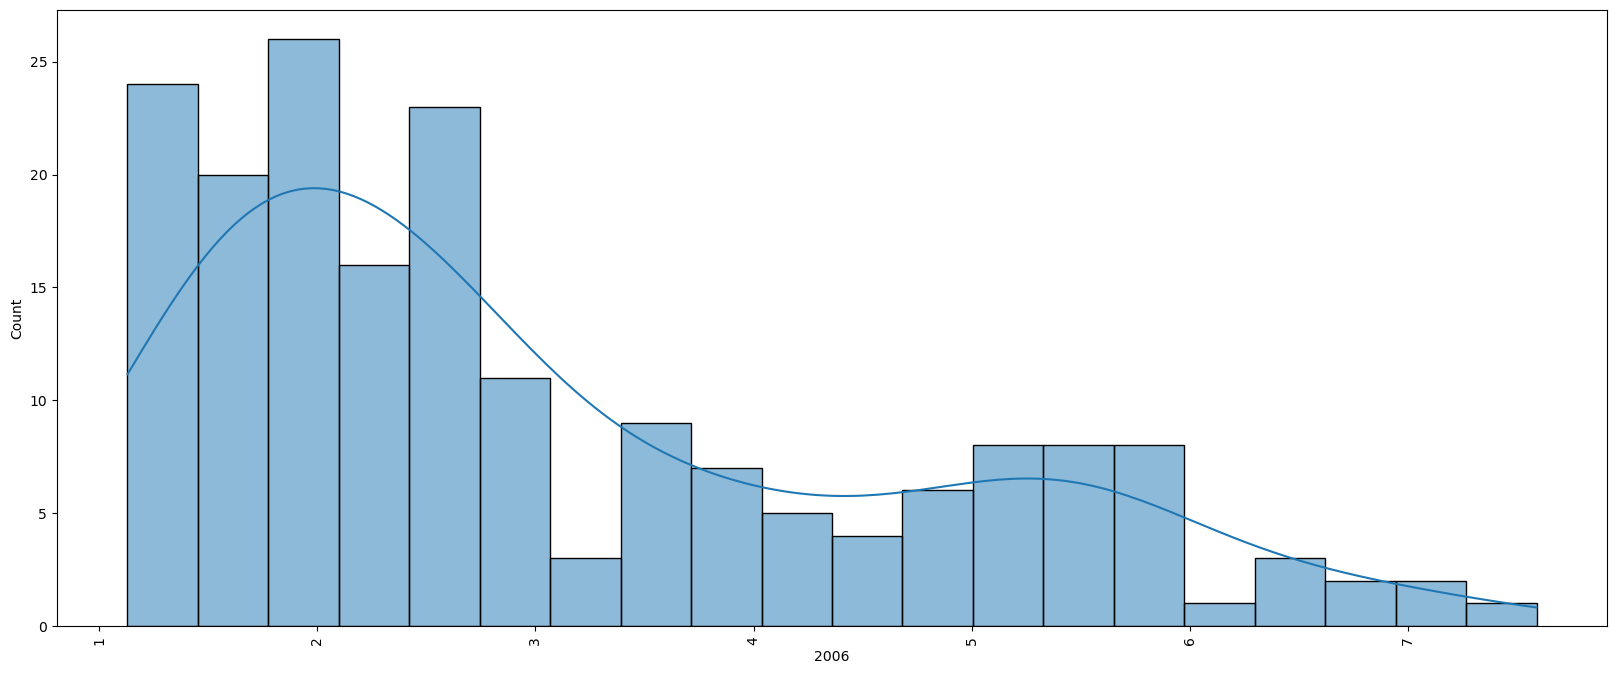

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


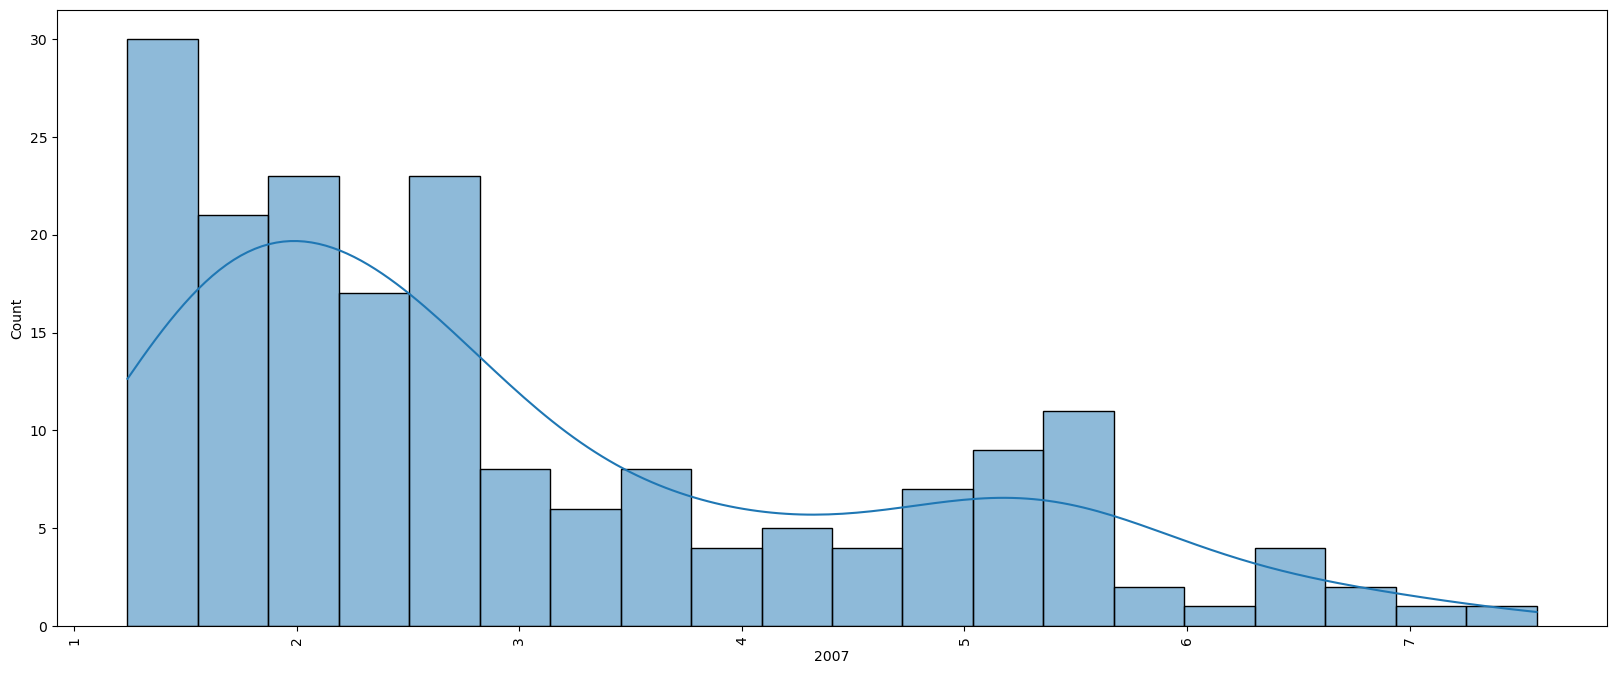

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


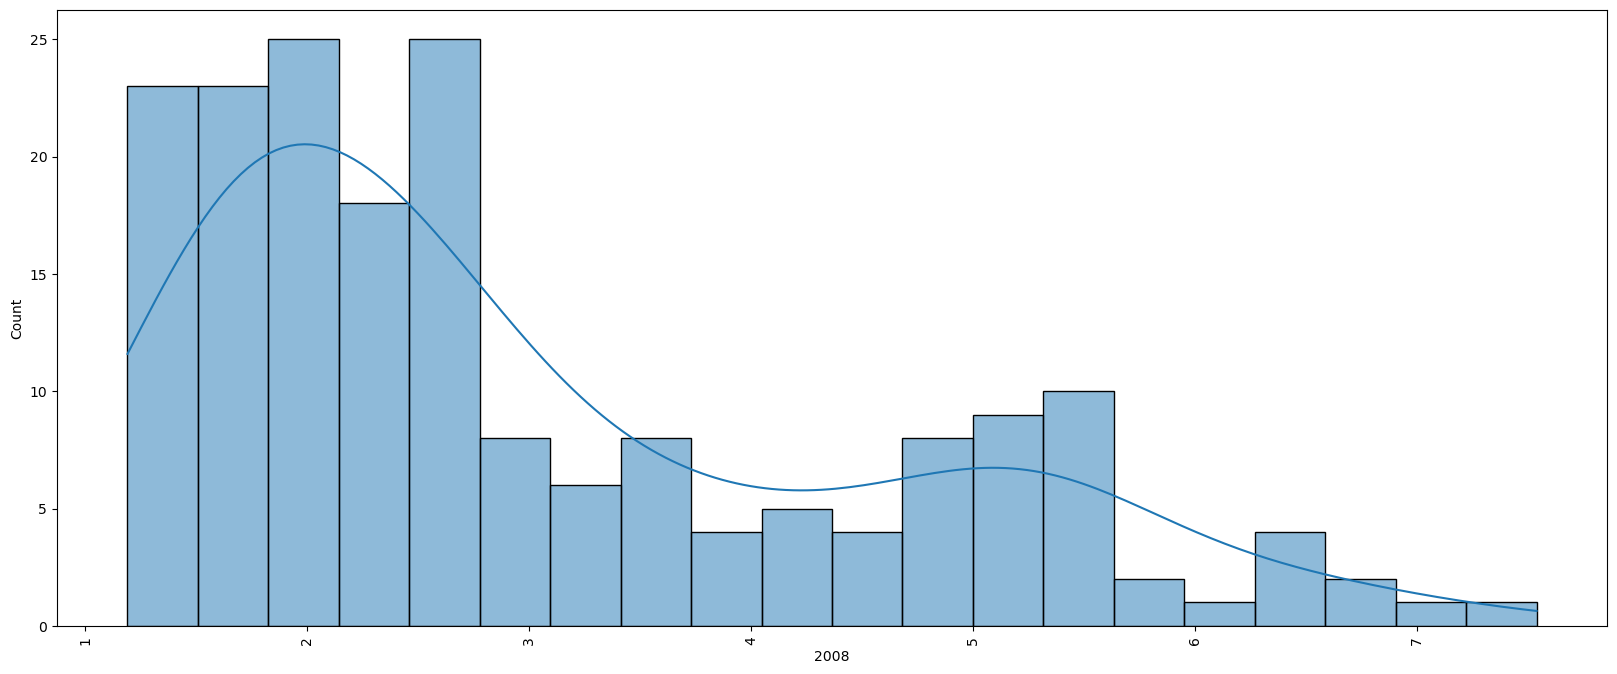

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


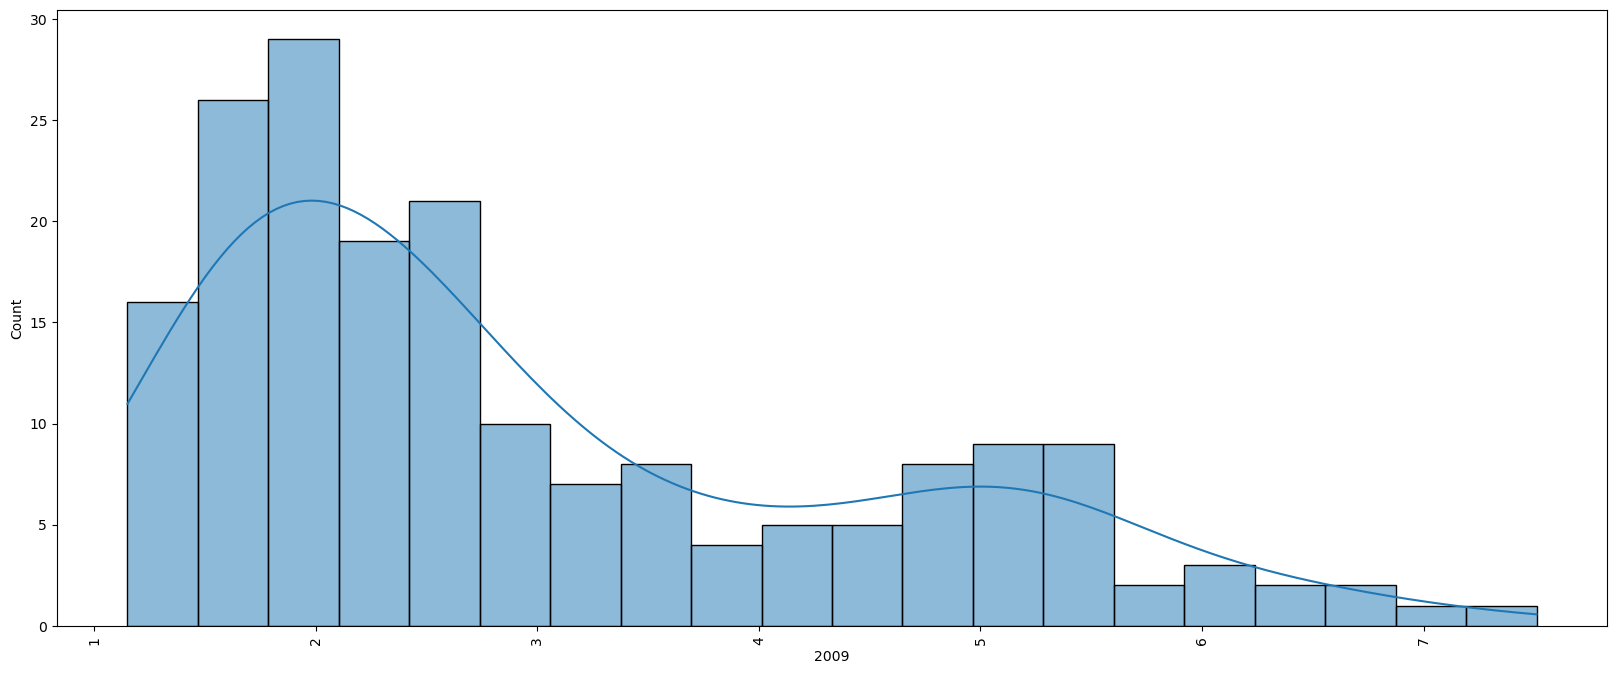

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


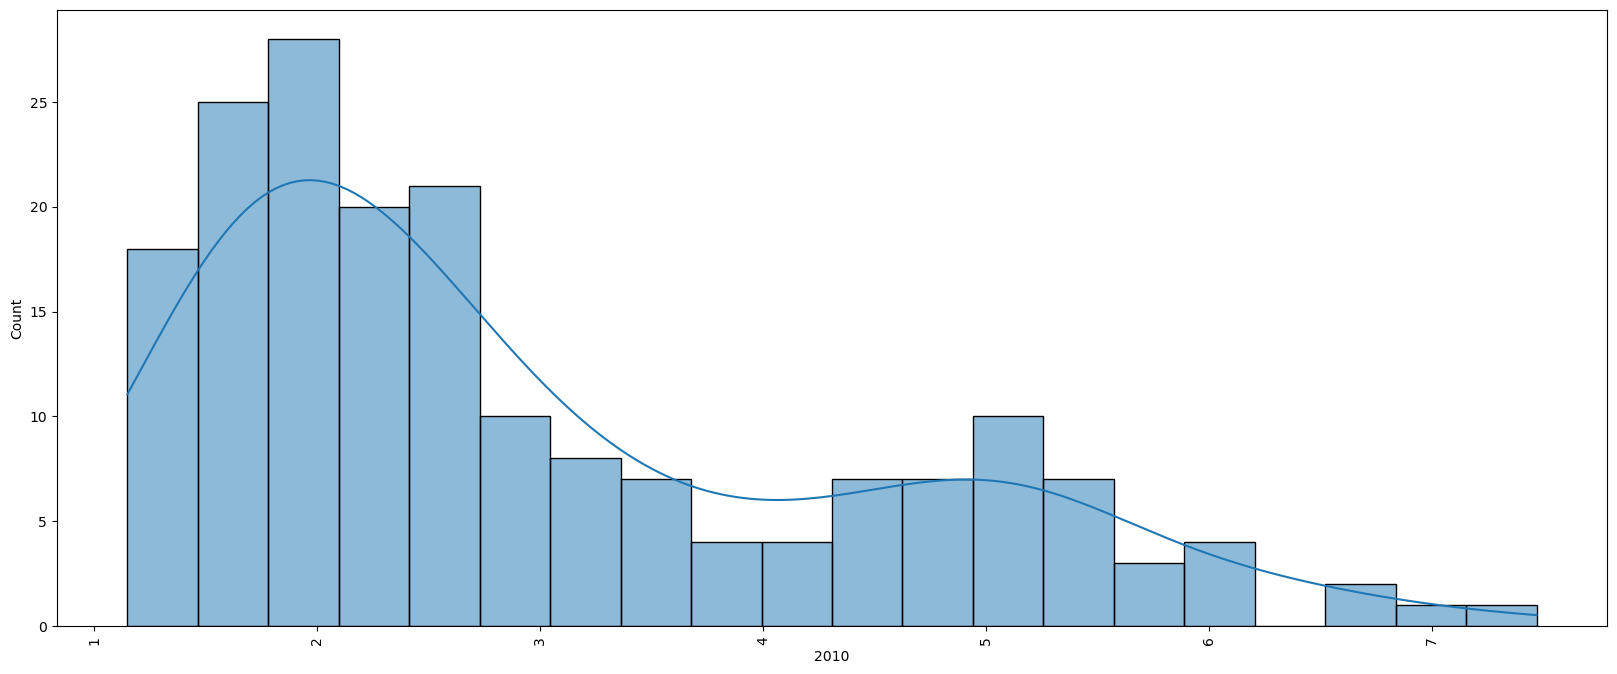

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


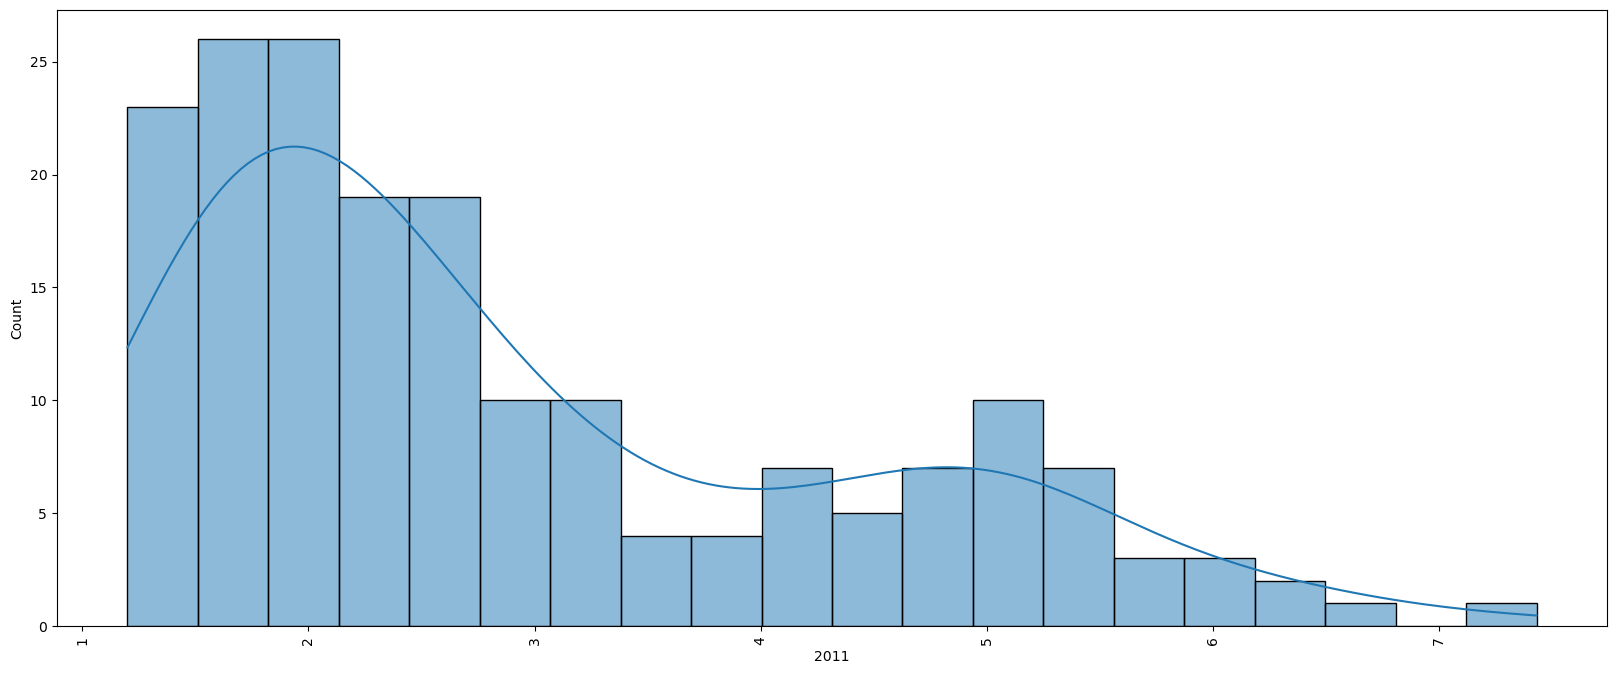

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


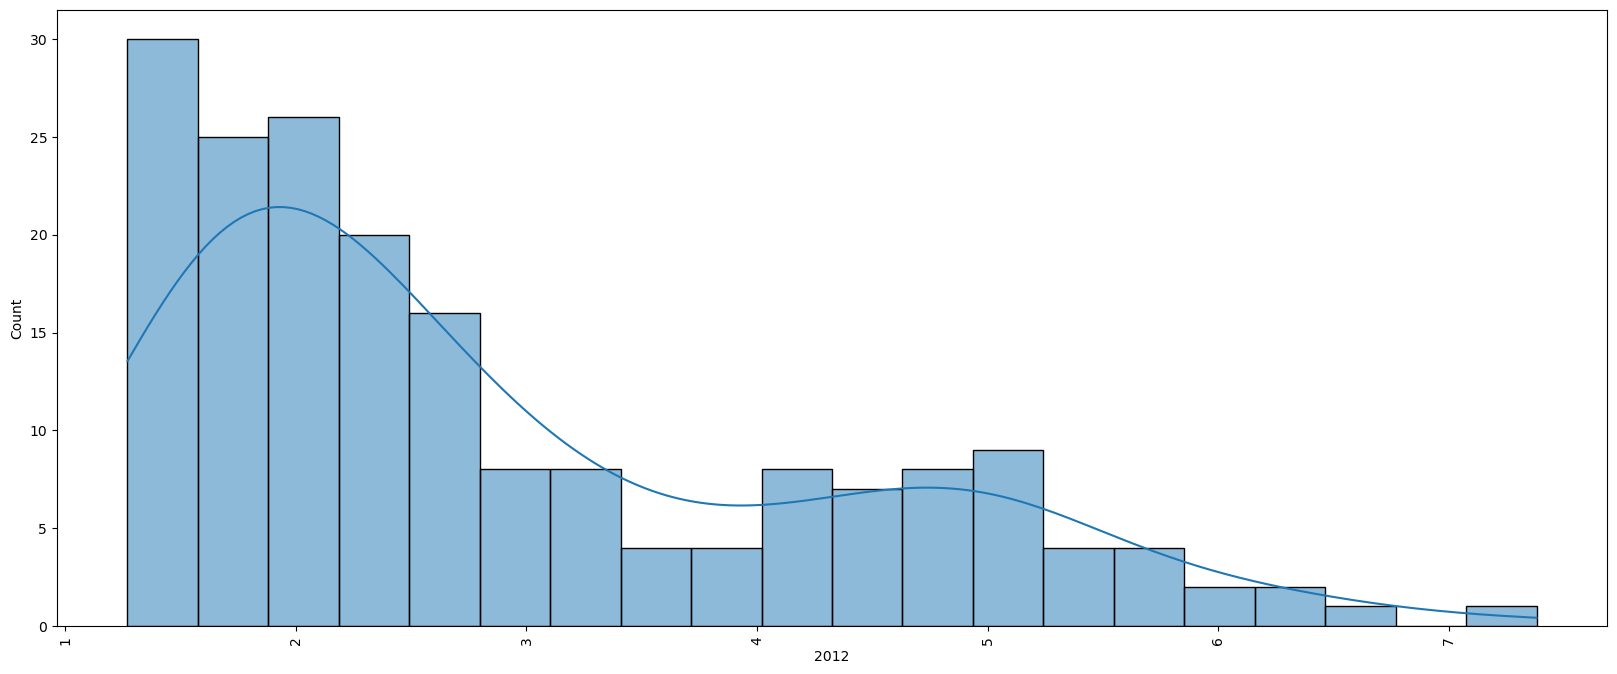

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


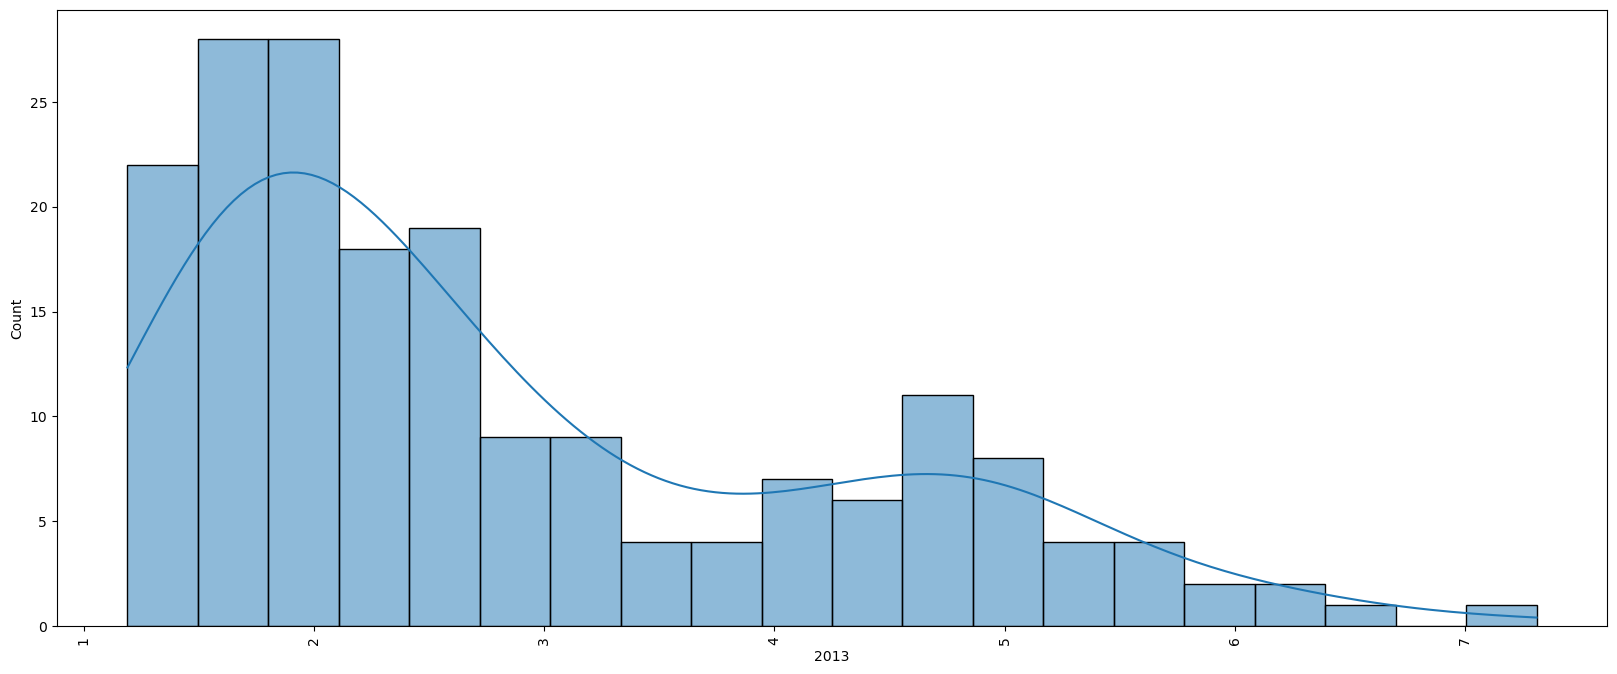

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


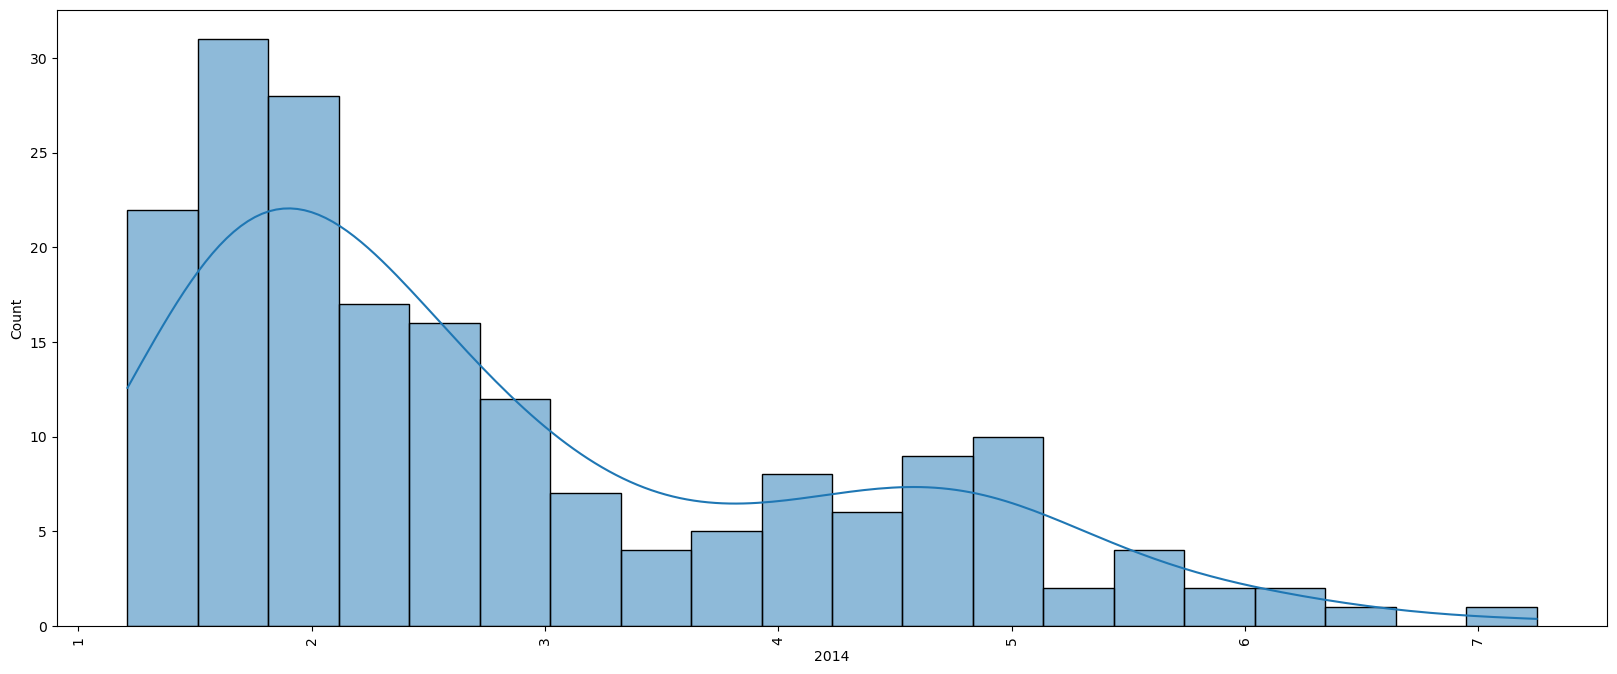

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


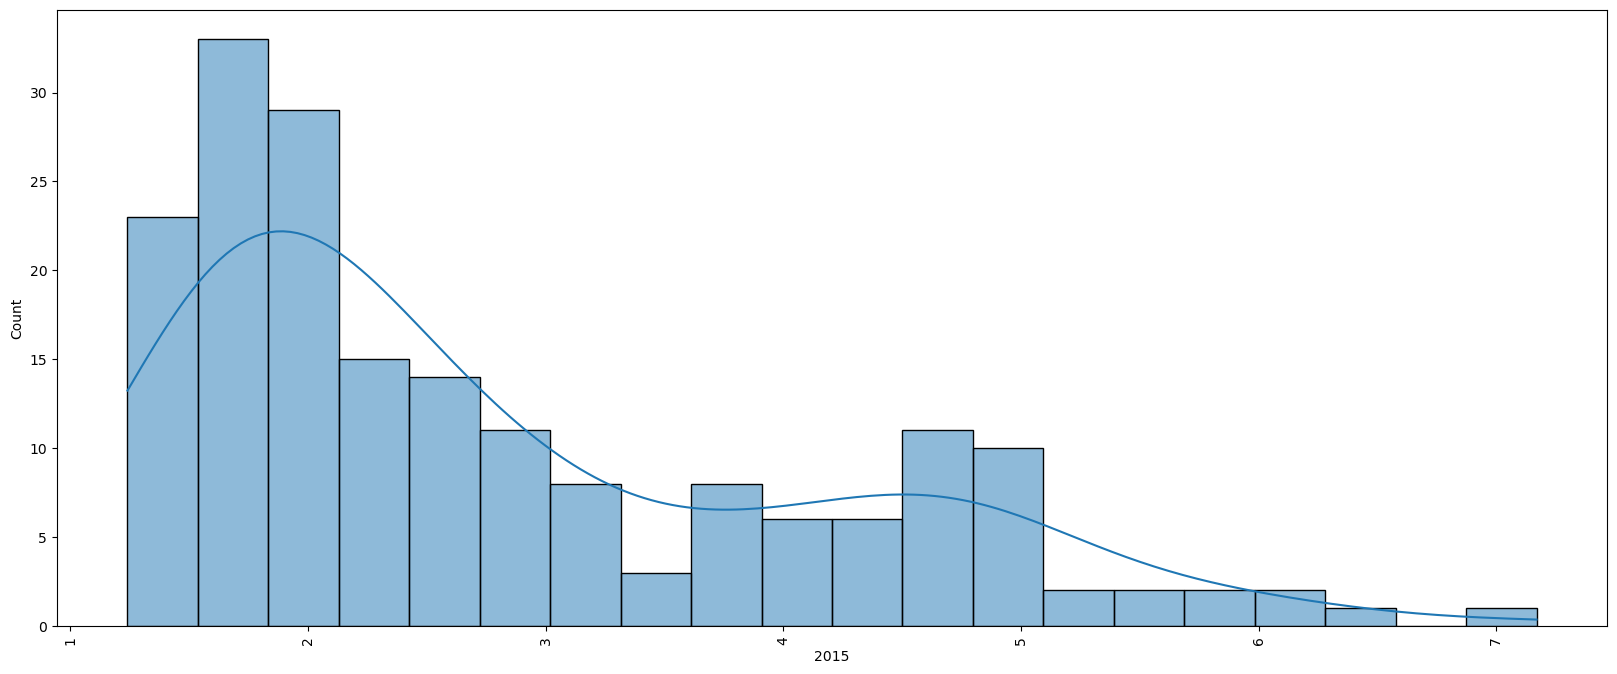

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


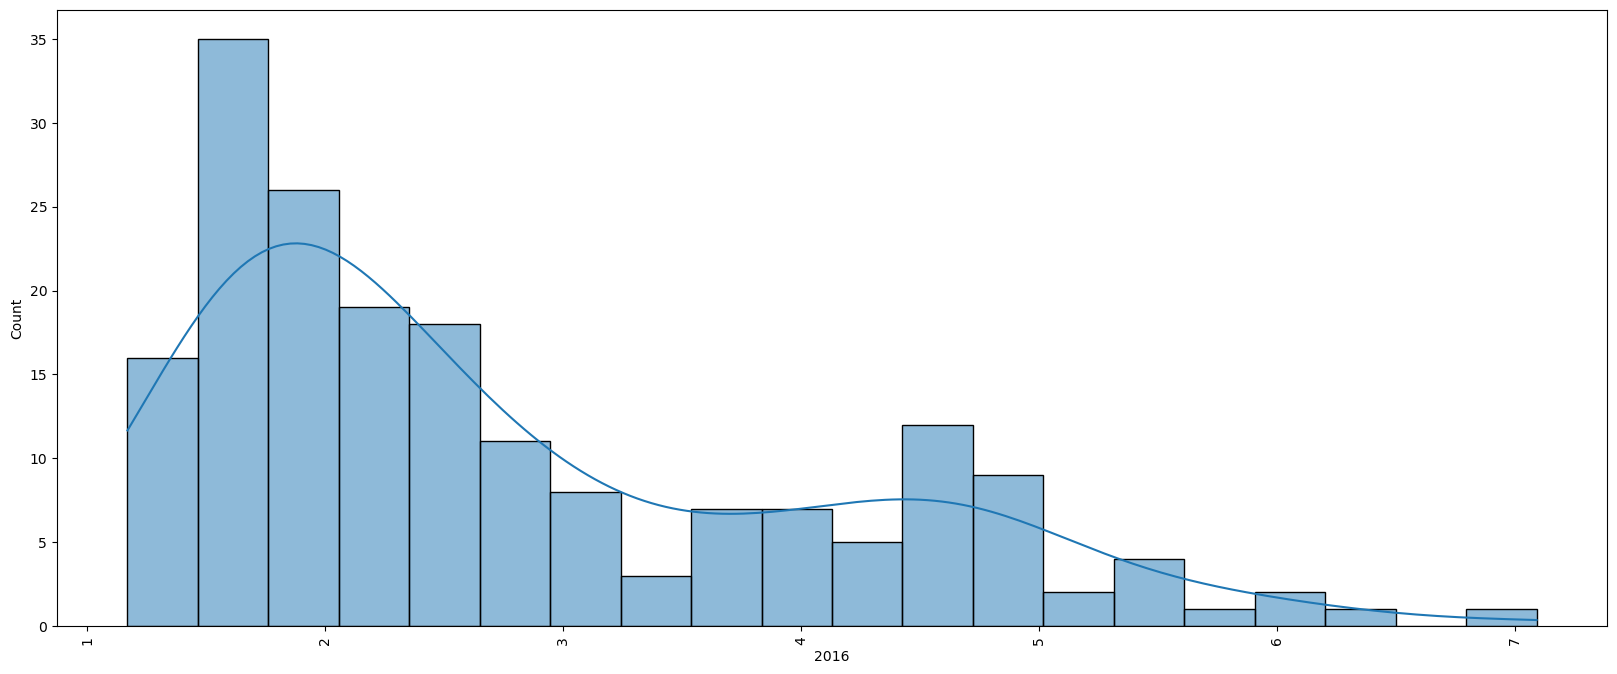

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


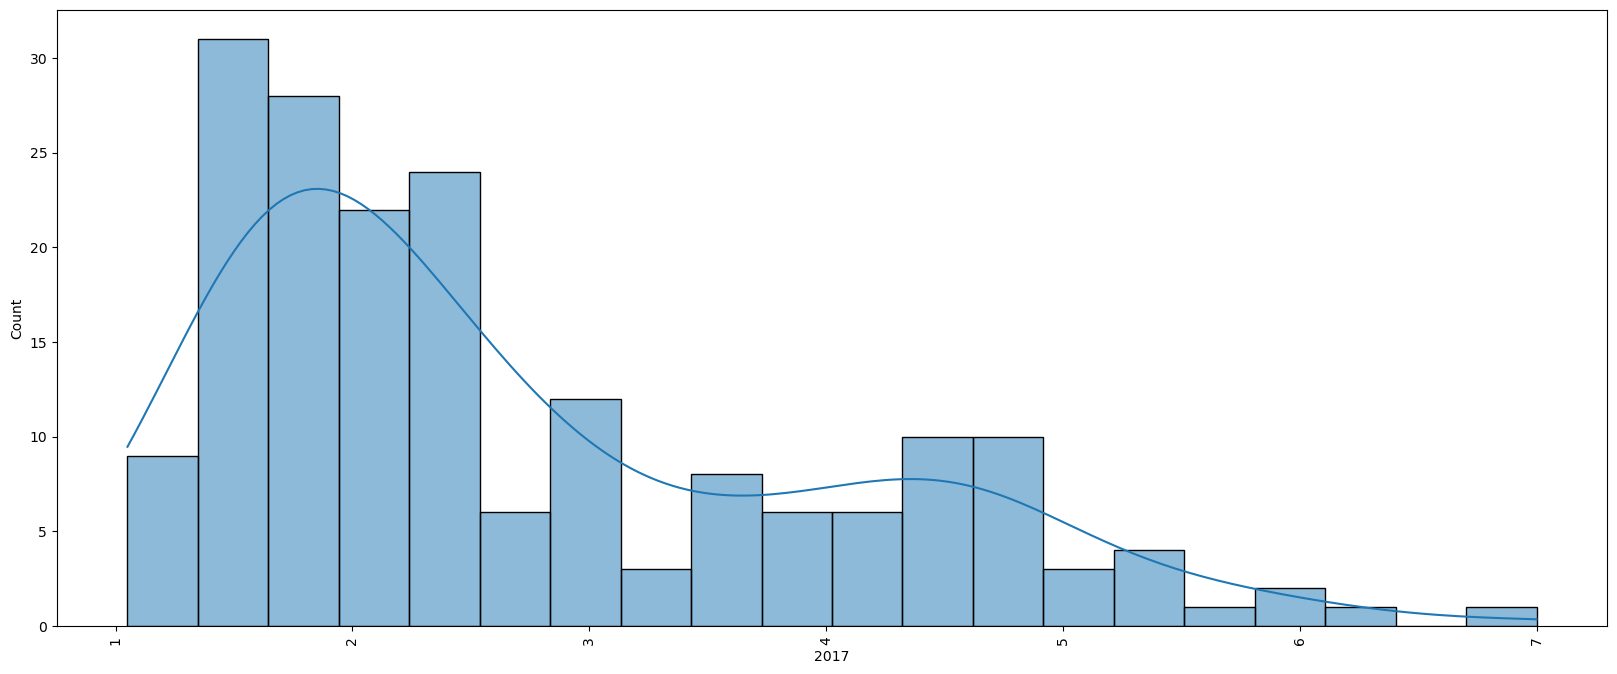

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


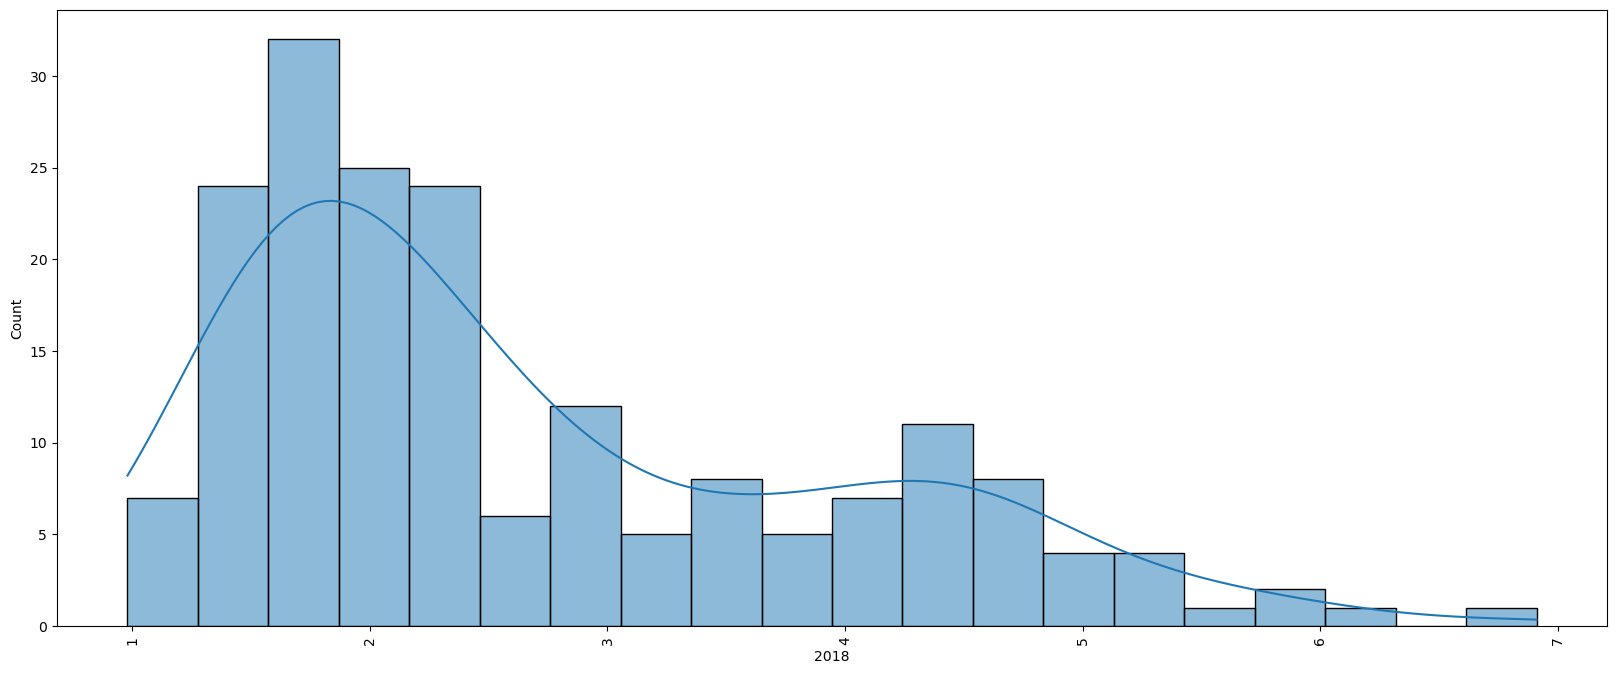

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


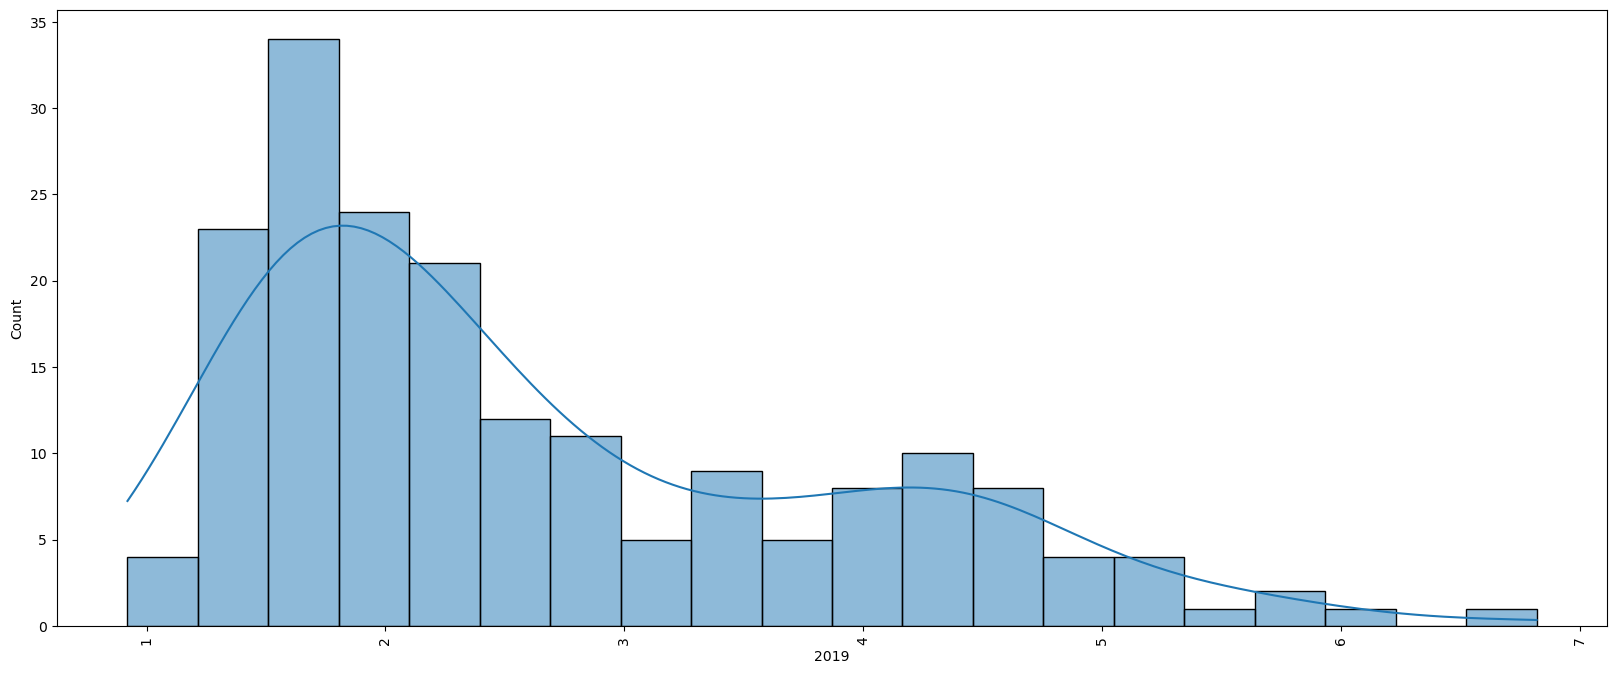

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  This is separate from the ipykernel package so we can avoid doing imports until


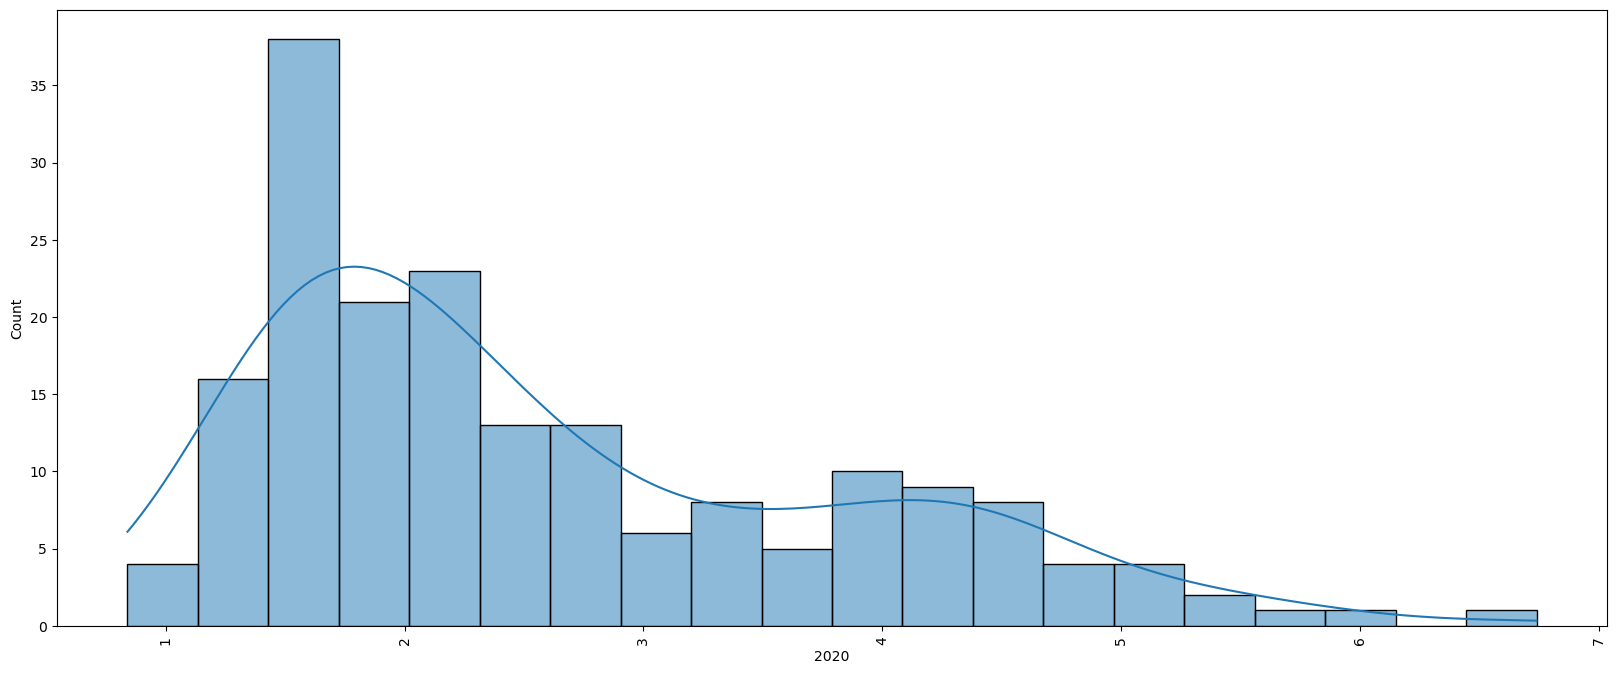

In [10]:
for i in data.columns:
    plt.figure(figsize = (20,8))
    sns.histplot(data[i], bins = 20,kde = True, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

**Transpose of the dataset.**

In [11]:
df = pd.read_csv('/kaggle/input/fertilitycsv/Book1.csv')
df

,Country,_World,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1960,4.98,7.45,6.49,7.52,6.71,4.43,6.98,3.11,4.79,...,2.69,3.65,2.88,6.26,7.20,6.36,6.35,7.94,7.12,7.16
1,1961,5.00,7.45,6.40,7.57,6.79,4.39,7.00,3.10,4.67,...,2.78,3.62,2.89,6.36,7.12,6.30,6.39,7.96,7.17,7.22
2,1962,5.03,7.45,6.28,7.61,6.87,4.34,7.02,3.09,4.52,...,2.86,3.46,2.88,6.44,7.03,6.23,6.43,7.99,7.21,7.27
3,1963,5.05,7.45,6.13,7.65,6.95,4.30,7.04,3.08,4.35,...,2.88,3.32,2.87,6.49,6.94,6.16,6.45,8.03,7.25,7.31
4,1964,5.06,7.45,5.96,7.67,7.04,4.25,7.05,3.07,4.15,...,2.93,3.19,2.86,6.52,6.84,6.07,6.46,8.07,7.27,7.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016,2.44,4.80,1.66,3.05,5.69,2.00,3.32,2.29,1.74,...,1.79,1.82,1.99,2.46,3.86,2.32,2.03,3.99,4.81,3.80
57,2017,2.43,4.63,1.64,3.05,5.60,2.00,3.28,2.28,1.75,...,1.74,1.77,1.98,2.42,3.82,2.29,2.04,3.89,4.72,3.71
58,2018,2.41,4.47,1.62,3.02,5.52,1.99,3.23,2.26,1.76,...,1.68,1.73,1.97,2.60,3.78,2.27,2.05,3.79,4.63,3.62
59,2019,2.40,4.32,1.60,2.99,5.44,1.99,3.19,2.25,1.76,...,1.63,1.71,1.96,2.79,3.74,2.25,2.05,3.70,4.56,3.53


In [12]:
df.columns

Index(['Country', '_World', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=188)

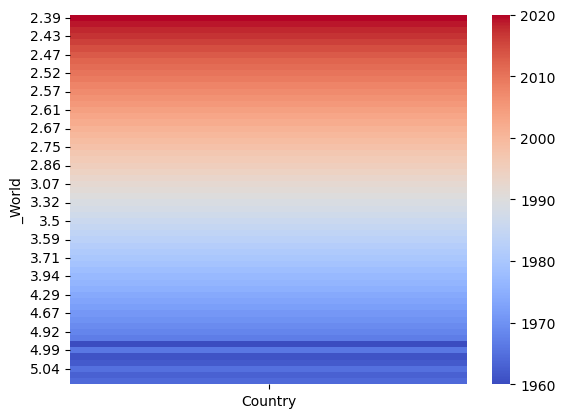

In [13]:
# Pivot the data to create a heatmap
heatmap_data = pd.pivot_table(df, values='Country', index=['_World'])

# Plot the heatmap
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.show()

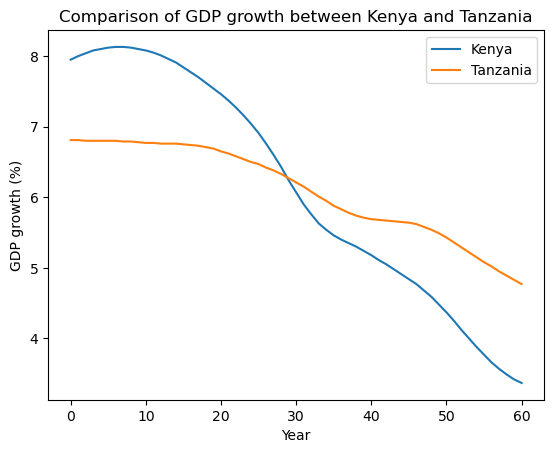

In [14]:
# select only the columns for Kenya and Tanzania
df = df[['Kenya', 'Tanzania']]

# plot the data as a line plot
df.plot.line()
plt.title('Comparison of GDP growth between Kenya and Tanzania')
plt.xlabel('Year')
plt.ylabel('GDP growth (%)')
plt.show()

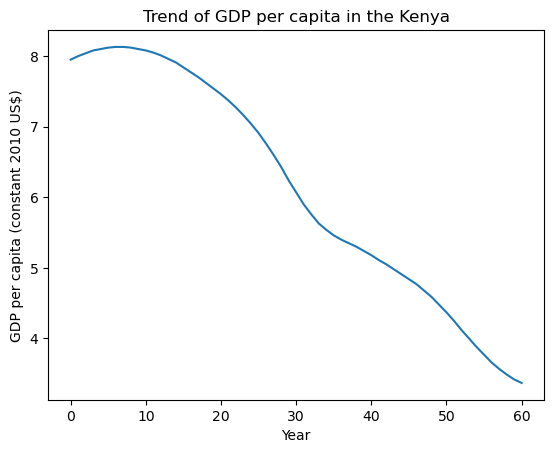

In [15]:

# Extract the data for the United States
Kenya_data = df['Kenya']

# Plot the trend
plt.plot(Kenya_data)
plt.title('Trend of GDP per capita in the Kenya')
plt.xlabel('Year')
plt.ylabel('GDP per capita (constant 2010 US$)')
plt.show()

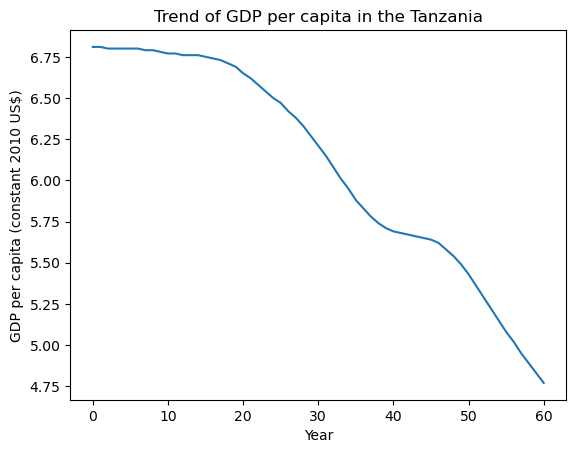

In [16]:

# Extract the data for the United States
us_data = df['Tanzania']

# Plot the trend
plt.plot(us_data)
plt.title('Trend of GDP per capita in the Tanzania')
plt.xlabel('Year')
plt.ylabel('GDP per capita (constant 2010 US$)')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Kenya   No. Observations:                   61
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 177.155
Date:                Sat, 01 Apr 2023   AIC                           -348.309
Time:                        17:44:16   BIC                           -342.026
Sample:                             0   HQIC                          -345.852
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9897      0.017     58.220      0.000       0.956       1.023
ma.L1          0.1510      0.228      0.661      0.509      -0.297       0.598
sigma2         0.0001   2.64e-05      5.635      0.0

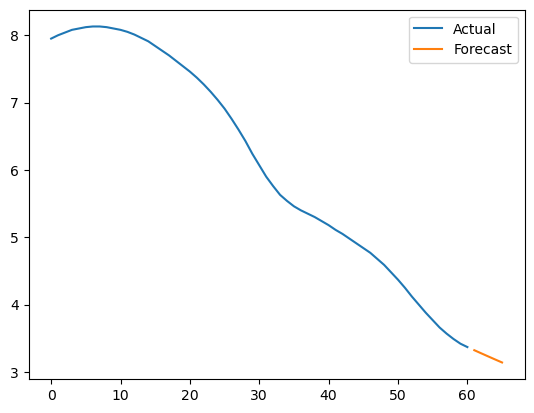

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Choose a country to model
Country = df['Kenya']

# Extract the time series for the chosen country
ts = df['Kenya']

# Fit an ARIMA model
model = ARIMA(ts, order=(1, 1, 1)).fit()

# Print the summary of the model
print(model.summary())

# Make a forecast for the next 5 years
forecast = model.forecast(steps=5)

# Plot the time series and the forecast
plt.plot(ts.index, ts.values, label='Actual')
plt.plot(forecast.index, forecast.values, label='Forecast')
plt.legend()
plt.show()

In [18]:
from sklearn.ensemble import IsolationForest

n_estimators = 100
model = IsolationForest(n_estimators=n_estimators, contamination=0.01)
model.fit(df)
anomalies = model.predict(df)
df['Kenya'] = anomalies
anomaly_df = df[df['Kenya'] == 1]
print(anomaly_df)

    Kenya  Tanzania
0       1      6.81
1       1      6.81
2       1      6.80
3       1      6.80
4       1      6.80
5       1      6.80
6       1      6.80
7       1      6.79
8       1      6.79
9       1      6.78
10      1      6.77
11      1      6.77
12      1      6.76
13      1      6.76
14      1      6.76
15      1      6.75
16      1      6.74
17      1      6.73
18      1      6.71
19      1      6.69
20      1      6.65
21      1      6.62
22      1      6.58
23      1      6.54
24      1      6.50
25      1      6.47
26      1      6.42
27      1      6.38
28      1      6.33
29      1      6.27
30      1      6.21
31      1      6.15
32      1      6.08
33      1      6.01
34      1      5.95
35      1      5.88
36      1      5.83
37      1      5.78
38      1      5.74
39      1      5.71
40      1      5.69
41      1      5.68
42      1      5.67
43      1      5.66
44      1      5.65
45      1      5.64
46      1      5.62
47      1      5.58
48      1      5.54


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [19]:
# Fit an ARIMA model
model = ARIMA(df['Tanzania'], order=(1,1,0))
results = model.fit()

# Make forecasts for the next 5 years
forecast = results.forecast(steps=10)

# Print the forecasts
print(forecast)

61    4.710289
62    4.650866
63    4.591729
64    4.532876
65    4.474308
66    4.416021
67    4.358015
68    4.300289
69    4.242840
70    4.185668
Name: predicted_mean, dtype: float64


In [20]:
# Fit an ARIMA model
model = ARIMA(df['Kenya'], order=(1,1,0))
results = model.fit()

# Make forecasts for the next 5 years
forecast = results.forecast(steps=10)

# Print the forecasts
print(forecast)

61   -1.0
62   -1.0
63   -1.0
64   -1.0
65   -1.0
66   -1.0
67   -1.0
68   -1.0
69   -1.0
70   -1.0
Name: predicted_mean, dtype: float64


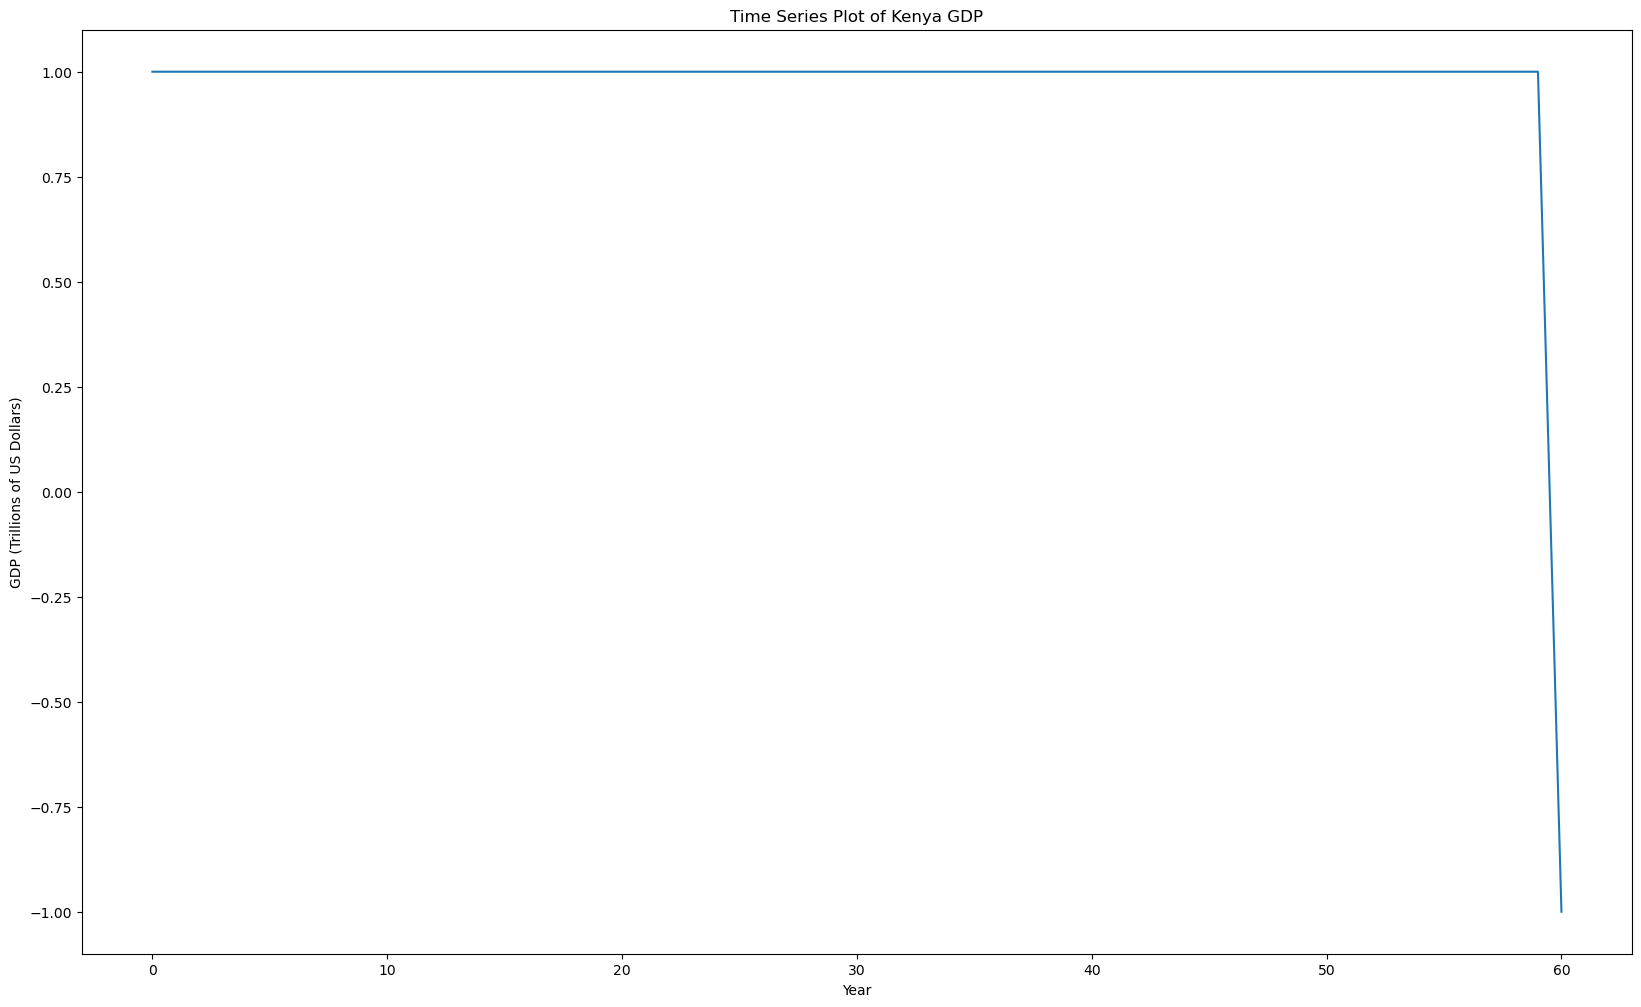

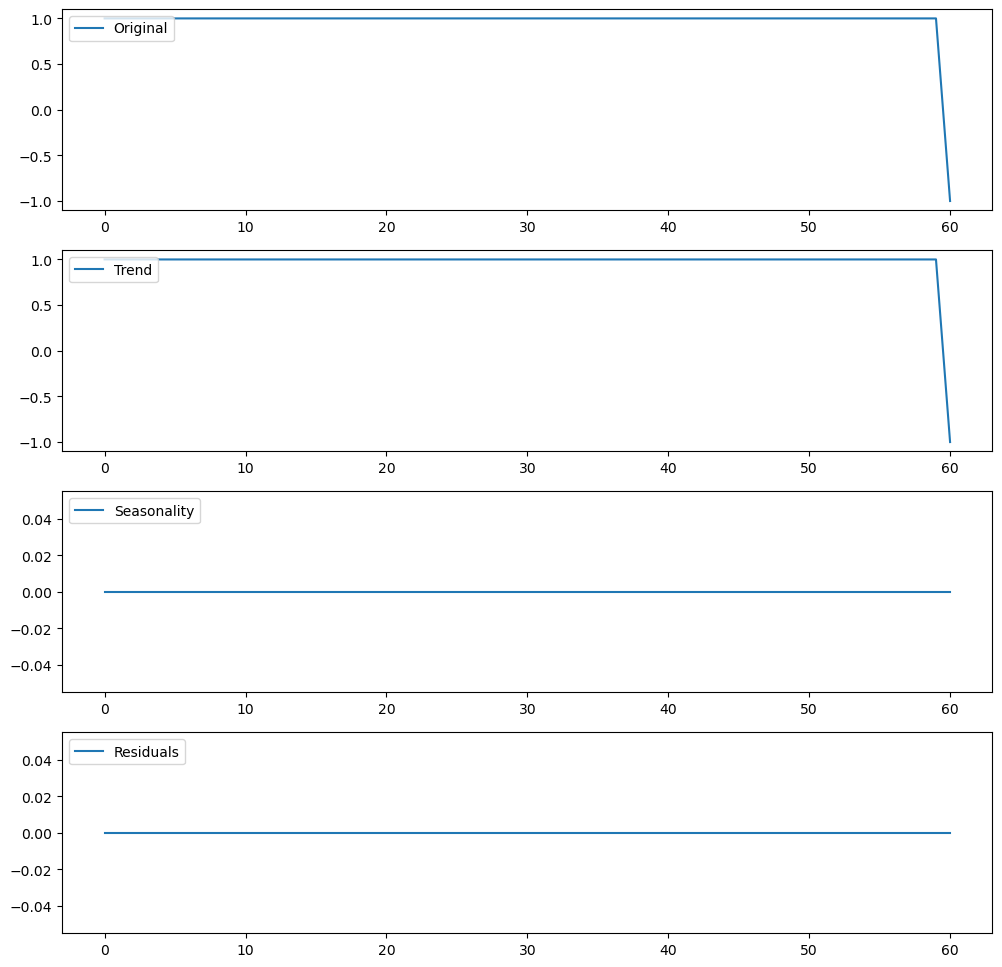

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Select a single country for analysis
country_data = df['Kenya']

# Visualize the data
plt.figure(figsize=(20,12))
plt.plot(country_data)
plt.title('Time Series Plot of Kenya GDP')
plt.xlabel('Year')
plt.ylabel('GDP (Trillions of US Dollars)')
plt.show()

# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(country_data, model='additive', period=1)
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

# Visualize the decomposed components
plt.figure(figsize=(12,12))
plt.subplot(411)
plt.plot(country_data, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='upper left')
plt.show()


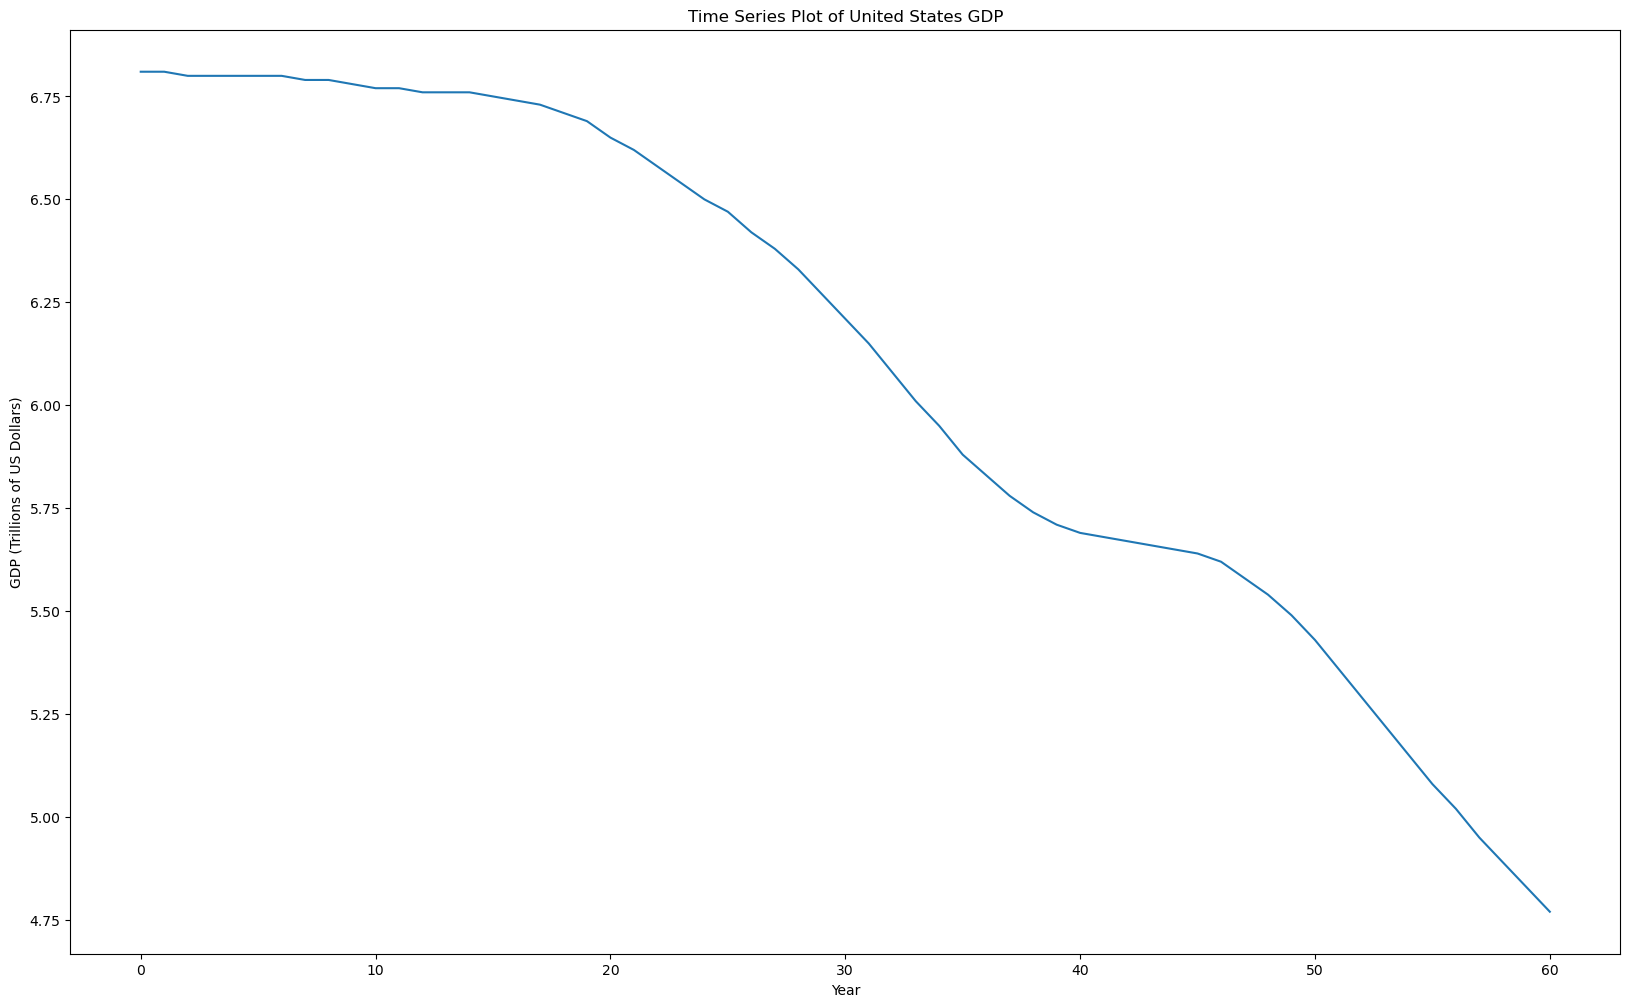

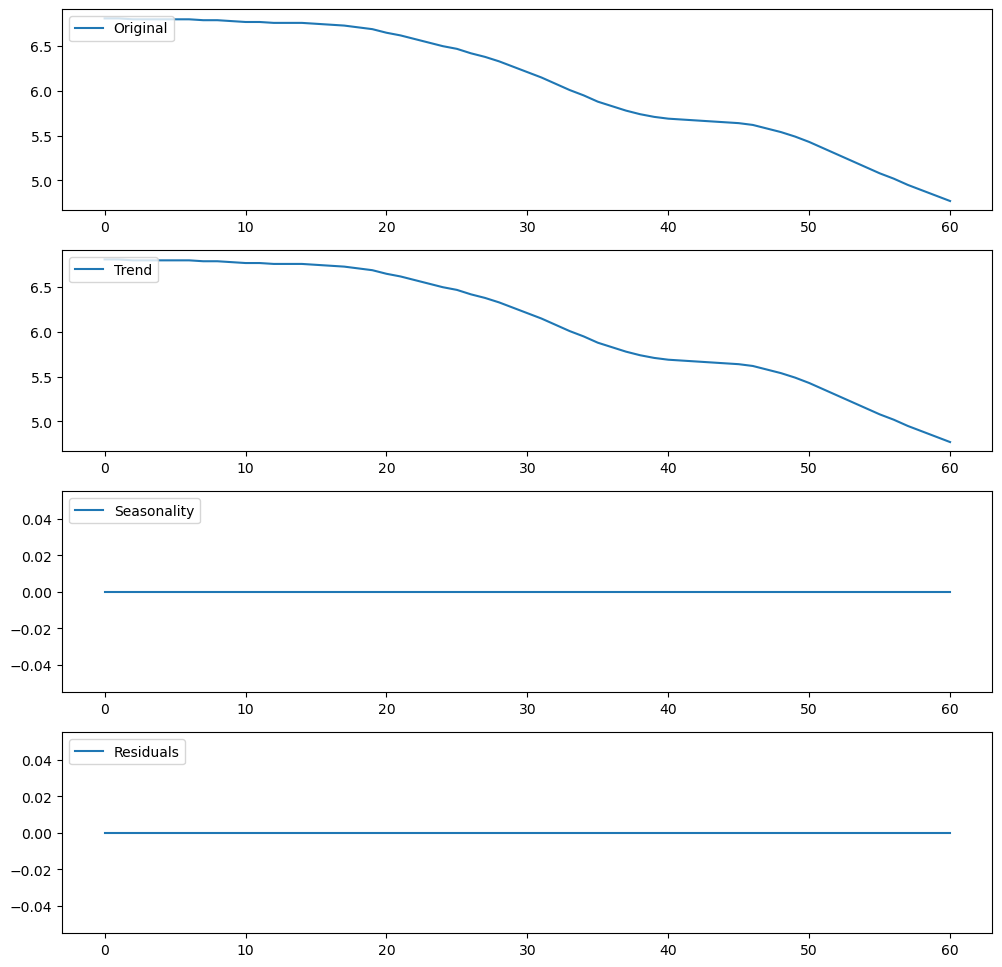

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Select a single country for analysis
country_data = df['Tanzania']

# Visualize the data
plt.figure(figsize=(20,12))
plt.plot(country_data)
plt.title('Time Series Plot of United States GDP')
plt.xlabel('Year')
plt.ylabel('GDP (Trillions of US Dollars)')
plt.show()

# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(country_data, model='additive', period=1)
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

# Visualize the decomposed components
plt.figure(figsize=(12,12))
plt.subplot(411)
plt.plot(country_data, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='upper left')
plt.show()
